<font size="6"><b>Data Science and Machine Learning</font>

In [1]:
pwd

'C:\\Users\\Tiago'

<font size="6">Group Project BUY&GO</font>

Tiago Rodrigues

10-04-2021

# Table of Contents
* [1. Import Libraries](#Import_Libraries)<br>
* [2. Data pre-processing and Understanding](#Data_pre_processing)<br>
    * [2.1 Collect and merge the data](#Collect)<br>
    * [2.2 Data caracterization](#data_caracterization)<br>
    * [2.3 Explore and understand the data ](#explore)<br>
        * [2.3.1 Statistical Exploration](#stats_explore)<br>
        * [2.3.2 Demographics](#Demographics)<br>
* [3. Data transformation](#data_transformation)<br>
    * [3.1 Data cleaning](#data_cleaning)<br>
        * [3.1.1 Outliers](#outliers)<br>
        * [3.1.2 Misclassifications](#missclassifications)<br>
        * [3.1.3 Missing values](#missing)<br>
    * [3.2 Data transformation](#data_transformation_2)<br>
        * [3.2.1 Create new variables](#createnewvariables)<br>
        * [3.2.2 Drop non-relevant and redudant variables](#dropvariables)<br>
        * [3.2.3 Binning](#binning)<br>
    * [3.3 Check for incoherencies](#incoherencies)<br>
    * [3.4 Create dummy Variables](#dummy)<br>
    * [3.5 Normalize data](#normalize)<br>
    * [3.6 Power Transform](#power)<br>
    * [3.7 Create flag variables for the transformed variables](#flag)<br>
    * [3.8 Data Frame demographics](#dfdemographics)<br>
* [4. Modelling](#modelling)<br>
    * [4.1 Clustering via K-means](#clustering)<br>
        * [4.1.1 Product usage segmentation](#productusage)<br>
        * [4.1.2 key Insights](#key_insights2)<br>
        * [4.2.1 Costumer value segmentation (Recency vs Mnt vs Freq)](#costumervalue)<br>
        * [4.2.2 Key insights](#key_insights3)<br>
        * [4.3.1 Costumer segmentation by campaign acceptance ](#campaign)<br>
        * [4.3.2 Key insights](#key_insights4)<br>
    * [4.4 Insights of crossing the different segmentations](#cross)<br>
    * [4.5 Clustering with Gaussian mixture vs Agglomerative Clustering](#gaussian)<br>




<a class="anchor" id="Import_Libraries"></a>
# 1. Import Libraries


In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.preprocessing import power_transform
import scipy as sp
from scipy import stats
from matplotlib import gridspec
from numpy import unique
from numpy import where

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator, DataGenerator
from scipy.cluster import hierarchy



Funções auxiliares

In [284]:
def stats (lista):
    
    median = '{:.2f}'.format(lista.median())
    Q1 = '{:.2f}'.format(np.percentile(lista, 25))
    Q3 = '{:.2f}'.format(np.percentile(lista, 75))
    skew = '{:.2f}'.format(sp.stats.skew(lista) )
    return (median, Q1, Q3, skew)

In [285]:
def stats2 (lista):
    
    mean = '{:.2f}'.format(lista.mean())
    Q1 = '{:.2f}'.format(np.percentile(lista, 25))
    Q3 = '{:.2f}'.format(np.percentile(lista, 75))
    skew = '{:.2f}'.format(sp.stats.skew(lista) )
    return (mean, Q1, Q3, skew)

<a class="anchor" id="Data_pre_processing"></a>
# 2. Data pre-processing and Understanding

<a class="anchor" id="Collect"></a>
## 2.1 Collect and merge the data

In [286]:
df1_original = pd.read_excel('demographic.xlsx')
df2_original = pd.read_csv('firmographic.csv')


In [287]:
df1 = df1_original
df1.set_index('Card_ID', inplace = True)
df1.drop_duplicates(inplace = True)
df1.head(n=5)




Name  Year_Birth Education Marital_Status    Income  \
Card_ID                                                                         
10003075       Mr. Adam Glover        1981    Master       Together   90782.0   
10003076  Mr. Cameron McDonald        1993       PhD         Single  113023.0   
10003078    Mr. Keith Davidson        1982       PhD         Single   93571.0   
10003079    Mr. Alexander Gill        1978       PhD         Single   91852.0   
10003080        Mr. Neil Piper        1968       PhD        Married   22386.0   

          Kidhome  Teenhome   Region  Country  
Card_ID                                        
10003075        0         0     Cork  Ireland  
10003076        0         0  Kinsale  Ireland  
10003078        0         1     Cork  Ireland  
10003079        0         1  Kinsale  Ireland  
10003080        1         1     Cork  Ireland

In [288]:
df2 = df2_original
df2.set_index('Card_ID', inplace = True)
df2.drop_duplicates(inplace = True)
df2.head(n=5)



Dt_Customer  Recency  MntGroceries  MntStationery  MntHouseKeeping  \
Card_ID                                                                       
10003075   11/3/2018       66         622.0           70.0            678.0   
10003076   4/18/2019        6        1014.0           15.0            643.0   
10003078   7/22/2018       10         639.0           88.0            185.0   
10003079    2/3/2018       26         806.0           56.0            350.0   
10003080  10/31/2018       65          32.0            1.0             29.0   

          MntWellness_&_Beauty  MntElectronics_&_Supplies  MntLimitedEdition  \
Card_ID                                                                        
10003075                   NaN                       51.0               34.0   
10003076                  74.0                       36.0               36.0   
10003078                  64.0                       53.0              160.0   
10003079                  54.0                       54.0              260.0   
10003080                   2.0                        0.0               20.0   

          NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Card_ID                                                             
10003075                  1               12                    7   
10003076                  1                9                    4   
10003078                  3               13                    5   
10003079                  1               15                    9   
10003080                  5                9                    3   

          NumStorePurchases  NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  \
Card_ID                                                                      
10003075                 10                  4             0             1   
10003076                  8                  1             0             0   
10003078                 13                  5             0             0   
10003079                 11                  6             0             0   
10003080                  3                  9             1             0   

          AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Complain  
Card_ID                                                       
10003075             0             0             0         0  
10003076             0             0             0         0  
10003078             0             0             0         0  
10003079             0             1             0         0  
10003080             0             0             0         0

In [289]:
df = df1.merge(df2, on = 'Card_ID' )
df.head(n=5)

Name  Year_Birth Education Marital_Status    Income  \
Card_ID                                                                         
10003075       Mr. Adam Glover        1981    Master       Together   90782.0   
10003076  Mr. Cameron McDonald        1993       PhD         Single  113023.0   
10003078    Mr. Keith Davidson        1982       PhD         Single   93571.0   
10003079    Mr. Alexander Gill        1978       PhD         Single   91852.0   
10003080        Mr. Neil Piper        1968       PhD        Married   22386.0   

          Kidhome  Teenhome   Region  Country Dt_Customer  ...  \
Card_ID                                                    ...   
10003075        0         0     Cork  Ireland   11/3/2018  ...   
10003076        0         0  Kinsale  Ireland   4/18/2019  ...   
10003078        0         1     Cork  Ireland   7/22/2018  ...   
10003079        0         1  Kinsale  Ireland    2/3/2018  ...   
10003080        1         1     Cork  Ireland  10/31/2018  ...   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Card_ID                                                             
10003075               12                    7                 10   
10003076                9                    4                  8   
10003078               13                    5                 13   
10003079               15                    9                 11   
10003080                9                    3                  3   

          NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
Card_ID                                                                 
10003075                  4             0             1             0   
10003076                  1             0             0             0   
10003078                  5             0             0             0   
10003079                  6             0             0             0   
10003080                  9             1             0             0   

          AcceptedCmp4  AcceptedCmp5  Complain  
Card_ID                                         
10003075             0             0         0  
10003076             0             0         0  
10003078             0             0         0  
10003079             1             0         0  
10003080             0             0         0  

[5 rows x 28 columns]

<a class="anchor" id="data_caracterization"></a>
## 2.2 Data caracterization

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 10003075 to 10013073
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       4999 non-null   object 
 1   Year_Birth                 5000 non-null   int64  
 2   Education                  5000 non-null   object 
 3   Marital_Status             5000 non-null   object 
 4   Income                     4948 non-null   float64
 5   Kidhome                    5000 non-null   int64  
 6   Teenhome                   5000 non-null   int64  
 7   Region                     5000 non-null   object 
 8   Country                    5000 non-null   object 
 9   Dt_Customer                5000 non-null   object 
 10  Recency                    5000 non-null   int64  
 11  MntGroceries               5000 non-null   float64
 12  MntStationery              5000 non-null   float64
 13  MntHouseKeeping            4907 non-n

##### Data frame contains the following types of data:
- **Categorical**:
  - **Nominal** : 'Education', 'Marital_Status', 'Region', 'Country', 'Name '
  - **Dummy** :  'AcceptedCmp1' ;  'AcceptedCmp2' ; 'AcceptedCmp3' ;  'AcceptedCmp4' ; 'AcceptedCmp5' ; 'Complain'
- **Numerical**:
  - **Interval** : 'Custid', 'Year_Birth', 'Dt_Customer',
  - **Ratio** :  'Income' , 'Kidhome' , 'Teenhome' , 'Recency' , 'MntGroceries'  , 'MntStationery' , 'MntHouseKeeping' ,    'MntWellness_&_Beauty', 'MntElectronics_&_Supplies', 'MntLimitedEdition'  , 'NumDealsPurchases' ,'NumWebPurchases', 'NumCatalogPurchases',n'NumStorePurchases' , 'NumWebVisitsMonth'  

In [291]:
#Including only numeric columns in a DataFrame description.
df.describe(include=[np.number]).T

count          mean           std     min  \
Year_Birth                 5000.0   1973.806600     11.870138  1946.0   
Income                     4948.0  69614.564198  28953.396355  2195.8   
Kidhome                    5000.0      0.440600      0.538265     0.0   
Teenhome                   5000.0      0.493600      0.546643    -1.0   
Recency                    5000.0     49.576400     29.000593     0.0   
MntGroceries               5000.0    363.336740    400.096463     0.0   
MntStationery              5000.0     27.041220     40.069024     0.0   
MntHouseKeeping            4907.0    185.105910    240.357283     0.0   
MntWellness_&_Beauty       4935.0     32.237285     47.312292     0.0   
MntElectronics_&_Supplies  5000.0     35.049700     54.325949     0.0   
MntLimitedEdition          5000.0     55.765500     69.240596     0.0   
NumDealsPurchases          5000.0      2.258800      1.812313     0.0   
NumWebPurchases            5000.0     10.244800      5.347990     1.0   
NumCatalogPurchases        5000.0      4.546400      2.802395     0.0   
NumStorePurchases          5000.0      5.730800      3.275191     0.0   
NumWebVisitsMonth          5000.0      5.278600      3.148677     0.0   
AcceptedCmp1               5000.0      0.080200      0.271630     0.0   
AcceptedCmp2               5000.0      0.068600      0.252798     0.0   
AcceptedCmp3               5000.0      0.077800      0.267883     0.0   
AcceptedCmp4               5000.0      0.064200      0.245133     0.0   
AcceptedCmp5               5000.0      0.011400      0.106171     0.0   
Complain                   5000.0      0.012400      0.110674     0.0   

                               25%      50%       75%        max  
Year_Birth                  1964.0   1975.0   1983.00    2002.00  
Income                     47075.5  69427.0  92119.75  187314.45  
Kidhome                        0.0      0.0      1.00       2.00  
Teenhome                       0.0      0.0      1.00       2.00  
Recency                       25.0     49.0     75.00      99.00  
MntGroceries                  30.0    209.0    605.25    1799.00  
MntStationery                  2.0      9.0     34.00     199.00  
MntHouseKeeping               18.0     73.0    256.50    1093.00  
MntWellness_&_Beauty           3.0     11.0     41.00     239.00  
MntElectronics_&_Supplies      3.0     11.0     42.00     315.00  
MntLimitedEdition             11.0     30.0     71.00     424.00  
NumDealsPurchases              1.0      2.0      3.00      15.00  
NumWebPurchases                8.0     10.0     12.00     231.00  
NumCatalogPurchases            2.0      4.0      6.00      13.00  
NumStorePurchases              3.0      5.0      8.00      13.00  
NumWebVisitsMonth              3.0      6.0      7.00     137.00  
AcceptedCmp1                   0.0      0.0      0.00       1.00  
AcceptedCmp2                   0.0      0.0      0.00       1.00  
AcceptedCmp3                   0.0      0.0      0.00       1.00  
AcceptedCmp4                   0.0      0.0      0.00       1.00  
AcceptedCmp5                   0.0      0.0      0.00       1.00  
Complain                       0.0      0.0      0.00       1.00

From the above table, the following conclusions are drawn:
- `count`- The income variable has 4948 valid values. We have a problem of missing values in here. Moreover, some customers did not bought anything from 'Housekeeping' label products, or/and 'Wellness_&_Beauty'.
- `mean`- In average, my customers have an income of 69614, and Groceries is in average the category where costumers spend more money.
- `std`- The standard deviation of Income is quite high, which indicates that the values are spread out over a wider range.
- `max`- Both the maximum number of visits per month and number of web purchases are quite high, which might be an outlier or error.

In [292]:
#Including only string columns in a DataFrame description
df.describe(include=[object]).T

count unique                    top  freq
Name            4999   4999  Mr. Christopher Short     1
Education       5000     11                    PhD  2662
Marital_Status  5000      5                Married  2108
Region          5000      3                Kinsale  1695
Country         5000      3                Ireland  4994
Dt_Customer     5000    700              6/24/2018    18

From the table above the following can be concluded:
- `Name` - There is a client that chose to remain anonymous, or failled to insert his/her Name
- `Education` - The 11 unique entries must be reviewed as this name appears to be too high.


<a class="anchor" id="explore"></a>
## 2.3 Explore and understand the data 

<a class="anchor" id="stats_explore"></a>
### 2.3.1 Statistical Exploration

In [293]:
kt = df.skew()
kt 

Year_Birth                   -0.104376
Income                        0.074944
Kidhome                       0.653025
Teenhome                      0.429628
Recency                      -0.008955
MntGroceries                  1.163000
MntStationery                 2.073507
MntHouseKeeping               1.662145
MntWellness_&_Beauty          2.081755
MntElectronics_&_Supplies     2.392493
MntLimitedEdition             2.313686
NumDealsPurchases             1.881128
NumWebPurchases              22.185112
NumCatalogPurchases           1.083225
NumStorePurchases             0.665959
NumWebVisitsMonth            14.689330
AcceptedCmp1                  3.092209
AcceptedCmp2                  3.414368
AcceptedCmp3                  3.153379
AcceptedCmp4                  3.557038
AcceptedCmp5                  9.207698
Complain                      8.815006
dtype: float64

In [294]:
#Function that list collumns with a kurt value higher then 3

kt = df.kurt()
kt 

Year_Birth                    -0.830261
Income                        -0.556396
Kidhome                       -0.752638
Teenhome                      -0.913354
Recency                       -1.201001
MntGroceries                   0.570844
MntStationery                  3.976999
MntHouseKeeping                2.004285
MntWellness_&_Beauty           4.042067
MntElectronics_&_Supplies      6.106466
MntLimitedEdition              6.498925
NumDealsPurchases              4.731187
NumWebPurchases              796.641075
NumCatalogPurchases            0.543071
NumStorePurchases             -0.652685
NumWebVisitsMonth            611.872912
AcceptedCmp1                   7.564783
AcceptedCmp2                   9.661771
AcceptedCmp3                   7.946978
AcceptedCmp4                  10.656782
AcceptedCmp5                  82.814821
Complain                      75.734630
dtype: float64

If the dummy variables are filtered from the above list, the following collumns might need a special attention , due to its high kurtosis value : 'MntStationery', 'MntWellness_&_Beauty', 'MntElectronics_&_Supplies', 'MntLimitedEdition', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth'

In [295]:
for index, val in kt.iteritems():
    
    if val > 3 :
        print(index)

MntStationery
MntWellness_&_Beauty
MntElectronics_&_Supplies
MntLimitedEdition
NumDealsPurchases
NumWebPurchases
NumWebVisitsMonth
AcceptedCmp1
AcceptedCmp2
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
Complain


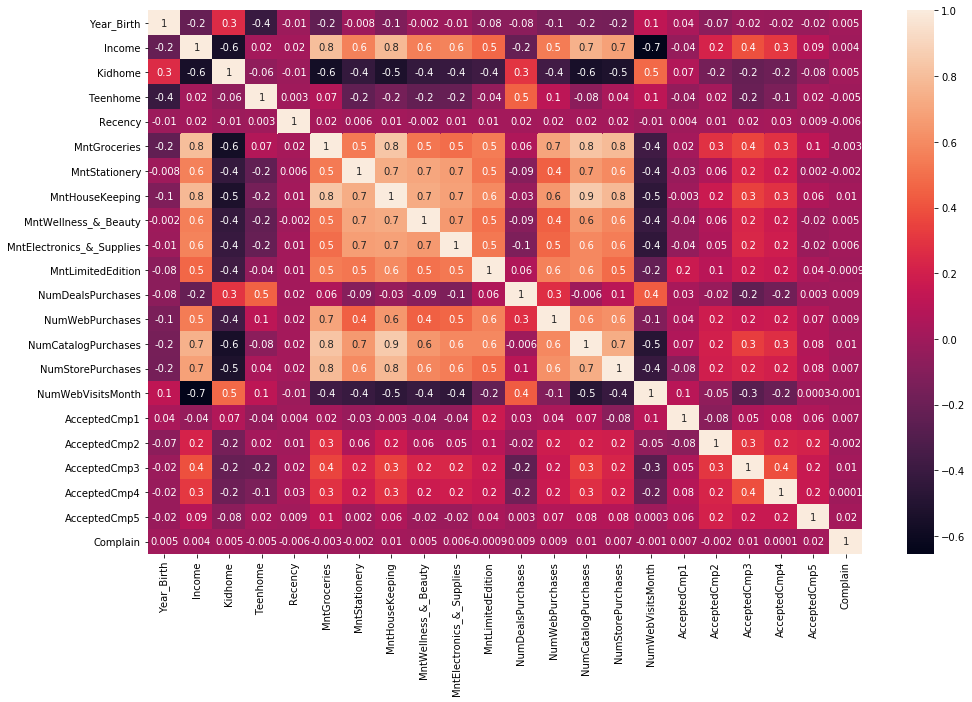

In [296]:
df_corr = df.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

<a class="anchor" id="Demographics"></a>
### 2.3.2 Demographics

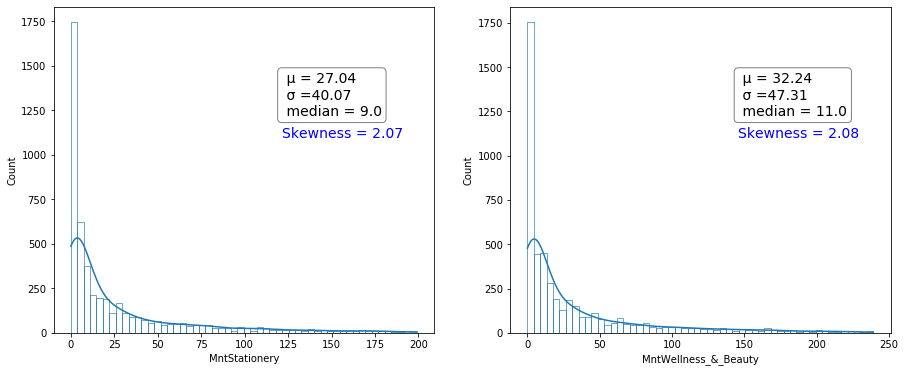

In [297]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot (ax = axes[0], data = df, x = 'MntStationery',kde=True,fill=False)
sns.histplot (ax = axes[1], data = df, x = 'MntWellness_&_Beauty',kde=True,fill=False)

mean_1 = round(df['MntStationery'].mean(),2)
mean_2 = round(df['MntWellness_&_Beauty'].mean(),2)

sdeviation_1 = round(df['MntStationery'].std(),2)
sdeviation_2 = round(df['MntWellness_&_Beauty'].std(),2)

median_1 = round(df['MntStationery'].median(),2)
median_2 = round(df['MntWellness_&_Beauty'].median(),2)

skew_1 = round(df['MntStationery'].skew(),2)
skew_2 = round(df['MntWellness_&_Beauty'].skew(),2)

string_1 = ' \u03BC = ' + str(mean_1) + "\n \u03C3 =" + str(sdeviation_1) + "\n median = " + str(median_1)
string_2 = ' \u03BC = ' + str(mean_2) + "\n \u03C3 =" + str(sdeviation_2) + "\n median = " + str(median_2)


props = dict(boxstyle='round', facecolor='white', alpha=0.5)   

axes[0].text(0.6, 0.8, string_1, transform=axes[0].transAxes, fontsize=14,
        verticalalignment='top' ,bbox=props)
axes[0].text(0.6, 0.6, "Skewness = " + str(skew_1), transform=axes[0].transAxes, fontsize=14,
       color= 'blue')

axes[1].text(0.6, 0.8, string_2, transform=axes[1].transAxes, fontsize=14,
        verticalalignment='top' ,bbox=props)
axes[1].text(0.6, 0.6, "Skewness = " + str(skew_2), transform=axes[1].transAxes, fontsize=14,
       color= 'blue')
plt.show()


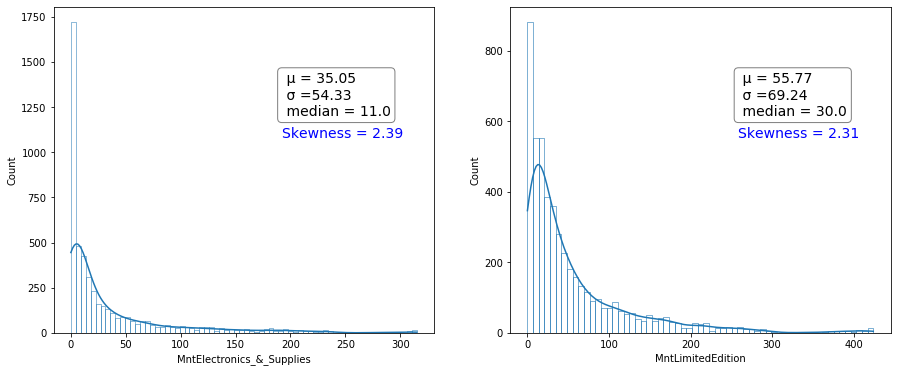

In [298]:
fig, axes = plt.subplots(1,2, figsize = (15,6))

sns.histplot (ax = axes[0], data = df, x = 'MntElectronics_&_Supplies',kde=True,fill=False)
sns.histplot (ax = axes[1], data = df, x = 'MntLimitedEdition',kde=True,fill=False)

mean_1 = round(df['MntElectronics_&_Supplies'].mean(),2)
mean_2 = round(df['MntLimitedEdition'].mean(),2)

sdeviation_1 = round(df['MntElectronics_&_Supplies'].std(),2)
sdeviation_2 = round(df['MntLimitedEdition'].std(),2)

median_1 = round(df['MntElectronics_&_Supplies'].median(),2)
median_2 = round(df['MntLimitedEdition'].median(),2)

skew_1 = round(df['MntElectronics_&_Supplies'].skew(),2)
skew_2 = round(df['MntLimitedEdition'].skew(),2)

string_1 = ' \u03BC = ' + str(mean_1) + "\n \u03C3 =" + str(sdeviation_1) + "\n median = " + str(median_1)
string_2 = ' \u03BC = ' + str(mean_2) + "\n \u03C3 =" + str(sdeviation_2) + "\n median = " + str(median_2)


props = dict(boxstyle='round', facecolor='white', alpha=0.5)   

axes[0].text(0.6, 0.8, string_1, transform=axes[0].transAxes, fontsize=14,
        verticalalignment='top' ,bbox=props)
axes[0].text(0.6, 0.6, "Skewness = " + str(skew_1), transform=axes[0].transAxes, fontsize=14,
       color= 'blue')

axes[1].text(0.6, 0.8, string_2, transform=axes[1].transAxes, fontsize=14,
        verticalalignment='top' ,bbox=props)
axes[1].text(0.6, 0.6, "Skewness = " + str(skew_2), transform=axes[1].transAxes, fontsize=14,
       color= 'blue')

plt.show()

<a class="anchor" id="data_transformation"></a>
# 3. Data transformation

In [299]:
df_treated = df.copy()

<a class="anchor" id="data_cleaning"></a>
## 3.1 Data cleaning

<a class="anchor" id="outliers"></a>
### 3.1.1 Outliers

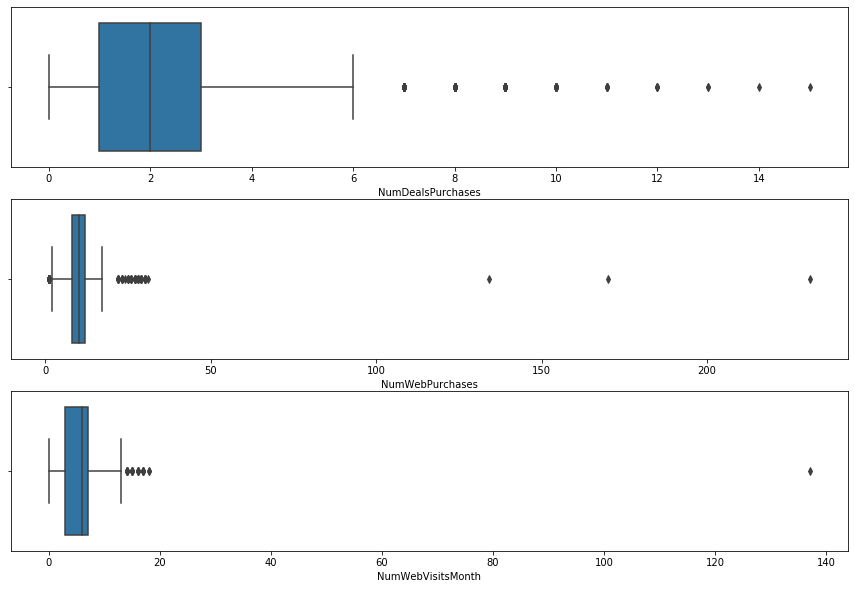

In [300]:
fig, axes = plt.subplots(3,1, figsize = (15,10))
sns.boxplot(ax = axes[0], data = df_treated , x = 'NumDealsPurchases')
sns.boxplot(ax = axes[1], data = df_treated , x = 'NumWebPurchases')
sns.boxplot(ax = axes[2], data = df_treated , x = 'NumWebVisitsMonth')

In [301]:
df_treated  = df_treated .drop(df_treated [df_treated ['NumWebVisitsMonth'] > 40].index)
df_treated  = df_treated .drop(df_treated [df_treated ['NumWebPurchases'] > 50].index)
df_treated  = df_treated .drop(df_treated [df_treated ['NumDealsPurchases'] > 6].index)


<a class="anchor" id="missclassifications"></a>
### 3.1.2 Misclassifications

In [302]:
#Explore "Education" entries
df_treated ['Education'].value_counts()

PhD           2566
Graduation    1331
Master         818
2n Cycle        39
GRADUATION      22
PHD             14
MASTER           9
MATSER           4
graduation       3
phd              2
2N CYCLE         1
Name: Education, dtype: int64

In [303]:
df_treated ['Education'] = df_treated ['Education'].str.capitalize() 
df_treated ['Education'].value_counts()

Phd           2582
Graduation    1356
Master         827
2n cycle        40
Matser           4
Name: Education, dtype: int64

In [304]:
df_treated ['Education'] = df_treated ['Education'].replace('Matser','Master')
df_treated ['Education'].value_counts()

Phd           2582
Graduation    1356
Master         831
2n cycle        40
Name: Education, dtype: int64

In [305]:
# Exploring 'Marital_Status' entries
df_treated ['Marital_Status'].value_counts()


Married     2029
Together    1208
Single      1020
Divorced     412
Widow        140
Name: Marital_Status, dtype: int64

In [306]:
df_treated ['Marital_Status'] = df_treated ['Marital_Status'].replace('Together','Married')
df_treated ['Marital_Status'].value_counts()

Married     3237
Single      1020
Divorced     412
Widow        140
Name: Marital_Status, dtype: int64

In [307]:
# Exploring 'Region' entries
df_treated ['Region'].value_counts()

Kinsale      1630
Killarney    1615
Cork         1564
Name: Region, dtype: int64

In [308]:
# Exploring 'Country' entries
df_treated ['Country'].value_counts()

Ireland    4805
UK            2
France        2
Name: Country, dtype: int64

In [309]:
# Exploring 'Kid_home' entries
df_treated ['Kidhome'].value_counts()

0    2855
1    1849
2     105
Name: Kidhome, dtype: int64

In [310]:
# Exploring 'Teenhome' entries
df_treated ['Teenhome'].value_counts()

 0    2621
 1    2076
 2     107
-1       5
Name: Teenhome, dtype: int64

In [311]:
#See entries with teenhome = -1
df_treated .loc[df_treated ['Teenhome'] == -1]

Name  Year_Birth   Education Marital_Status    Income  \
Card_ID                                                                        
10003214   Mr. Jack Wilkins        1991  Graduation        Married  104547.0   
10003351      Mrs. Zoe Gray        1976         Phd        Married  109238.0   
10003500  Mr. Connor Taylor        1983  Graduation        Married   31286.0   
10003712    Mr. Austin Bell        1967         Phd         Single   82877.0   
10003808   Mr. Jacob Mackay        1966         Phd        Married   83838.0   

          Kidhome  Teenhome     Region  Country Dt_Customer  ...  \
Card_ID                                                      ...   
10003214        0        -1       Cork  Ireland   4/18/2018  ...   
10003351        1        -1    Kinsale  Ireland   9/30/2017  ...   
10003500        1        -1  Killarney  Ireland   8/15/2017  ...   
10003712        0        -1       Cork  Ireland  11/16/2017  ...   
10003808        0        -1       Cork  Ireland  10/11/2017  ...   

          NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
Card_ID                                                             
10003214               12                   12                 10   
10003351               10                    6                 10   
10003500                9                    3                  3   
10003712               10                    5                  6   
10003808               12                    7                 10   

          NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
Card_ID                                                                 
10003214                  3             0             1             1   
10003351                  6             1             0             1   
10003500                  9             0             0             0   
10003712                  3             0             0             0   
10003808                  5             0             0             0   

          AcceptedCmp4  AcceptedCmp5  Complain  
Card_ID                                         
10003214             1             0         0  
10003351             0             0         0  
10003500             0             0         0  
10003712             0             0         0  
10003808             0             0         0  

[5 rows x 28 columns]

In [312]:
df_treated ['Teenhome'] = df_treated ['Teenhome'].replace(-1,df_treated ['Teenhome'].value_counts().idxmax())
df_treated ['Teenhome'].value_counts()

0    2626
1    2076
2     107
Name: Teenhome, dtype: int64

In [313]:
# Exploring 'Country' entries
df_treated ['Country'].value_counts()

Ireland    4805
UK            2
France        2
Name: Country, dtype: int64

In [314]:
dropped = (np.shape(df)[0] - np.shape(df_treated)[0])/np.shape(df)[0] *100

print("Total dropped rows:", str(dropped),"%")

Total dropped rows: 3.82 %


<a class="anchor" id="missing"></a>
### 3.1.3 Missing values

In [315]:
df_treated .isna().sum()

Name                          1
Year_Birth                    0
Education                     0
Marital_Status                0
Income                       51
Kidhome                       0
Teenhome                      0
Region                        0
Country                       0
Dt_Customer                   0
Recency                       0
MntGroceries                  0
MntStationery                 0
MntHouseKeeping              87
MntWellness_&_Beauty         63
MntElectronics_&_Supplies     0
MntLimitedEdition             0
NumDealsPurchases             0
NumWebPurchases               0
NumCatalogPurchases           0
NumStorePurchases             0
NumWebVisitsMonth             0
AcceptedCmp1                  0
AcceptedCmp2                  0
AcceptedCmp3                  0
AcceptedCmp4                  0
AcceptedCmp5                  0
Complain                      0
dtype: int64

In [316]:
df_treated .loc[df_treated ['MntHouseKeeping'] == 0]

Name  Year_Birth   Education Marital_Status   Income  \
Card_ID                                                                       
10005718  Mrs. Sophie Black        1961  Graduation         Single  15264.0   
10007820   Mr. William Reid        1962      Master          Widow  21757.0   

          Kidhome  Teenhome Region  Country Dt_Customer  ...  NumWebPurchases  \
Card_ID                                                  ...                    
10005718        0         0   Cork  Ireland  12/16/2018  ...                7   
10007820        1         1   Cork  Ireland   5/25/2019  ...                6   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Card_ID                                                               
10005718                    2                  2                  6   
10007820                    2                  3                  2   

          AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Card_ID                                                            
10005718             0             0             0             0   
10007820             0             0             0             0   

          AcceptedCmp5  Complain  
Card_ID                           
10005718             0         0  
10007820             0         0  

[2 rows x 28 columns]

In [317]:
df_treated .loc[df_treated ['MntWellness_&_Beauty'] == 0]

Name  Year_Birth   Education Marital_Status  \
Card_ID                                                                      
10003101           Miss Karen Short        1956         Phd        Married   
10003105            Mrs. Jane Bower        1978         Phd        Married   
10003106           Mr. Brian Walker        1970      Master        Married   
10003116            Mr. Dan Randall        1970      Master        Married   
10003125              Mr. Evan Knox        1958         Phd        Married   
10003130            Mr. Adrian Hill        1996  Graduation         Single   
10003159            Mr. Jack Mathis        1977      Master         Single   
10003168       Miss Dorothy Russell        1970         Phd        Married   
10003169           Mr. Owen Jackson        1991         Phd         Single   
10003171              Miss Amy King        1960         Phd        Married   
10003174           Mr. Simon Tucker        1957      Master        Married   
10003175             Mr. Boris Rees        1951         Phd        Married   
10003182          Mr. Stephen Scott        1968         Phd       Divorced   
10003188          Mr. Jason MacLeod        1976      Master         Single   
10003191           Miss Anna Fraser        1964      Master        Married   
10003211               Mr. Tim Hart        1957  Graduation         Single   
10003219             Mr. Gavin Dyer        1952         Phd        Married   
10003239        Mr. Oliver Clarkson        1987         Phd        Married   
10003241           Mr. Colin Hudson        1978         Phd        Married   
10003243           Mr. Joseph Avery        1976         Phd         Single   
10003253               Mr. Max Hart        1972         Phd        Married   
10003264              Mr. Harry Lee        1960         Phd         Single   
10003270            Mr. Paul Peters        1975         Phd        Married   
10003306            Mr. Sean Oliver        1965         Phd        Married   
10003310            Mr. Warren Ross        1979         Phd        Married   
10003321          Miss Theresa Carr        1969         Phd        Married   
10003329        Mr. Robert Lawrence        1972         Phd        Married   
10003339         Miss Natalie Smith        1969         Phd         Single   
10003345       Mr. Christopher Ince        1959         Phd        Married   
10003357     Mr. Cameron Rutherford        1971         Phd         Single   
10003371       Mr. Christian McLean        1969         Phd         Single   
10003375          Mrs. Claire Vance        1956         Phd        Married   
10003403         Mr. Jason Johnston        1968         Phd        Married   
10003419       Mr. Alexander Duncan        1981  Graduation         Single   
10003431         Miss Amanda Fraser        1968         Phd        Married   
10003450        Miss Dorothy Hodges        1976  Graduation         Single   
10003453        Mrs. Ella Robertson        1981         Phd        Married   
10003478          Mr. Leonard Paige        1970         Phd        Married   
10003495           Mr. Joe Morrison        1970         Phd         Single   
10003503              Mr. Luke Gray        1971         Phd        Married   
10003507        Mrs. Lily Henderson        1988         Phd        Married   
10003529           Mrs. Kylie Piper        1957      Master        Married   
10003547           Miss Amy Wallace        1954         Phd        Married   
10003555      Mr. Christopher Nolan        1974         Phd        Married   
10003559         Mr. Christian Knox        1993      Master         Single   
10003579             Mr. Dan Graham        1965         Phd        Married   
10003580             Mr. Ryan Grant        1965      Master        Married   
10003590            Mr. Nathan Kerr        1975         Phd        Married   
10003604           Mr. Dylan Watson        1953         Phd        Married   
10003628           Mr. Brian Hodges        1978      

In [318]:
df_treated .fillna({
    'MntHouseKeeping': df_treated ['MntHouseKeeping'].median(),
    'MntWellness_&_Beauty': df_treated ['MntWellness_&_Beauty'].median(),
    'Income' : df_treated ['Income'].median(),
        }, inplace = True)
df_treated .isna().sum()

Name                         1
Year_Birth                   0
Education                    0
Marital_Status               0
Income                       0
Kidhome                      0
Teenhome                     0
Region                       0
Country                      0
Dt_Customer                  0
Recency                      0
MntGroceries                 0
MntStationery                0
MntHouseKeeping              0
MntWellness_&_Beauty         0
MntElectronics_&_Supplies    0
MntLimitedEdition            0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp1                 0
AcceptedCmp2                 0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
Complain                     0
dtype: int64

<a class="anchor" id="data_transformation_2"></a>
## 3.2 Data transformation

<a class="anchor" id="createnewvariables"></a>
### 3.2.1 Create new variables

In [319]:
from datetime import date
df_treated ['Age'] = date.today().year - df_treated ['Year_Birth']


In [320]:
pd.set_option('display.max_rows', None)

In [321]:
df_treated ['Mnt'] = df_treated ['MntGroceries'] + df_treated ['MntStationery'] + df_treated ['MntHouseKeeping'] + df_treated ['MntWellness_&_Beauty'] + df_treated ['MntElectronics_&_Supplies'] + df_treated ['MntLimitedEdition']



In [322]:
df_treated ['freq'] =  df_treated ['NumWebPurchases'] + df_treated ['NumCatalogPurchases'] + df_treated ['NumStorePurchases']


In [323]:
df_treated ['MntFrq'] = df_treated ['Mnt']/df_treated ['freq']


In [324]:
df_treated ['Num_Cmp_acepted'] = df_treated ['AcceptedCmp1'] +  df_treated ['AcceptedCmp2'] + df_treated ['AcceptedCmp3'] + df_treated ['AcceptedCmp4'] + df_treated ['AcceptedCmp5']
df_treated ['Num_Cmp_acepted'].value_counts(ascending=True)

4      15
3      88
2     204
1     708
0    3794
Name: Num_Cmp_acepted, dtype: int64

In [325]:
#Check the median of costumers genders , to fill entry without name
df_aux_3 = df_treated .copy ()
df_aux_3['Gender'] = np.where(df_aux_3['Name'].str.startswith('Mr.' ), "Male", "Female")
df_aux_3['Gender'].value_counts(ascending=True)

Female    1578
Male      3231
Name: Gender, dtype: int64

In [326]:
df_treated [['Name']] =df_treated [['Name']] .fillna(value='Mr. John')

In [327]:
df_treated .describe(include=[object]).T

count unique                    top  freq
Name            4809   4809  Mr. Christopher Short     1
Education       4809      4                    Phd  2582
Marital_Status  4809      4                Married  3237
Region          4809      3                Kinsale  1630
Country         4809      3                Ireland  4805
Dt_Customer     4809    700              6/24/2018    18

In [328]:
df_treated ['Gender'] = np.where(df_treated ['Name'].str.startswith('Mr.' ), "Male", "Female")
df_treated ['Gender'].value_counts(ascending=True)

Female    1578
Male      3231
Name: Gender, dtype: int64

In [329]:
df_treated ['Dependents'] = df_treated ['Kidhome'] + df_treated ['Teenhome']

<a class="anchor" id="dropvariables"></a>
### 3.2.2 Drop non-relevant and redudant variables

In [330]:
del df_treated ['Year_Birth']
del df_treated ['Country']


<a class="anchor" id="binning"></a>
### 3.2.3 Binning

In [331]:
df_treated ['age_bins'] = pd.cut(x=df_treated ['Age'], bins=[10, 20, 30, 40,50,60,70,80])


In [332]:
df_treated .head(n=5)

Name Education Marital_Status    Income  Kidhome  \
Card_ID                                                                      
10003075       Mr. Adam Glover    Master        Married   90782.0        0   
10003076  Mr. Cameron McDonald       Phd         Single  113023.0        0   
10003078    Mr. Keith Davidson       Phd         Single   93571.0        0   
10003079    Mr. Alexander Gill       Phd         Single   91852.0        0   
10003080        Mr. Neil Piper       Phd        Married   22386.0        1   

          Teenhome   Region Dt_Customer  Recency  MntGroceries  ...  \
Card_ID                                                         ...   
10003075         0     Cork   11/3/2018       66         622.0  ...   
10003076         0  Kinsale   4/18/2019        6        1014.0  ...   
10003078         1     Cork   7/22/2018       10         639.0  ...   
10003079         1  Kinsale    2/3/2018       26         806.0  ...   
10003080         1     Cork  10/31/2018       65          32.0  ...   

          AcceptedCmp5  Complain  Age     Mnt  freq     MntFrq  \
Card_ID                                                          
10003075             0         0   40  1465.0    29  50.517241   
10003076             0         0   28  1818.0    21  86.571429   
10003078             0         0   39  1189.0    31  38.354839   
10003079             0         0   43  1580.0    35  45.142857   
10003080             0         0   53    84.0    15   5.600000   

          Num_Cmp_acepted  Gender  Dependents  age_bins  
Card_ID                                                  
10003075                1    Male           0  (30, 40]  
10003076                0    Male           0  (20, 30]  
10003078                0    Male           1  (30, 40]  
10003079                1    Male           1  (40, 50]  
10003080                1    Male           2  (50, 60]  

[5 rows x 34 columns]

<a class="anchor" id="incoherencies"></a>
## 3.3 Check for incoherencies

In [333]:


nrecords_original = np.shape(df_treated)[0]

df_treated = df_treated[df_treated['Mnt'] < df_treated['Income']]
nrecords_after = np.shape(df_treated)[0]
print(nrecords_original)
print(nrecords_after)

4809
4809


In [334]:
df_treated = df_treated[((df_treated['Mnt'] > 0) & (df_treated['freq'] > 0))]
nrecords_after = np.shape(df_treated)[0]
print(nrecords_after)

4809


In [335]:
#Including only numeric columns in a DataFrame description.
df_treated.describe(include=[np.number]).T

count          mean           std          min  \
Income                     4809.0  69516.435517  29170.551807  2553.200000   
Kidhome                    4809.0      0.428156      0.537184     0.000000   
Teenhome                   4809.0      0.476190      0.542212     0.000000   
Recency                    4809.0     49.654814     29.035512     0.000000   
MntGroceries               4809.0    356.270514    400.739212     0.000000   
MntStationery              4809.0     27.205822     40.360475     0.000000   
MntHouseKeeping            4809.0    184.109919    242.259019     0.000000   
MntWellness_&_Beauty       4809.0     32.134227     47.502169     0.000000   
MntElectronics_&_Supplies  4809.0     35.158287     54.449422     0.000000   
MntLimitedEdition          4809.0     54.830131     69.057229     0.000000   
NumDealsPurchases          4809.0      2.025993      1.365561     0.000000   
NumWebPurchases            4809.0     10.048243      3.256595     1.000000   
NumCatalogPurchases        4809.0      4.532335      2.829575     0.000000   
NumStorePurchases          4809.0      5.679559      3.290725     0.000000   
NumWebVisitsMonth          4809.0      5.182366      2.544736     0.000000   
AcceptedCmp1               4809.0      0.078395      0.268820     0.000000   
AcceptedCmp2               4809.0      0.066334      0.248891     0.000000   
AcceptedCmp3               4809.0      0.080058      0.271412     0.000000   
AcceptedCmp4               4809.0      0.063839      0.244491     0.000000   
AcceptedCmp5               4809.0      0.010813      0.103433     0.000000   
Complain                   4809.0      0.012685      0.111921     0.000000   
Age                        4809.0     47.044500     11.915123    19.000000   
Mnt                        4809.0    689.708900    687.150239     1.800000   
freq                       4809.0     20.260137      7.451417     1.000000   
MntFrq                     4809.0     29.264582     31.661759     0.818182   
Num_Cmp_acepted            4809.0      0.299439      0.664780     0.000000   
Dependents                 4809.0      0.904346      0.735650     0.000000   

                                    25%           50%           75%        max  
Income                     46507.000000  69172.500000  92507.000000  187314.45  
Kidhome                        0.000000      0.000000      1.000000       2.00  
Teenhome                       0.000000      0.000000      1.000000       2.00  
Recency                       25.000000     49.000000     75.000000      99.00  
MntGroceries                  28.000000    195.000000    596.000000    1799.00  
MntStationery                  2.000000      9.000000     34.000000     199.00  
MntHouseKeeping               18.000000     69.000000    255.000000    1093.00  
MntWellness_&_Beauty           3.000000     10.000000     40.000000     239.00  
MntElectronics_&_Supplies      3.000000     11.000000     42.000000     315.00  
MntLimitedEdition             10.000000     29.000000     70.000000     424.00  
NumDealsPurchases              1.000000      2.000000      3.000000       6.00  
NumWebPurchases                8.000000      9.000000     12.000000      31.00  
NumCatalogPurchases            2.000000      4.000000      6.000000      13.00  
NumStorePurchases              3.000000      4.000000      8.000000      13.00  
NumWebVisitsMonth              3.000000      5.000000      7.000000      18.00  
AcceptedCmp1                   0.000000      0.000000      0.000000       1.00  
AcceptedCmp2                   0.000000      0.000000      0.000000       1.00  
AcceptedCmp3                   0.000000      0.000000      0.000000       1.00  
AcceptedCmp4                   0.000000      0.000000      0.000000       1.00  
AcceptedCmp5                   0.000000      0.000000      0.000000       1.00  
Complain                       0.000000      0.000000      0.000000       1.00  
Age                           38.000000     46.000000     56.

In [336]:
df_treated.head(n=5)

Name Education Marital_Status    Income  Kidhome  \
Card_ID                                                                      
10003075       Mr. Adam Glover    Master        Married   90782.0        0   
10003076  Mr. Cameron McDonald       Phd         Single  113023.0        0   
10003078    Mr. Keith Davidson       Phd         Single   93571.0        0   
10003079    Mr. Alexander Gill       Phd         Single   91852.0        0   
10003080        Mr. Neil Piper       Phd        Married   22386.0        1   

          Teenhome   Region Dt_Customer  Recency  MntGroceries  ...  \
Card_ID                                                         ...   
10003075         0     Cork   11/3/2018       66         622.0  ...   
10003076         0  Kinsale   4/18/2019        6        1014.0  ...   
10003078         1     Cork   7/22/2018       10         639.0  ...   
10003079         1  Kinsale    2/3/2018       26         806.0  ...   
10003080         1     Cork  10/31/2018       65          32.0  ...   

          AcceptedCmp5  Complain  Age     Mnt  freq     MntFrq  \
Card_ID                                                          
10003075             0         0   40  1465.0    29  50.517241   
10003076             0         0   28  1818.0    21  86.571429   
10003078             0         0   39  1189.0    31  38.354839   
10003079             0         0   43  1580.0    35  45.142857   
10003080             0         0   53    84.0    15   5.600000   

          Num_Cmp_acepted  Gender  Dependents  age_bins  
Card_ID                                                  
10003075                1    Male           0  (30, 40]  
10003076                0    Male           0  (20, 30]  
10003078                0    Male           1  (30, 40]  
10003079                1    Male           1  (40, 50]  
10003080                1    Male           2  (50, 60]  

[5 rows x 34 columns]

<a class="anchor" id="dummy"></a>
## 3.4 Create dummy Variables

In [337]:
df_treated ['Region'] = df_treated ['Region'].replace('Cork',0).replace('Killarney',1).replace('Kinsale',2)
df_treated ['Gender'] = df_treated ['Gender'].replace('Male',0).replace('Female',1)


In [338]:
df_treated ['Higher_Educ'] = np.where((df_treated ['Education']=='Graduation')|
                               (df_treated ['Education']=='Master')|
                               (df_treated ['Education']=='PhD'),1,0)




In [339]:
df_treated['Marital_Status'].value_counts()

Married     3237
Single      1020
Divorced     412
Widow        140
Name: Marital_Status, dtype: int64

In [340]:
df_treated ['Single_or_not'] = np.where((df_treated ['Marital_Status']=='Married'),1,0)
df_treated.head(n=5).T

Card_ID                           10003075              10003076  \
Name                       Mr. Adam Glover  Mr. Cameron McDonald   
Education                           Master                   Phd   
Marital_Status                     Married                Single   
Income                               90782                113023   
Kidhome                                  0                     0   
Teenhome                                 0                     0   
Region                                   0                     2   
Dt_Customer                      11/3/2018             4/18/2019   
Recency                                 66                     6   
MntGroceries                           622                  1014   
MntStationery                           70                    15   
MntHouseKeeping                        678                   643   
MntWellness_&_Beauty                    10                    74   
MntElectronics_&_Supplies               51                    36   
MntLimitedEdition                       34                    36   
NumDealsPurchases                        1                     1   
NumWebPurchases                         12                     9   
NumCatalogPurchases                      7                     4   
NumStorePurchases                       10                     8   
NumWebVisitsMonth                        4                     1   
AcceptedCmp1                             0                     0   
AcceptedCmp2                             1                     0   
AcceptedCmp3                             0                     0   
AcceptedCmp4                             0                     0   
AcceptedCmp5                             0                     0   
Complain                                 0                     0   
Age                                     40                    28   
Mnt                                   1465                  1818   
freq                                    29                    21   
MntFrq                             50.5172               86.5714   
Num_Cmp_acepted                          1                     0   
Gender                                   0                     0   
Dependents                               0                     0   
age_bins                          (30, 40]              (20, 30]   
Higher_Educ                              1                     0   
Single_or_not                            1                     0   

Card_ID                              10003078            10003079  \
Name                       Mr. Keith Davidson  Mr. Alexander Gill   
Education                                 Phd                 Phd   
Marital_Status                         Single              Single   
Income                                  93571               91852   
Kidhome                                     0                   0   
Teenhome                                    1                   1   
Region                                      0                   2   
Dt_Customer                         7/22/2018            2/3/2018   
Recency                                    10                  26   
MntGroceries                              639                 806   
MntStationery                              88                  56   
MntHouseKeeping                           185                 350   
MntWellness_&_Beauty                       64                  54   
MntElectronics_&_Supplies                  53                  54   
MntLimitedEdition                         160                 260   
NumDealsPurchases                           3                   1   
NumWebPurchases                            13                  15   
NumCatalogPurchases                         5                   9   
NumStorePurchases                          13                  11   
NumWebVisitsMonth                           5                   6   
AcceptedCmp1                      

<a class="anchor" id="normalize"></a>
## 3.5 Normalize data

In [341]:
df_normalized = df_treated[['Age', 'Income', 'Mnt','Recency','MntGroceries','MntStationery','MntHouseKeeping',
                            'MntWellness_&_Beauty','MntElectronics_&_Supplies','MntLimitedEdition','NumDealsPurchases',
                            'NumWebPurchases','NumCatalogPurchases','NumWebVisitsMonth','NumStorePurchases','Dependents','freq' , 'AcceptedCmp1',
                            'AcceptedCmp2', 'AcceptedCmp3' ,'AcceptedCmp4' , 'AcceptedCmp5','Higher_Educ'
                           ]].copy()
df_normalized.head(n=5)


Age    Income     Mnt  Recency  MntGroceries  MntStationery  \
Card_ID                                                                 
10003075   40   90782.0  1465.0       66         622.0           70.0   
10003076   28  113023.0  1818.0        6        1014.0           15.0   
10003078   39   93571.0  1189.0       10         639.0           88.0   
10003079   43   91852.0  1580.0       26         806.0           56.0   
10003080   53   22386.0    84.0       65          32.0            1.0   

          MntHouseKeeping  MntWellness_&_Beauty  MntElectronics_&_Supplies  \
Card_ID                                                                      
10003075            678.0                  10.0                       51.0   
10003076            643.0                  74.0                       36.0   
10003078            185.0                  64.0                       53.0   
10003079            350.0                  54.0                       54.0   
10003080             29.0                   2.0                        0.0   

          MntLimitedEdition  ...  NumWebVisitsMonth  NumStorePurchases  \
Card_ID                      ...                                         
10003075               34.0  ...                  4                 10   
10003076               36.0  ...                  1                  8   
10003078              160.0  ...                  5                 13   
10003079              260.0  ...                  6                 11   
10003080               20.0  ...                  9                  3   

          Dependents  freq  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  \
Card_ID                                                                
10003075           0    29             0             1             0   
10003076           0    21             0             0             0   
10003078           1    31             0             0             0   
10003079           1    35             0             0             0   
10003080           2    15             1             0             0   

          AcceptedCmp4  AcceptedCmp5  Higher_Educ  
Card_ID                                            
10003075             0             0            1  
10003076             0             0            0  
10003078             0             0            0  
10003079             1             0            0  
10003080             0             0            0  

[5 rows x 23 columns]

In [342]:
# Min-Max Normalization

df_normalized = df_normalized.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
df_normalized.describe().T

count      mean       std  min       25%  \
Age                        4809.0  0.500795  0.212770  0.0  0.339286   
Income                     4809.0  0.362431  0.157882  0.0  0.237895   
Mnt                        4809.0  0.221321  0.221077  0.0  0.026446   
Recency                    4809.0  0.501564  0.293288  0.0  0.252525   
MntGroceries               4809.0  0.198038  0.222757  0.0  0.015564   
MntStationery              4809.0  0.136713  0.202816  0.0  0.010050   
MntHouseKeeping            4809.0  0.168445  0.221646  0.0  0.016468   
MntWellness_&_Beauty       4809.0  0.134453  0.198754  0.0  0.012552   
MntElectronics_&_Supplies  4809.0  0.111614  0.172855  0.0  0.009524   
MntLimitedEdition          4809.0  0.129316  0.162871  0.0  0.023585   
NumDealsPurchases          4809.0  0.337665  0.227593  0.0  0.166667   
NumWebPurchases            4809.0  0.301608  0.108553  0.0  0.233333   
NumCatalogPurchases        4809.0  0.348641  0.217660  0.0  0.153846   
NumWebVisitsMonth          4809.0  0.287909  0.141374  0.0  0.166667   
NumStorePurchases          4809.0  0.436889  0.253133  0.0  0.230769   
Dependents                 4809.0  0.226087  0.183913  0.0  0.000000   
freq                       4809.0  0.481503  0.186285  0.0  0.325000   
AcceptedCmp1               4809.0  0.078395  0.268820  0.0  0.000000   
AcceptedCmp2               4809.0  0.066334  0.248891  0.0  0.000000   
AcceptedCmp3               4809.0  0.080058  0.271412  0.0  0.000000   
AcceptedCmp4               4809.0  0.063839  0.244491  0.0  0.000000   
AcceptedCmp5               4809.0  0.010813  0.103433  0.0  0.000000   
Higher_Educ                4809.0  0.454772  0.498002  0.0  0.000000   

                                50%       75%  max  
Age                        0.482143  0.660714  1.0  
Income                     0.360570  0.486865  1.0  
Mnt                        0.140660  0.378418  1.0  
Recency                    0.494949  0.757576  1.0  
MntGroceries               0.108394  0.331295  1.0  
MntStationery              0.045226  0.170854  1.0  
MntHouseKeeping            0.063129  0.233303  1.0  
MntWellness_&_Beauty       0.041841  0.167364  1.0  
MntElectronics_&_Supplies  0.034921  0.133333  1.0  
MntLimitedEdition          0.068396  0.165094  1.0  
NumDealsPurchases          0.333333  0.500000  1.0  
NumWebPurchases            0.266667  0.366667  1.0  
NumCatalogPurchases        0.307692  0.461538  1.0  
NumWebVisitsMonth          0.277778  0.388889  1.0  
NumStorePurchases          0.307692  0.615385  1.0  
Dependents                 0.250000  0.250000  1.0  
freq                       0.475000  0.625000  1.0  
AcceptedCmp1               0.000000  0.000000  1.0  
AcceptedCmp2               0.000000  0.000000  1.0  
AcceptedCmp3               0.000000  0.000000  1.0  
AcceptedCmp4               0.000000  0.000000  1.0  
AcceptedCmp5               0.000000  0.000000  1.0  
Higher_Educ                0.000000  1.000000  1.0

<a class="anchor" id="power"></a>
## 3.6 Power Transform

In [343]:
data_Groceries = df_normalized['MntGroceries'].to_list() 
data_Groceries = [x+1 for x in data_Groceries]
bcdata, lam = boxcox(data_Groceries)
df_normalized = df_normalized.assign( MntGroceries_BC = bcdata)

data_Stationery = df_normalized['MntStationery'].to_list()
data_Stationery = [x+1 for x in data_Stationery]
bcdata, lam = boxcox(data_Stationery)
df_normalized = df_normalized.assign( MntStationery_BC = bcdata)

data_HouseKeeping = df_normalized['MntHouseKeeping'].to_list()
data_HouseKeeping = [x+1 for x in data_HouseKeeping]
bcdata, lam = boxcox(data_HouseKeeping)
df_normalized = df_normalized.assign( MntHouseKeeping_BC = bcdata)

data_WellnessBeauty = df_normalized['MntWellness_&_Beauty'].to_list()
data_WellnessBeauty = [x+1 for x in data_WellnessBeauty]
bcdata, lam = boxcox(data_WellnessBeauty)
df_normalized = df_normalized.assign( MntWellnessBeauty_BC = bcdata)

data_Eletronics = df_normalized['MntElectronics_&_Supplies'].to_list()
data_Eletronics = [x+1 for x in data_Eletronics]
bcdata, lam = boxcox(data_Eletronics)
df_normalized = df_normalized.assign( MntEletronics_BC = bcdata)

data_LimitedEdition = df_normalized['MntLimitedEdition'].to_list()
data_LimitedEdition = [x+1 for x in data_LimitedEdition]
bcdata, lam = boxcox(data_LimitedEdition)
df_normalized = df_normalized.assign( MntLimitedEdition_BC = bcdata)


In [344]:
df_normalized.describe().T
df_normalized = df_normalized.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
df_normalized.describe().T

count      mean       std  min       25%  \
Age                        4809.0  0.500795  0.212770  0.0  0.339286   
Income                     4809.0  0.362431  0.157882  0.0  0.237895   
Mnt                        4809.0  0.221321  0.221077  0.0  0.026446   
Recency                    4809.0  0.501564  0.293288  0.0  0.252525   
MntGroceries               4809.0  0.198038  0.222757  0.0  0.015564   
MntStationery              4809.0  0.136713  0.202816  0.0  0.010050   
MntHouseKeeping            4809.0  0.168445  0.221646  0.0  0.016468   
MntWellness_&_Beauty       4809.0  0.134453  0.198754  0.0  0.012552   
MntElectronics_&_Supplies  4809.0  0.111614  0.172855  0.0  0.009524   
MntLimitedEdition          4809.0  0.129316  0.162871  0.0  0.023585   
NumDealsPurchases          4809.0  0.337665  0.227593  0.0  0.166667   
NumWebPurchases            4809.0  0.301608  0.108553  0.0  0.233333   
NumCatalogPurchases        4809.0  0.348641  0.217660  0.0  0.153846   
NumWebVisitsMonth          4809.0  0.287909  0.141374  0.0  0.166667   
NumStorePurchases          4809.0  0.436889  0.253133  0.0  0.230769   
Dependents                 4809.0  0.226087  0.183913  0.0  0.000000   
freq                       4809.0  0.481503  0.186285  0.0  0.325000   
AcceptedCmp1               4809.0  0.078395  0.268820  0.0  0.000000   
AcceptedCmp2               4809.0  0.066334  0.248891  0.0  0.000000   
AcceptedCmp3               4809.0  0.080058  0.271412  0.0  0.000000   
AcceptedCmp4               4809.0  0.063839  0.244491  0.0  0.000000   
AcceptedCmp5               4809.0  0.010813  0.103433  0.0  0.000000   
Higher_Educ                4809.0  0.454772  0.498002  0.0  0.000000   
MntGroceries_BC            4809.0  0.384387  0.326027  0.0  0.058107   
MntStationery_BC           4809.0  0.361306  0.338765  0.0  0.063965   
MntHouseKeeping_BC         4809.0  0.391646  0.331690  0.0  0.086272   
MntWellnessBeauty_BC       4809.0  0.365468  0.334998  0.0  0.080837   
MntEletronics_BC           4809.0  0.358068  0.332602  0.0  0.073166   
MntLimitedEdition_BC       4809.0  0.412137  0.294121  0.0  0.146401   

                                50%       75%  max  
Age                        0.482143  0.660714  1.0  
Income                     0.360570  0.486865  1.0  
Mnt                        0.140660  0.378418  1.0  
Recency                    0.494949  0.757576  1.0  
MntGroceries               0.108394  0.331295  1.0  
MntStationery              0.045226  0.170854  1.0  
MntHouseKeeping            0.063129  0.233303  1.0  
MntWellness_&_Beauty       0.041841  0.167364  1.0  
MntElectronics_&_Supplies  0.034921  0.133333  1.0  
MntLimitedEdition          0.068396  0.165094  1.0  
NumDealsPurchases          0.333333  0.500000  1.0  
NumWebPurchases            0.266667  0.366667  1.0  
NumCatalogPurchases        0.307692  0.461538  1.0  
NumWebVisitsMonth          0.277778  0.388889  1.0  
NumStorePurchases          0.307692  0.615385  1.0  
Dependents                 0.250000  0.250000  1.0  
freq                       0.475000  0.625000  1.0  
AcceptedCmp1               0.000000  0.000000  1.0  
AcceptedCmp2               0.000000  0.000000  1.0  
AcceptedCmp3               0.000000  0.000000  1.0  
AcceptedCmp4               0.000000  0.000000  1.0  
AcceptedCmp5               0.000000  0.000000  1.0  
Higher_Educ                0.000000  1.000000  1.0  
MntGroceries_BC            0.333565  0.696192  1.0  
MntStationery_BC           0.253823  0.650370  1.0  
MntHouseKeeping_BC         0.287724  0.693323  1.0  
MntWellnessBeauty_BC       0.242151  0.651126  1.0  
MntEletronics_BC           0.240629  0.634324  1.0  
MntLimitedEdition_BC       0.362380  0.648046  1.0

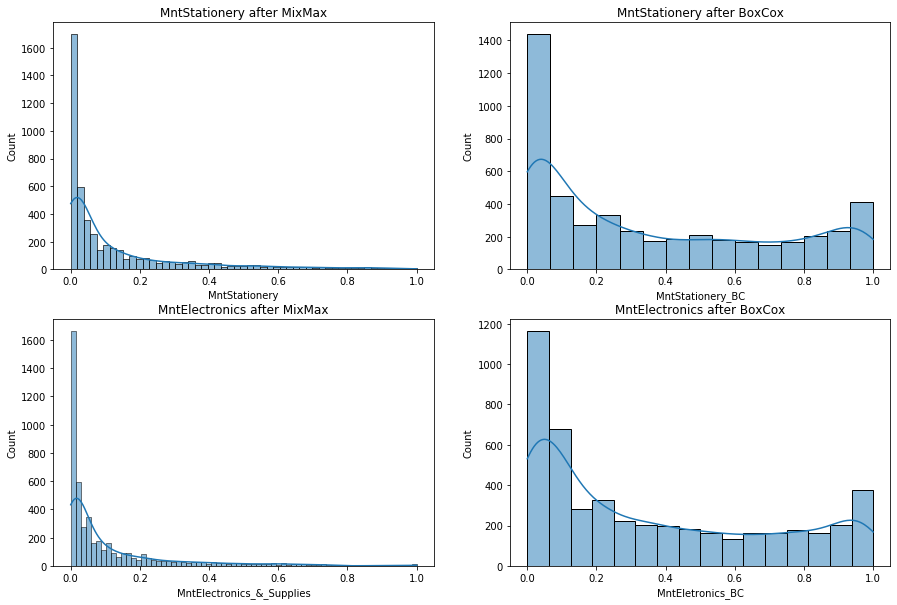

In [345]:
fig, axes = plt.subplots(2,2, figsize = (15,10))

sns.histplot (ax = axes[0,0], data = df_normalized, x = 'MntStationery',kde=True).set_title('MntStationery after MixMax')
sns.histplot (ax = axes[0,1], data = df_normalized, x = 'MntStationery_BC',kde=True).set_title('MntStationery after BoxCox')
sns.histplot (ax = axes[1,0], data = df_normalized, x = 'MntElectronics_&_Supplies',kde=True).set_title('MntElectronics after MixMax')
sns.histplot (ax = axes[1,1], data = df_normalized, x = 'MntEletronics_BC',kde=True).set_title('MntElectronics after BoxCox')
plt.show()



<a class="anchor" id="flag"></a>
## 3.7 Create flag variables for the transformed variables

In [346]:
var_list = ['MntGroceries', 'MntStationery', 'MntHouseKeeping' , 'MntWellness_&_Beauty' , 'MntElectronics_&_Supplies','MntLimitedEdition']

for category in var_list:
    
    data_list = df_treated[category].to_list() 
    
    for idx,y in enumerate (data_list):
        if y!=0:
            data_list[idx] = 1
        else :
            data_list[idx] = 0
    name= str(category + '_flag' )
    df_normalized[name] = data_list
df_normalized.head(n=10)



Age    Income       Mnt   Recency  MntGroceries  MntStationery  \
Card_ID                                                                         
10003075  0.375000  0.477529  0.470755  0.666667      0.345748       0.351759   
10003076  0.160714  0.597906  0.584325  0.060606      0.563646       0.075377   
10003078  0.357143  0.492624  0.381957  0.101010      0.355197       0.442211   
10003079  0.428571  0.483320  0.507754  0.262626      0.448027       0.281407   
10003080  0.607143  0.107343  0.026446  0.656566      0.017788       0.005025   
10003083  0.250000  0.578832  0.565665  0.757576      0.355197       0.633166   
10003085  0.267857  0.513846  0.290586  0.939394      0.191217       0.618090   
10003089  0.214286  0.258365  0.009073  0.313131      0.006115       0.000000   
10003091  0.875000  0.094662  0.005855  0.373737      0.000000       0.020101   
10003093  0.285714  0.127666  0.018081  0.525253      0.004447       0.030151   

          MntHouseKeeping  MntWellness_&_Beauty  MntElectronics_&_Supplies  \
Card_ID                                                                      
10003075         0.620311              0.041841                   0.161905   
10003076         0.588289              0.309623                   0.114286   
10003078         0.169259              0.267782                   0.168254   
10003079         0.320220              0.225941                   0.171429   
10003080         0.026532              0.008368                   0.000000   
10003083         0.493138              0.635983                   0.482540   
10003085         0.257091              0.347280                   0.146032   
10003089         0.006404              0.016736                   0.006349   
10003091         0.005489              0.020921                   0.000000   
10003093         0.010064              0.041841                   0.015873   

          MntLimitedEdition  ...  MntHouseKeeping_BC  MntWellnessBeauty_BC  \
Card_ID                      ...                                             
10003075           0.080189  ...            0.948346              0.242151   
10003076           0.084906  ...            0.939702              0.843586   
10003078           0.377358  ...            0.583150              0.803268   
10003079           0.613208  ...            0.795004              0.751292   
10003080           0.047170  ...            0.134755              0.054748   
10003083           0.358491  ...            0.906227              0.972267   
10003085           0.066038  ...            0.725702              0.872294   
10003089           0.014151  ...            0.034624              0.106111   
10003091           0.011792  ...            0.029764              0.130598   
10003093           0.042453  ...            0.053786              0.242151   

          MntEletronics_BC  MntLimitedEdition_BC  MntGroceries_flag  \
Card_ID                                                               
10003075          0.700952              0.408407                  1   
10003076          0.580766              0.425757                  1   
10003078          0.713852              0.892181                  1   
10003079          0.720069              0.968993                  1   
10003080          0.000000              0.268933                  1   
10003083          0.960659              0.880779                  1   
10003085          0.665783              0.352695                  1   
10003089          0.049466              0.090979                  1   
10003091          0.000000              0.076492                  0   
10003093          0.118606              0.246116                  1   

          MntStationery_flag  MntHouseKeeping_flag  MntWellness_&_Beauty_flag  \
Card_ID                                                                         
10003075                   1                     1                          1   
10003076                   1                     1                      

<a class="anchor" id="dfdemographics"></a>
## 3.8 Data Frame demographics

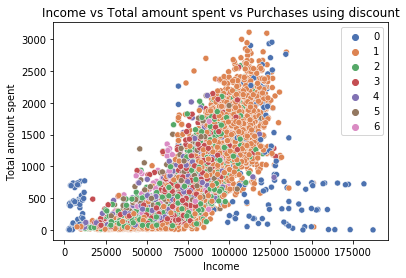

In [347]:
sns.scatterplot(x = 'Income', y= 'Mnt', data = df_treated , color='g',hue = "NumDealsPurchases" , palette="deep")

plt.title('Income vs Total amount spent vs Purchases using discount', color = 'k')
plt.legend(loc = 'upper right')
plt.xlabel("Income")
plt.ylabel("Total amount spent")
plt.show()

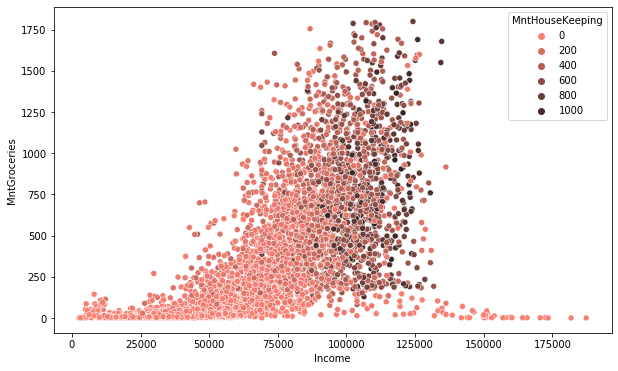

In [348]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Income', y= 'MntGroceries', data = df_treated ,hue = "MntHouseKeeping", palette = 'dark:salmon_r')


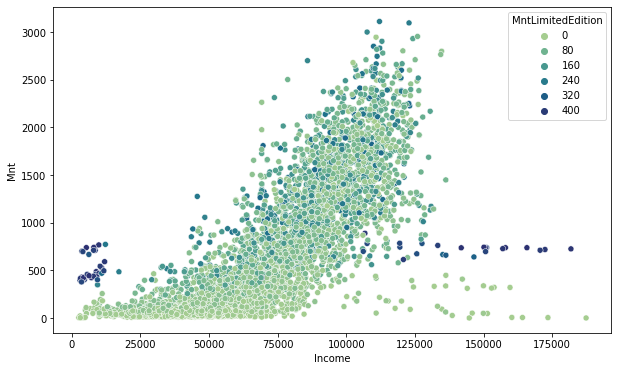

In [349]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Income', y= 'Mnt', data = df_treated ,hue = "MntLimitedEdition", palette = 'crest')

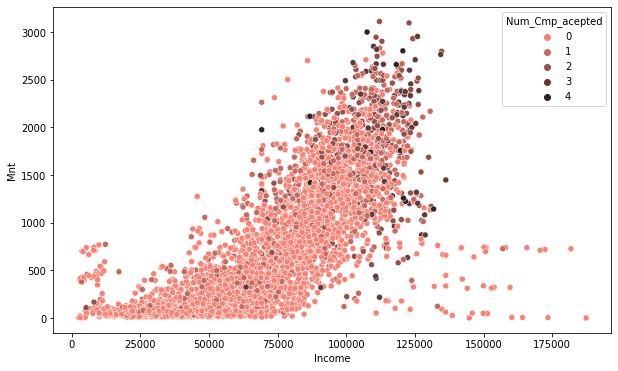

In [350]:

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Income', y= 'Mnt', data = df_treated ,hue = 'Num_Cmp_acepted', palette = 'dark:salmon_r')

Text(0, 0.5, 'Total amount spent')

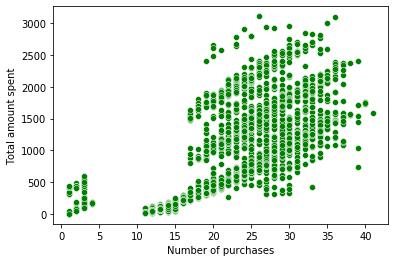

In [351]:
sns.scatterplot(x = 'freq', y= 'Mnt', data = df_treated , color='green' )
plt.xlabel("Number of purchases")
plt.ylabel("Total amount spent")

Text(0, 0.5, 'NumWebPurchases')

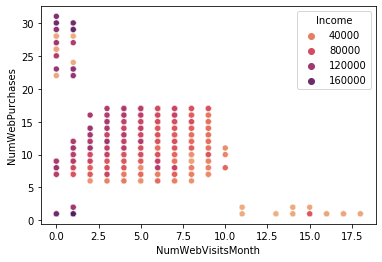

In [352]:
sns.scatterplot(x = 'NumWebVisitsMonth', y= 'NumWebPurchases', data = df_treated , color='k',hue='Income' , palette= 'flare' )
plt.xlabel("NumWebVisitsMonth")
plt.ylabel("NumWebPurchases")

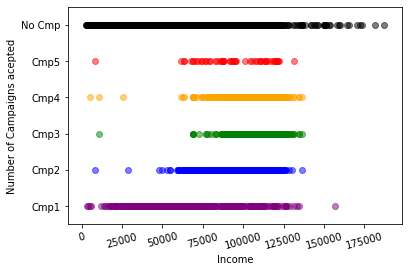

In [353]:

dfteste=df_treated .copy()
dfteste['AcceptedCmp1'] = dfteste['AcceptedCmp1'].replace(1,'Cmp1')
dfteste['AcceptedCmp2'] = dfteste['AcceptedCmp2'].replace(1,'Cmp2')
dfteste['AcceptedCmp3'] = dfteste['AcceptedCmp3'].replace(1,'Cmp3')
dfteste['AcceptedCmp4'] = dfteste['AcceptedCmp4'].replace(1,'Cmp4')
dfteste['AcceptedCmp5'] = dfteste['AcceptedCmp5'].replace(1,'Cmp5')

dfteste['AcceptedCmp1'] = dfteste['AcceptedCmp1'].replace(0,'x')
dfteste['AcceptedCmp2'] = dfteste['AcceptedCmp2'].replace(0,'x')
dfteste['AcceptedCmp3'] = dfteste['AcceptedCmp3'].replace(0,'x')
dfteste['AcceptedCmp4'] = dfteste['AcceptedCmp4'].replace(0,'x')
dfteste['AcceptedCmp5'] = dfteste['AcceptedCmp5'].replace(0,'x')

dfteste['TotalCmp'] = df_treated ['AcceptedCmp1']+df_treated ['AcceptedCmp2']+df_treated ['AcceptedCmp3']+df_treated ['AcceptedCmp4']+df_treated ['AcceptedCmp5']
dfteste['TotalCmp'] = np.where((dfteste.TotalCmp != 0),'x',dfteste.TotalCmp)
dfteste['TotalCmp'] = np.where((dfteste.TotalCmp != 'x'),'No Cmp',dfteste.TotalCmp)
#dfteste['TotalCmp'] = dfteste['TotalCmp'].replace(0,'No Cmp')
dfteste['TotalCmp']


fig, ax = plt.subplots()
ax.scatter(dfteste['Income'], dfteste['AcceptedCmp1'], color='purple' , alpha = 0.5)
ax.scatter(dfteste['Income'], dfteste['AcceptedCmp2'], color='blue',alpha = 0.5)
ax.scatter(dfteste['Income'], dfteste['AcceptedCmp3'], color='green',alpha = 0.5)
ax.scatter(dfteste['Income'], dfteste['AcceptedCmp4'], color='orange',alpha = 0.5)
ax.scatter(dfteste['Income'], dfteste['AcceptedCmp5'], color='red',alpha = 0.5)
ax.scatter(dfteste['Income'], dfteste['TotalCmp'], color='black',alpha = 0.5)


ax.set_xlabel("Income")
ax.set_ylabel("Number of Campaigns acepted")
plt.xticks(rotation=15)
ax.set_ylim([0.5,6.5])

plt.show()

In [354]:

df_treated['Num_Cmp_acepted'].value_counts()


0    3794
1     708
2     204
3      88
4      15
Name: Num_Cmp_acepted, dtype: int64

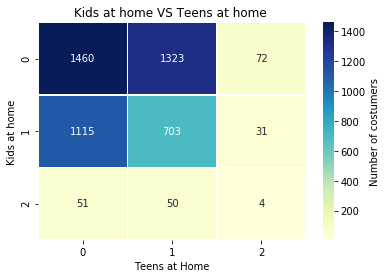

In [355]:
teen_max = df_treated ['Teenhome'].max()
teen_min = df_treated ['Teenhome'].min()

kid_max = df_treated ['Kidhome'].max()
kid_min = df_treated ['Kidhome'].min()


df_teens_kids = []
   
for k in range(kid_min, kid_max + 1):
    for t in range(teen_min, teen_max + 1):
        df_teens_kids.append(df_treated .loc[(df_treated ['Kidhome'] == k) & (df_treated ['Teenhome'] == t),'Teenhome'].count())

df_teens_kids = np.reshape(df_teens_kids, (kid_max + 1, teen_max + 1))

ax = plt.axes() 
sns.heatmap(df_teens_kids , linewidths=.5, annot=True, cmap="YlGnBu" ,fmt = "d" , ax = ax, cbar_kws={'label': 'Number of costumers'})
ax.set_title('Kids at home VS Teens at home ')
plt.xlabel('Teens at Home', fontsize = 10) 
plt.ylabel('Kids at home', fontsize = 10) 

plt.show()


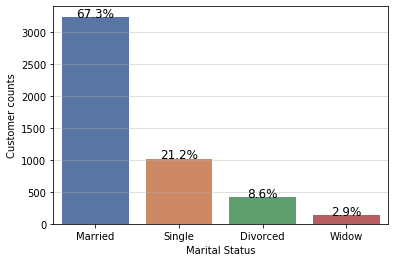

In [356]:

Total=df_treated['Marital_Status'].value_counts().sum()


values = df_treated['Marital_Status'].value_counts().keys().tolist()
counts = df_treated['Marital_Status'].value_counts().tolist()

sns.barplot(x=values,y=counts, palette="deep")

ax = plt.gca()

position = 0
for value in counts:
        ax.text(position, value, '{:.1f}%'.format(value / Total * 100), color = 'black', ha = 'center', size = 'large' )
        
        position = position + 1

plt.grid(axis='y', alpha=0.5)
plt.xlabel('Marital Status')
plt.ylabel('Customer counts')
plt.show()

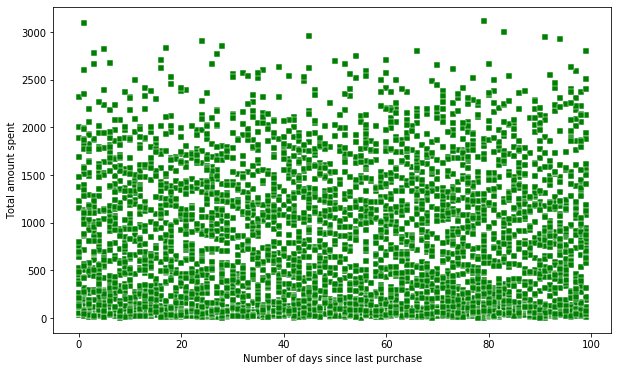

In [357]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Recency', y= 'Mnt', data = df_treated , color='green',marker="s" )
plt.xlabel("Number of days since last purchase")
plt.ylabel("Total amount spent")
plt.show()

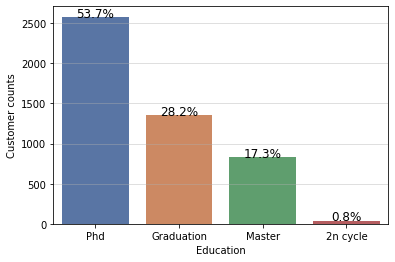

In [358]:
Total=df_treated['Education'].value_counts().sum()


values = df_treated['Education'].value_counts().keys().tolist()
counts = df_treated['Education'].value_counts().tolist()

sns.barplot(x=values,y=counts, palette="deep")

ax = plt.gca()

position = 0
for value in counts:
        ax.text(position, value, '{:.1f}%'.format(value / Total * 100), color = 'black', ha = 'center',size = 'large')
        
        position = position + 1

plt.grid(axis='y', alpha=0.5)
plt.xlabel('Education')
plt.ylabel('Customer counts')
plt.show()

Text(0, 0.5, 'Total amount spent')

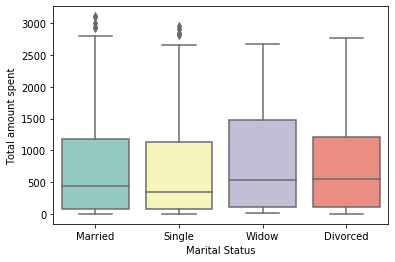

In [359]:
ax = sns.boxplot(x="Marital_Status", y="Mnt", data=df_treated ,palette="Set3")

plt.xlabel("Marital Status")
plt.ylabel("Total amount spent")

Text(0, 0.5, 'Total amount spent')

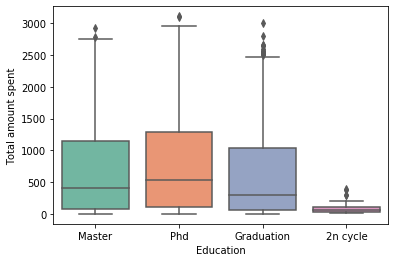

In [360]:
ax = sns.boxplot(x="Education", y="Mnt", data=df_treated ,palette="Set2")
plt.xlabel("Education")
plt.ylabel('Total amount spent')

Text(0, 0.5, 'Total amount spent')

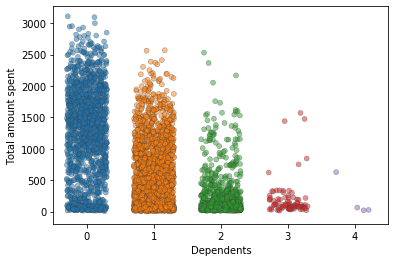

In [361]:
ax = sns.stripplot(x = "Dependents", y="Mnt", data=df_treated  , jitter=0.3 ,linewidth=0.5, alpha=.5, s=5)
# ax = sns.swarmplot(x = "Dependents", y="Mnt", data=df_treated ,linewidth=0.5, alpha=.5, s=5)

plt.xlabel("Dependents")
plt.ylabel('Total amount spent')

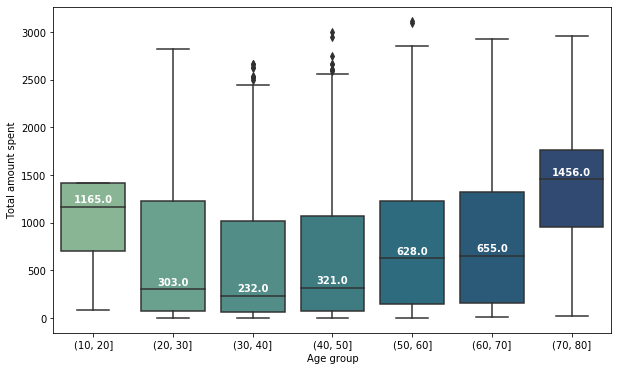

In [362]:
plt.figure(figsize=(10,6))
box_plot = sns.boxplot(x="age_bins", y="Mnt", data=df_treated ,palette="crest")

medians = df_treated .groupby(['age_bins'])['Mnt'].median()
vertical_offset =df_treated ['Mnt'].median() * 0.1 


for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='medium',color='w',weight='semibold')
plt.xlabel("Age group")
plt.ylabel("Total amount spent")
plt.show()



# stats = f_stats_boxplot(df_in['TotalPurchases'])
# axPurchases_00_00.text(stats[1], -.3, '{:.1f}'.format(stats[1]), color = 'red', ha = 'center')
# axPurchases_00_00.text(stats[3], .1, '{:.1f}'.format(stats[3]), color = 'black', ha = 'center')
# axPurchases_00_00.text(stats[5], -.3, '{:.1f}'.format(stats[5]), color = 'red', ha = 'center')

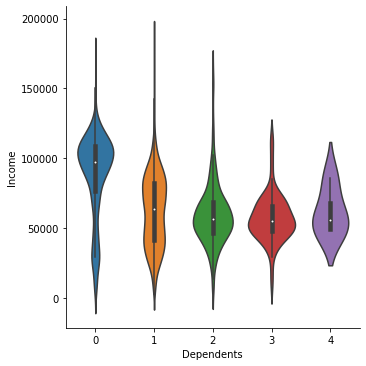

In [363]:
ax = sns.catplot(x="Dependents", y="Income", data=df_treated,kind="violin")
plt.xlabel("Dependents")
plt.ylabel('Income')
plt.show()

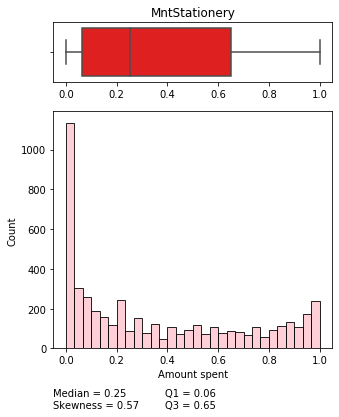

In [364]:
lista = df_normalized['MntStationery_BC']

fig, axes = plt.subplots(2,1, figsize = (5,6),gridspec_kw={'height_ratios': [1, 4]})
g1=sns.histplot(ax = axes[1], data = df_normalized, x = 'MntStationery_BC', color="pink", bins = 30)
g2=sns.boxplot(ax = axes[0], data = df_normalized, x = 'MntStationery_BC', color="red" )
g2.set(xlabel=None)
g2.set(title='MntStationery')
res = stats (lista)

axes[1].text(0, -5.3, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
       color= 'k')
axes[1].text(0, -5.5, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
       color= 'k')
axes[1].text(0.4, -5.3, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
       color= 'k')
axes[1].text(0.4, -5.5, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
       color= 'k')

plt.xlabel("Amount spent")

plt.show()

In [365]:
# var_list= ['MntGroceries_BC','MntStationery_BC','MntHouseKeeping_BC','MntWellnessBeauty_BC','MntEletronics_BC','MntLimitedEdition_BC']

# for var in var_list:
    
#     lista = df_normalized[var]

#     fig, axes = plt.subplots(2,1, figsize = (3,7),gridspec_kw={'height_ratios': [1, 4]})
#     g1=sns.histplot(ax = axes[1], data = df_normalized, x = var, color="pink", bins = 30)
#     g2=sns.boxplot(ax = axes[0], data = df_normalized, x = var, color="red" )
#     g2.set(xlabel=None)
#     g2.set(title=var)
#     res = stats (lista)

#     axes[1].text(0, -5.3, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
#            color= 'k')
#     axes[0].text(0, -5.6, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
#            color= 'k')
#     axes[1].text(0.7, -5.3, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
#            color= 'k')
#     axes[1].text(0.7, -5.6, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
#            color= 'k')

#     plt.xlabel("Amount spent")

#     plt.show()

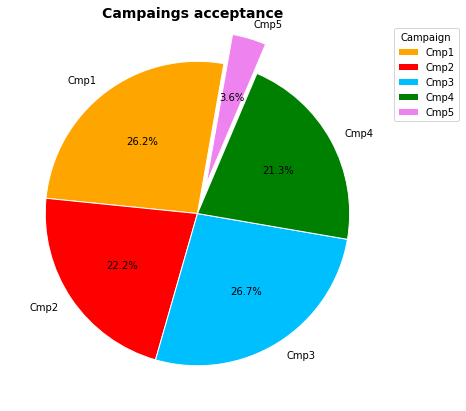

In [366]:
  
# Creating dataset 
Cmp = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5'] 
OffersbyCmp = pd.Series(df_treated[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(), name = 'Campaign')  

explode = (0.0, 0.0, 0.0, 0, 0.2) 
colors = ( "orange", "red", "deepskyblue", "green", "violet", "cadetblue","grey") 
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(OffersbyCmp, explode=explode, autopct='%1.1f%%', labels = Cmp, shadow = False, colors = colors, startangle = 80, wedgeprops = wp, textprops = dict(color ="black")) 

# legend 
ax.legend(wedges, Cmp, title ="Campaign", loc ="upper right", bbox_to_anchor =(0.7, 0, 0.5, 1)) 

ax.set_title("Campaings acceptance  ", fontsize=14, weight = "bold", color = "Black") 



plt.show() 

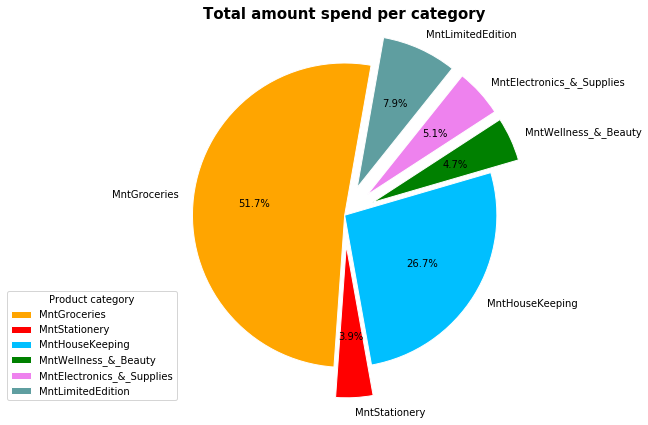

In [367]:
Mnt = ['MntGroceries','MntStationery','MntHouseKeeping','MntWellness_&_Beauty','MntElectronics_&_Supplies','MntLimitedEdition'] 
ProductUsage = pd.Series(df_treated[['MntGroceries', 'MntStationery', 'MntHouseKeeping', 'MntWellness_&_Beauty', 'MntElectronics_&_Supplies','MntLimitedEdition']].sum(), name = 'Product')  

explode = (0.0, 0.2, 0.0, 0.2, 0.2,0.2) 
  
colors = ( "orange", "red", "deepskyblue", "green", "violet", "cadetblue","grey") 
  
wp = { 'linewidth' : 1, 'edgecolor' : "white" } 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(ProductUsage, explode=explode, autopct='%1.1f%%', labels = Mnt, shadow = False, colors = colors, startangle = 80, wedgeprops = wp, textprops = dict(color ="black")) 

ax.legend(wedges, Mnt, title ="Product category", loc ="lower left", bbox_to_anchor =(-0.4, 0, 0.5, 1)) 
  
ax.set_title("Total amount spend per category", fontsize=15, weight = "bold", color = "Black") 
  
# show plot 
plt.show() 

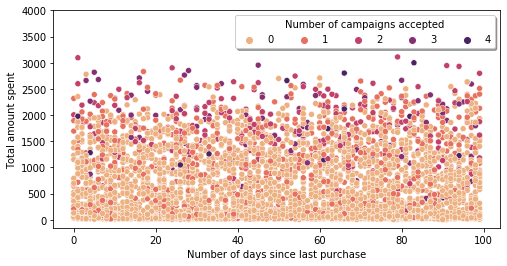

In [368]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'Recency', y= 'Mnt', data = df_treated ,hue= 'Num_Cmp_acepted' ,palette ='flare')
plt.xlabel("Number of days since last purchase")
plt.ylabel("Total amount spent")
# plt.legend(loc='lower left', bbox_to_anchor=(0.6,0.5))
plt.legend(shadow=True, fancybox=True, ncol = 5, title="Number of campaigns accepted")
plt.ylim(top=4000)
plt.show()

<a class="anchor" id="modelling"></a>
# 4. Modelling

<a class="anchor" id="clustering"></a>
## 4.1 Clustering via K-means

<a class="anchor" id="productusage"></a>
### 4.1.1 Product usage segmentation

In [369]:
df_product_segmentation = df_normalized.copy()
# df_product_segmentation.describe().T

In [370]:

df_product_segmentation_k_means = df_product_segmentation.filter(items=['MntGroceries_BC', 'MntStationery_BC',
                'MntHouseKeeping_BC', 'MntWellnessBeauty_BC', 'MntEletronics_BC',
             'MntLimitedEdition_BC', 'MntGroceries_flag', 'MntStationery_flag' , 'MntHouseKeeping_flag' ,
            'MntWellness_&_Beauty_flag', 'MntElectronics_&_Supplies_flag' , 'MntLimitedEdition_flag']).copy()
df_product_segmentation_k_means.head(n = 5)

MntGroceries_BC  MntStationery_BC  MntHouseKeeping_BC  \
Card_ID                                                           
10003075         0.711100          0.869938            0.948346   
10003076         0.868892          0.382246            0.939702   
10003078         0.720462          0.918590            0.583150   
10003079         0.798530          0.810996            0.795004   
10003080         0.066082          0.032585            0.134755   

          MntWellnessBeauty_BC  MntEletronics_BC  MntLimitedEdition_BC  \
Card_ID                                                                  
10003075              0.242151          0.700952              0.408407   
10003076              0.843586          0.580766              0.425757   
10003078              0.803268          0.713852              0.892181   
10003079              0.751292          0.720069              0.968993   
10003080              0.054748          0.000000              0.268933   

          MntGroceries_flag  MntStationery_flag  MntHouseKeeping_flag  \
Card_ID                                                                 
10003075                  1                   1                     1   
10003076                  1                   1                     1   
10003078                  1                   1                     1   
10003079                  1                   1                     1   
10003080                  1                   1                     1   

          MntWellness_&_Beauty_flag  MntElectronics_&_Supplies_flag  \
Card_ID                                                               
10003075                          1                               1   
10003076                          1                               1   
10003078                          1                               1   
10003079                          1                               1   
10003080                          1                               0   

          MntLimitedEdition_flag  
Card_ID                           
10003075                       1  
10003076                       1  
10003078                       1  
10003079                       1  
10003080                       1

In [371]:
inertias_list = []

kmeans_kwargs = {
        "init": "random",
        "n_init": 40,
        "max_iter": 500,        
    }

for k in range (1,15):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs, precompute_distances = True , random_state= 100) 

    kmeans.fit(df_product_segmentation_k_means)

    inertias_list.append(kmeans.inertia_)


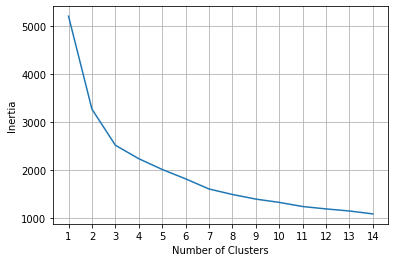

In [372]:
#plot number of clusters
plt.plot(range(1, 15), inertias_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(np.arange(1, 15, 1))
plt.grid()
plt.show()


In [373]:
#Elbow location
kl = KneeLocator( range(1, 15), inertias_list, curve="convex", direction="decreasing")
kl.elbow

3

In [374]:
#After some iterations 6 cluster was established
n_clusters = 6
# Model training
model = KMeans(n_clusters = n_clusters, n_init = 40, max_iter = 2000 , random_state=100)
model.fit(df_product_segmentation_k_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=6, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [375]:
df_product_segmentation_k_means['product_clusters'] = model.labels_
df_treated['product_clusters'] = model.labels_
df_product_segmentation_k_means.head(n=5)
df_treated.head(n=5)

Name Education Marital_Status    Income  Kidhome  \
Card_ID                                                                      
10003075       Mr. Adam Glover    Master        Married   90782.0        0   
10003076  Mr. Cameron McDonald       Phd         Single  113023.0        0   
10003078    Mr. Keith Davidson       Phd         Single   93571.0        0   
10003079    Mr. Alexander Gill       Phd         Single   91852.0        0   
10003080        Mr. Neil Piper       Phd        Married   22386.0        1   

          Teenhome  Region Dt_Customer  Recency  MntGroceries  ...     Mnt  \
Card_ID                                                        ...           
10003075         0       0   11/3/2018       66         622.0  ...  1465.0   
10003076         0       2   4/18/2019        6        1014.0  ...  1818.0   
10003078         1       0   7/22/2018       10         639.0  ...  1189.0   
10003079         1       2    2/3/2018       26         806.0  ...  1580.0   
10003080         1       0  10/31/2018       65          32.0  ...    84.0   

          freq     MntFrq  Num_Cmp_acepted  Gender  Dependents  age_bins  \
Card_ID                                                                    
10003075    29  50.517241                1       0           0  (30, 40]   
10003076    21  86.571429                0       0           0  (20, 30]   
10003078    31  38.354839                0       0           1  (30, 40]   
10003079    35  45.142857                1       0           1  (40, 50]   
10003080    15   5.600000                1       0           2  (50, 60]   

          Higher_Educ  Single_or_not  product_clusters  
Card_ID                                                 
10003075            1              1                 2  
10003076            0              0                 2  
10003078            0              0                 2  
10003079            0              0                 2  
10003080            0              1                 0  

[5 rows x 37 columns]

C:\Users\Tiago\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tiago\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tiago\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


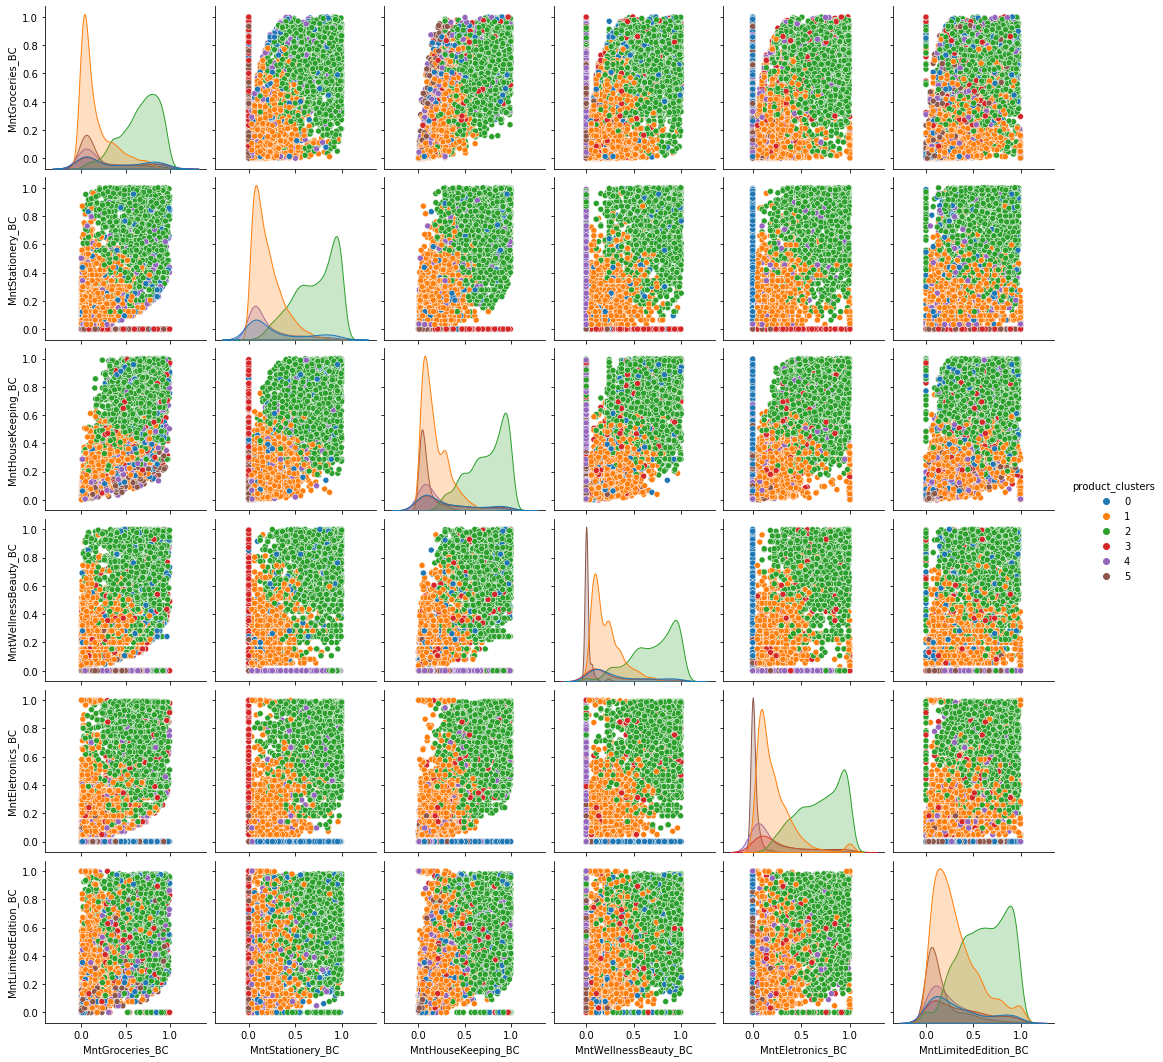

In [376]:
variaveis = ['MntGroceries_BC', 'MntStationery_BC',
                'MntHouseKeeping_BC', 'MntWellnessBeauty_BC', 'MntEletronics_BC',
             'MntLimitedEdition_BC'] 

ax = sns.pairplot(df_product_segmentation_k_means, vars = variaveis,hue='product_clusters', palette = "tab10" , diag_kind = 'kde')

Text(0, 0.5, 'Total amount spent')

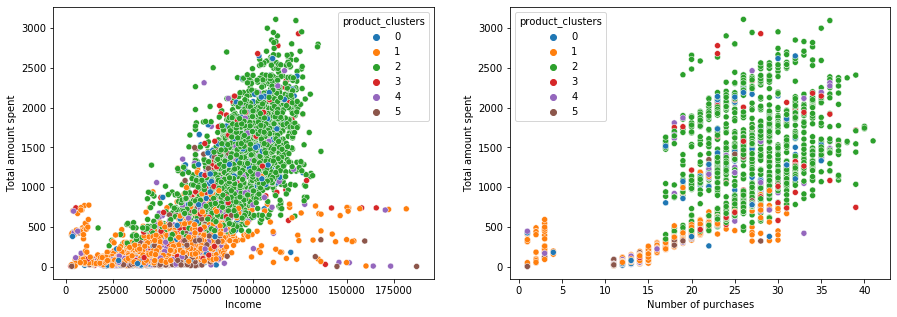

In [377]:
fig, (ax1, ax2) =plt.subplots(1,2,figsize =(15, 5))

sns.scatterplot(x = 'Income', y= 'Mnt', data = df_treated ,hue = 'product_clusters', palette = 'tab10' , ax=ax1)
sns.scatterplot(x = 'freq', y= 'Mnt', data = df_treated , hue = 'product_clusters' , palette = 'tab10', ax=ax2)


ax1.set_xlabel('Income')
ax1.set_ylabel('Total amount spent')
ax2.set_xlabel("Number of purchases")
ax2.set_ylabel('Total amount spent')


In [378]:
# fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
# for i in range (0,6):  
#     size = df_product_segmentation_k_means[df_product_segmentation_k_means['cluster'] == i]['MntGroceries_BC'].size
#     sns.histplot(df_product_segmentation_k_means[df_product_segmentation_k_means['cluster'] == i]['MntGroceries_BC'],
#                  ax = axes[i], bins = 30 ).set_title('Cluster ' + str(i+1) +'  (N = ' + str(size) +')')
    
# plt.tight_layout()

# for i in range (1,6):
#     axes[i].set_ylabel('')  

# for i in range (0,6):
#         axes[i].set_xlim([0, 1])
# plt.show()



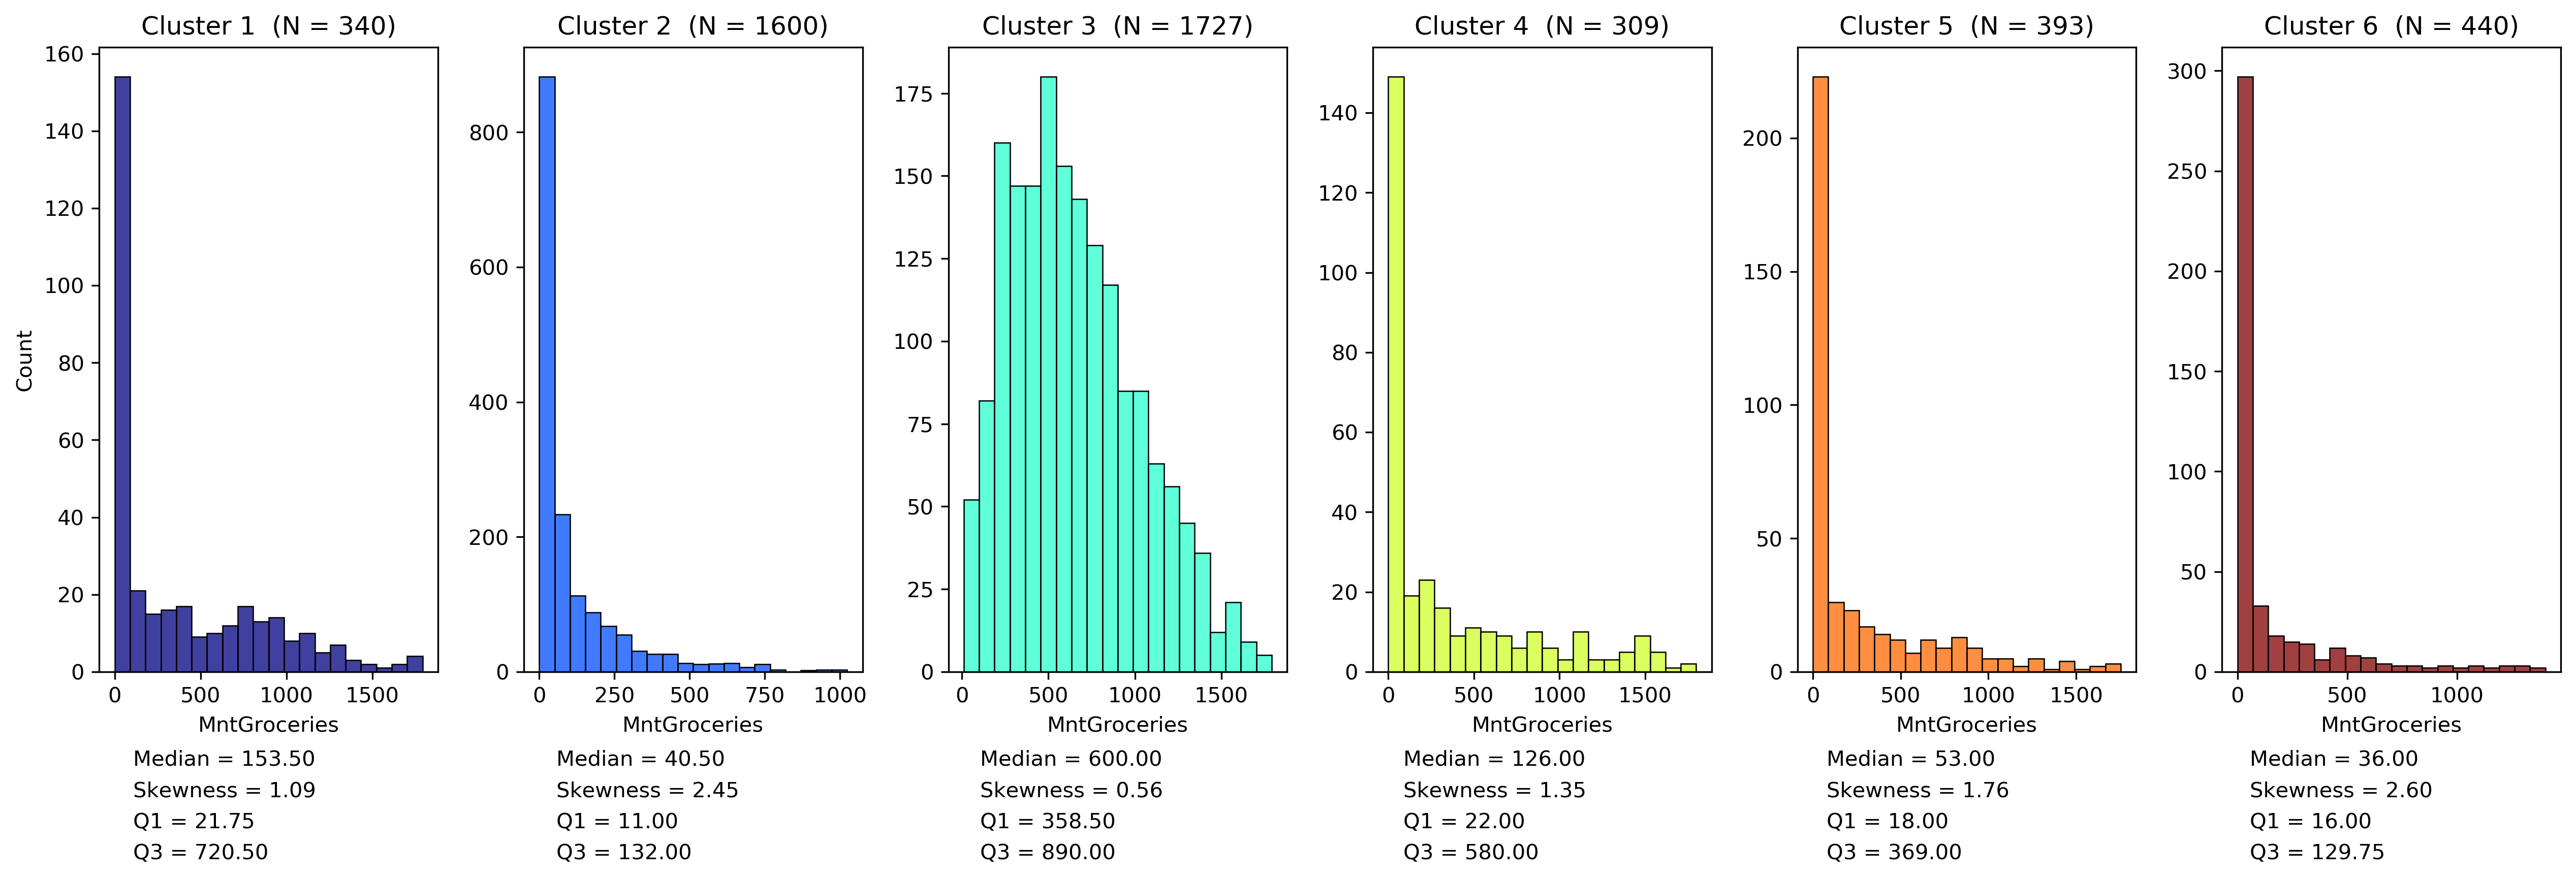

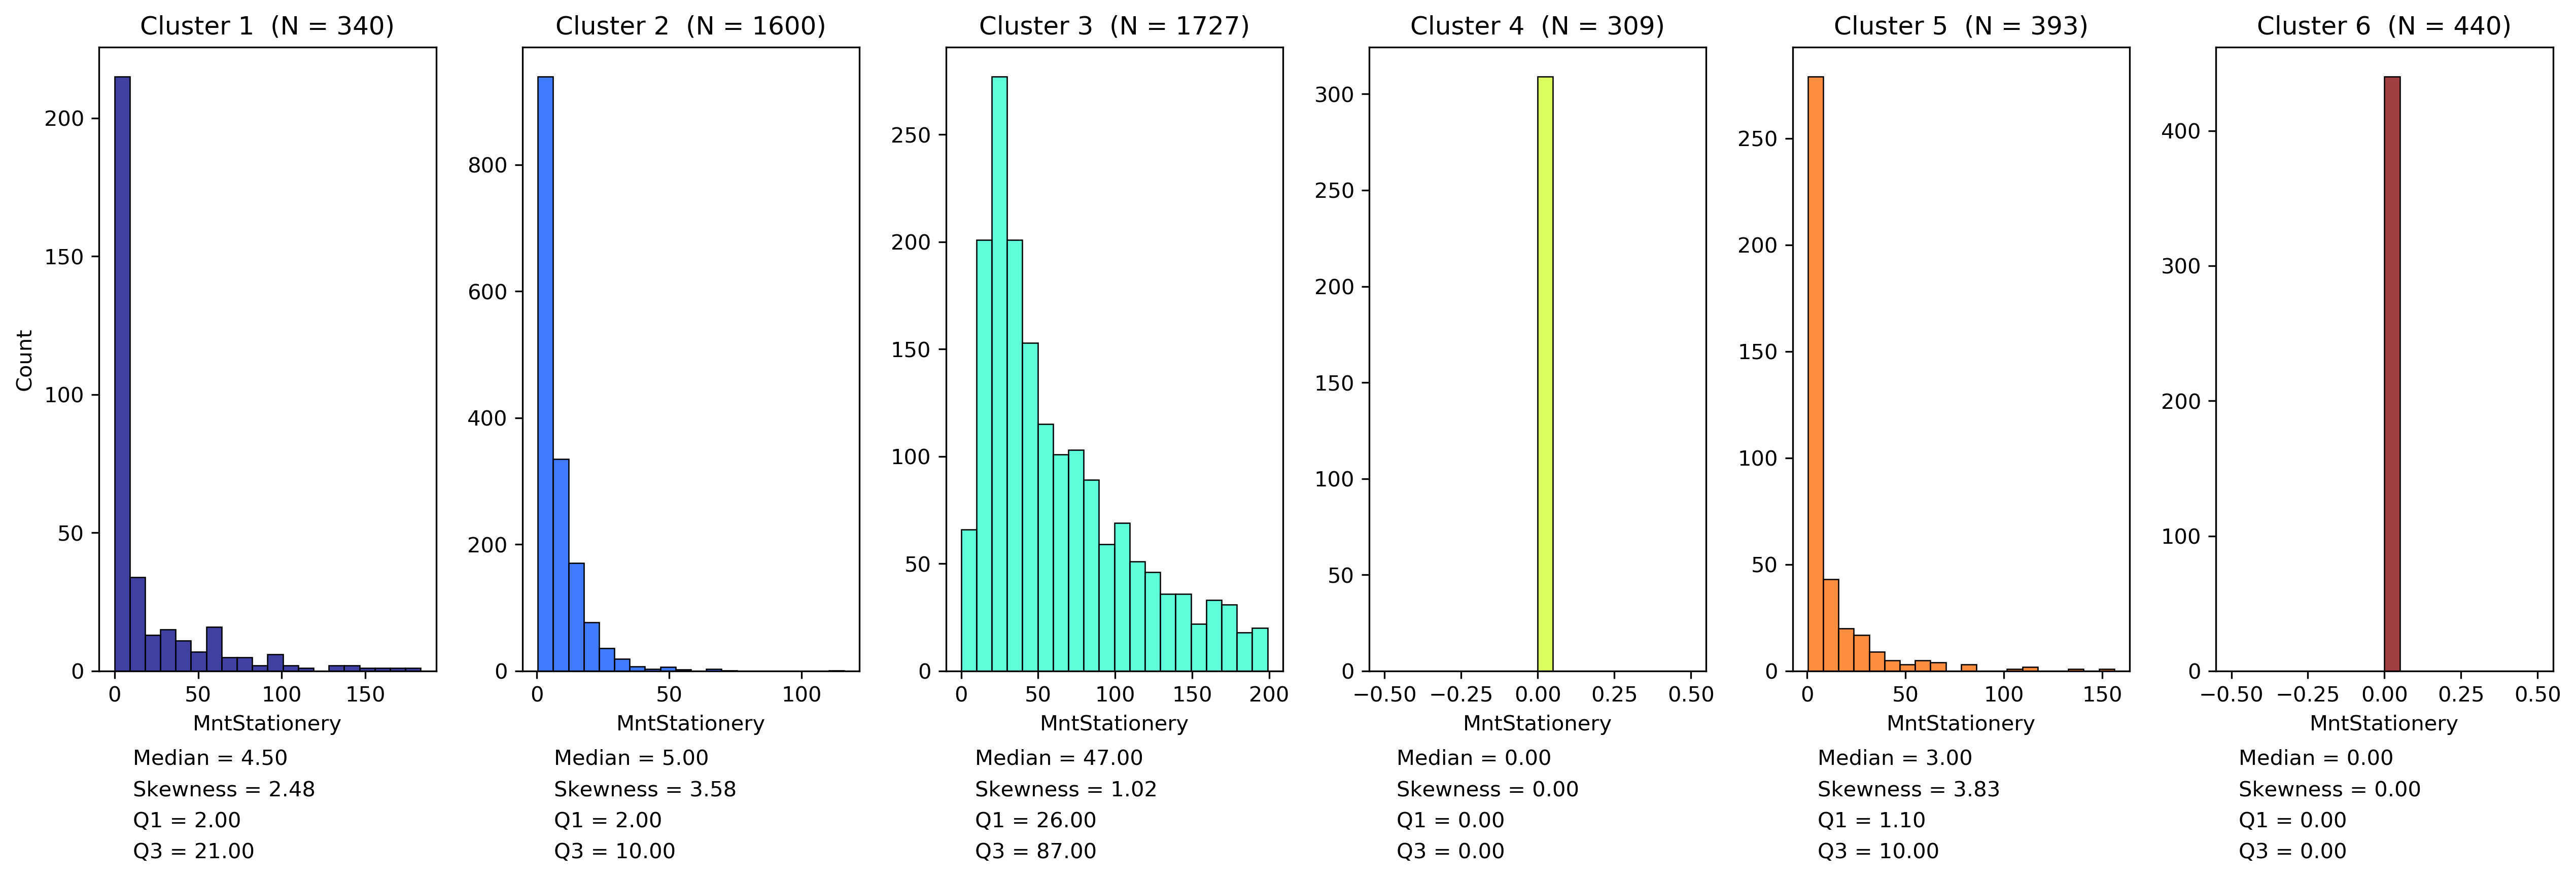

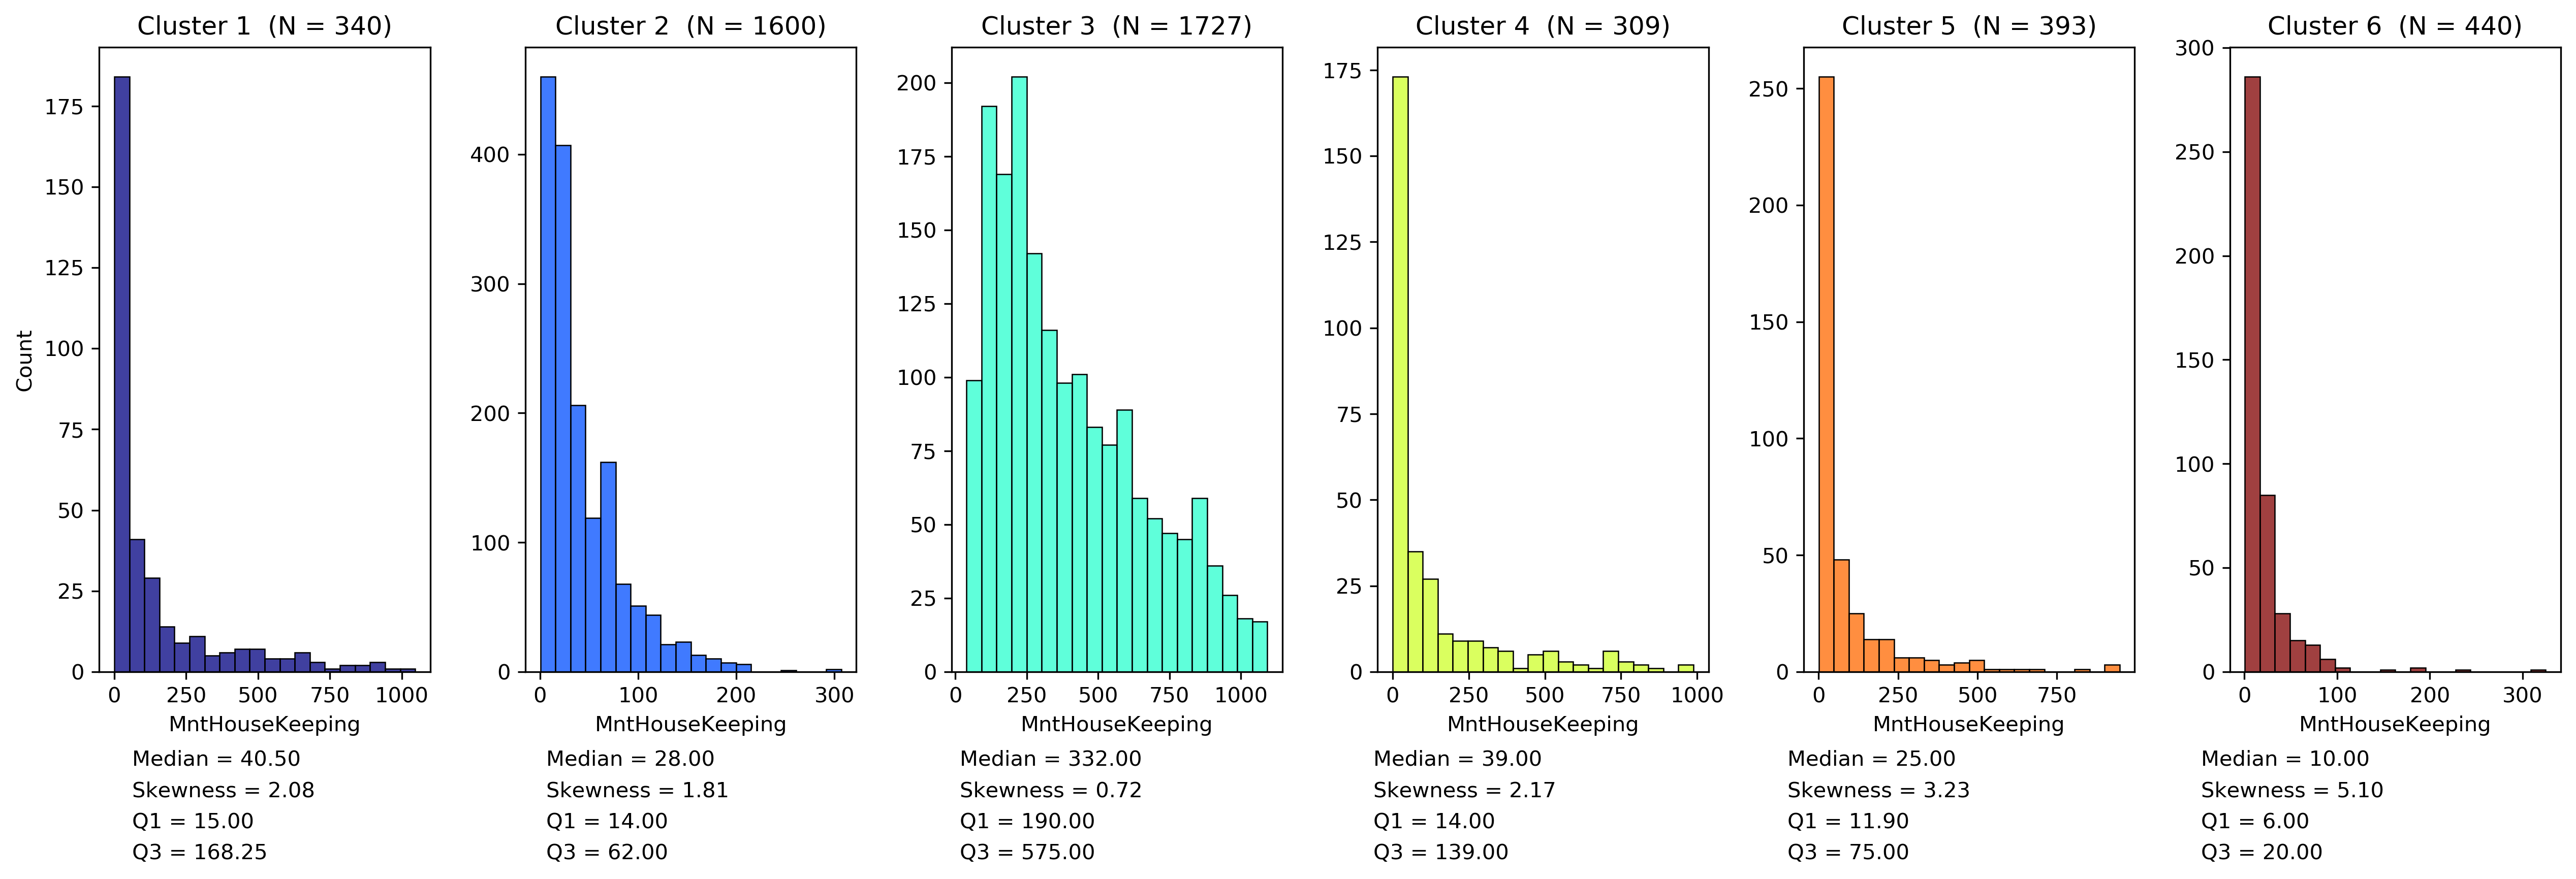

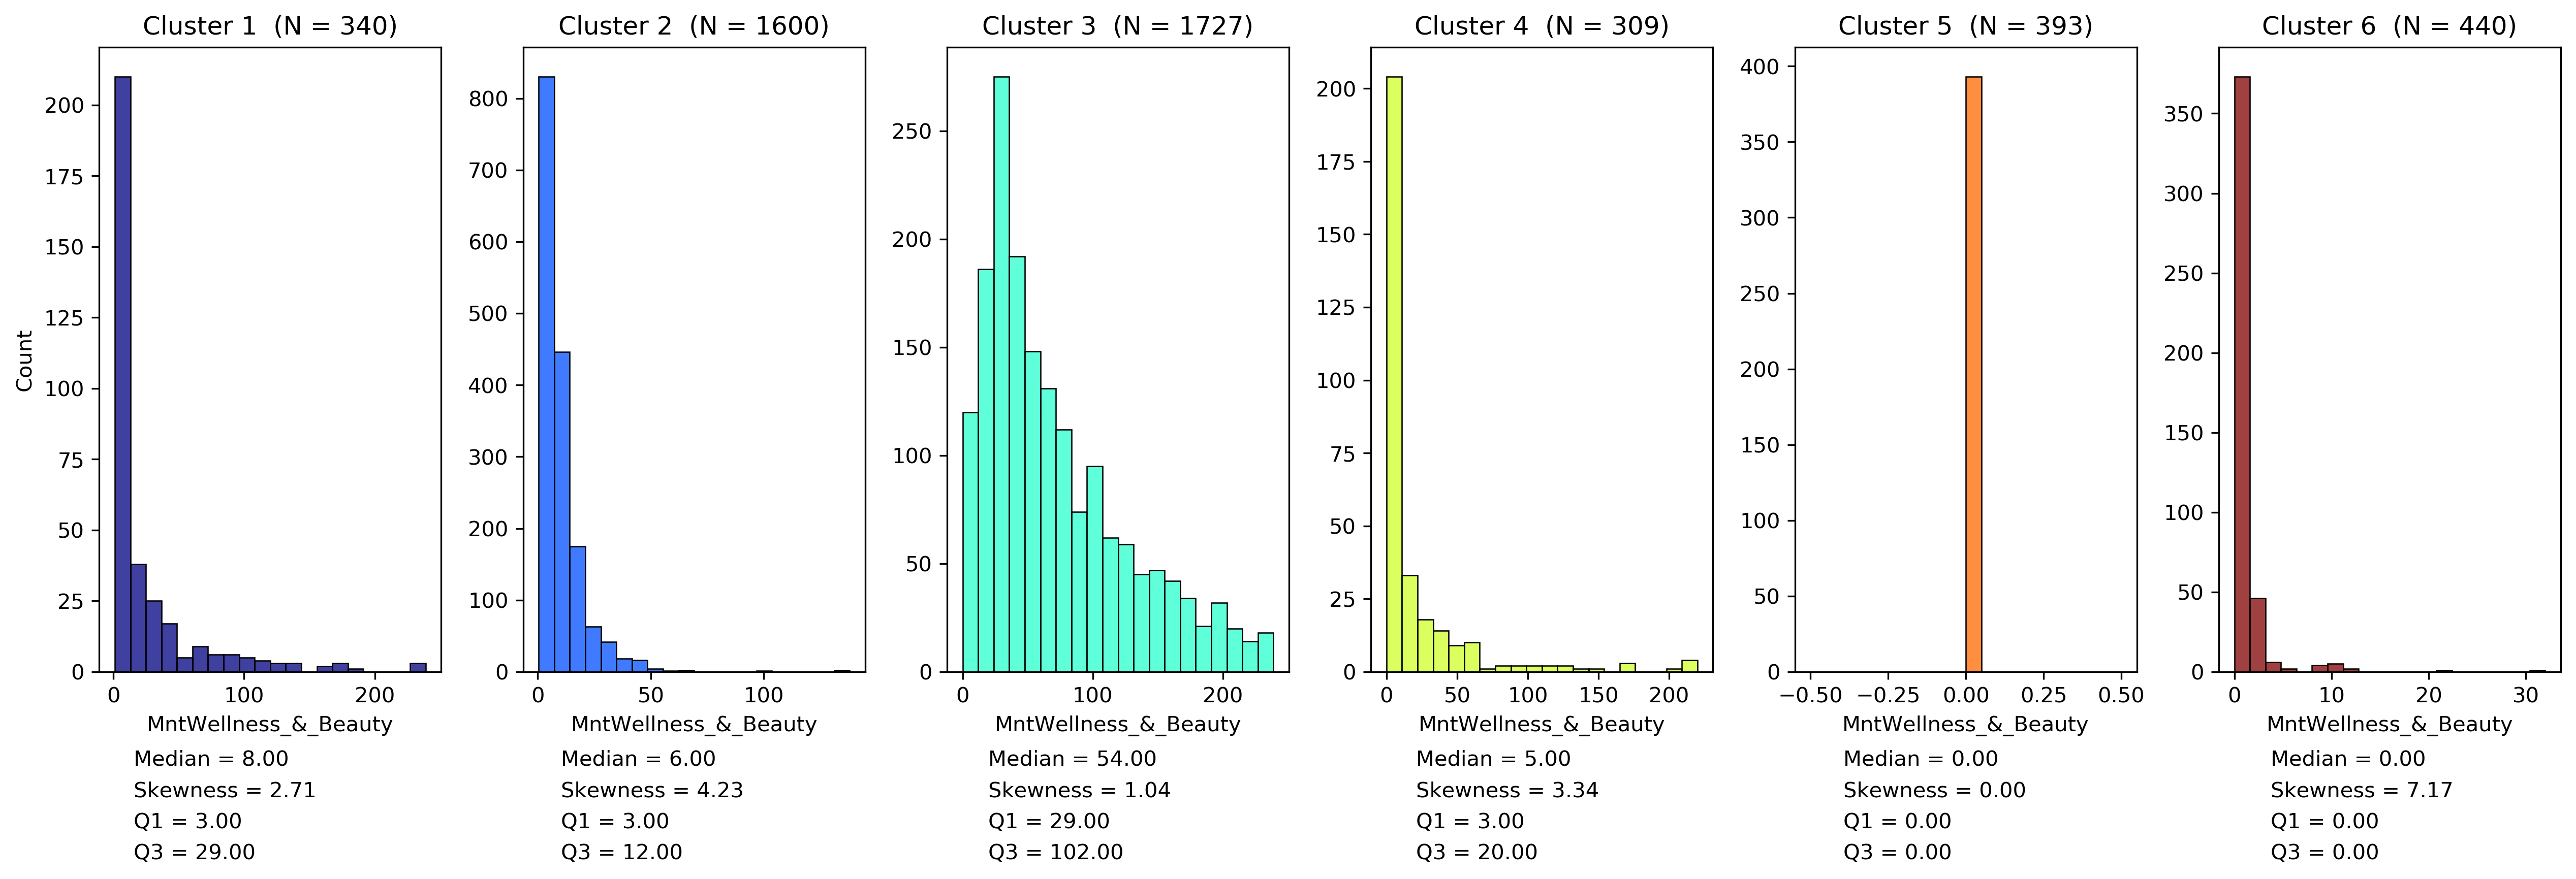

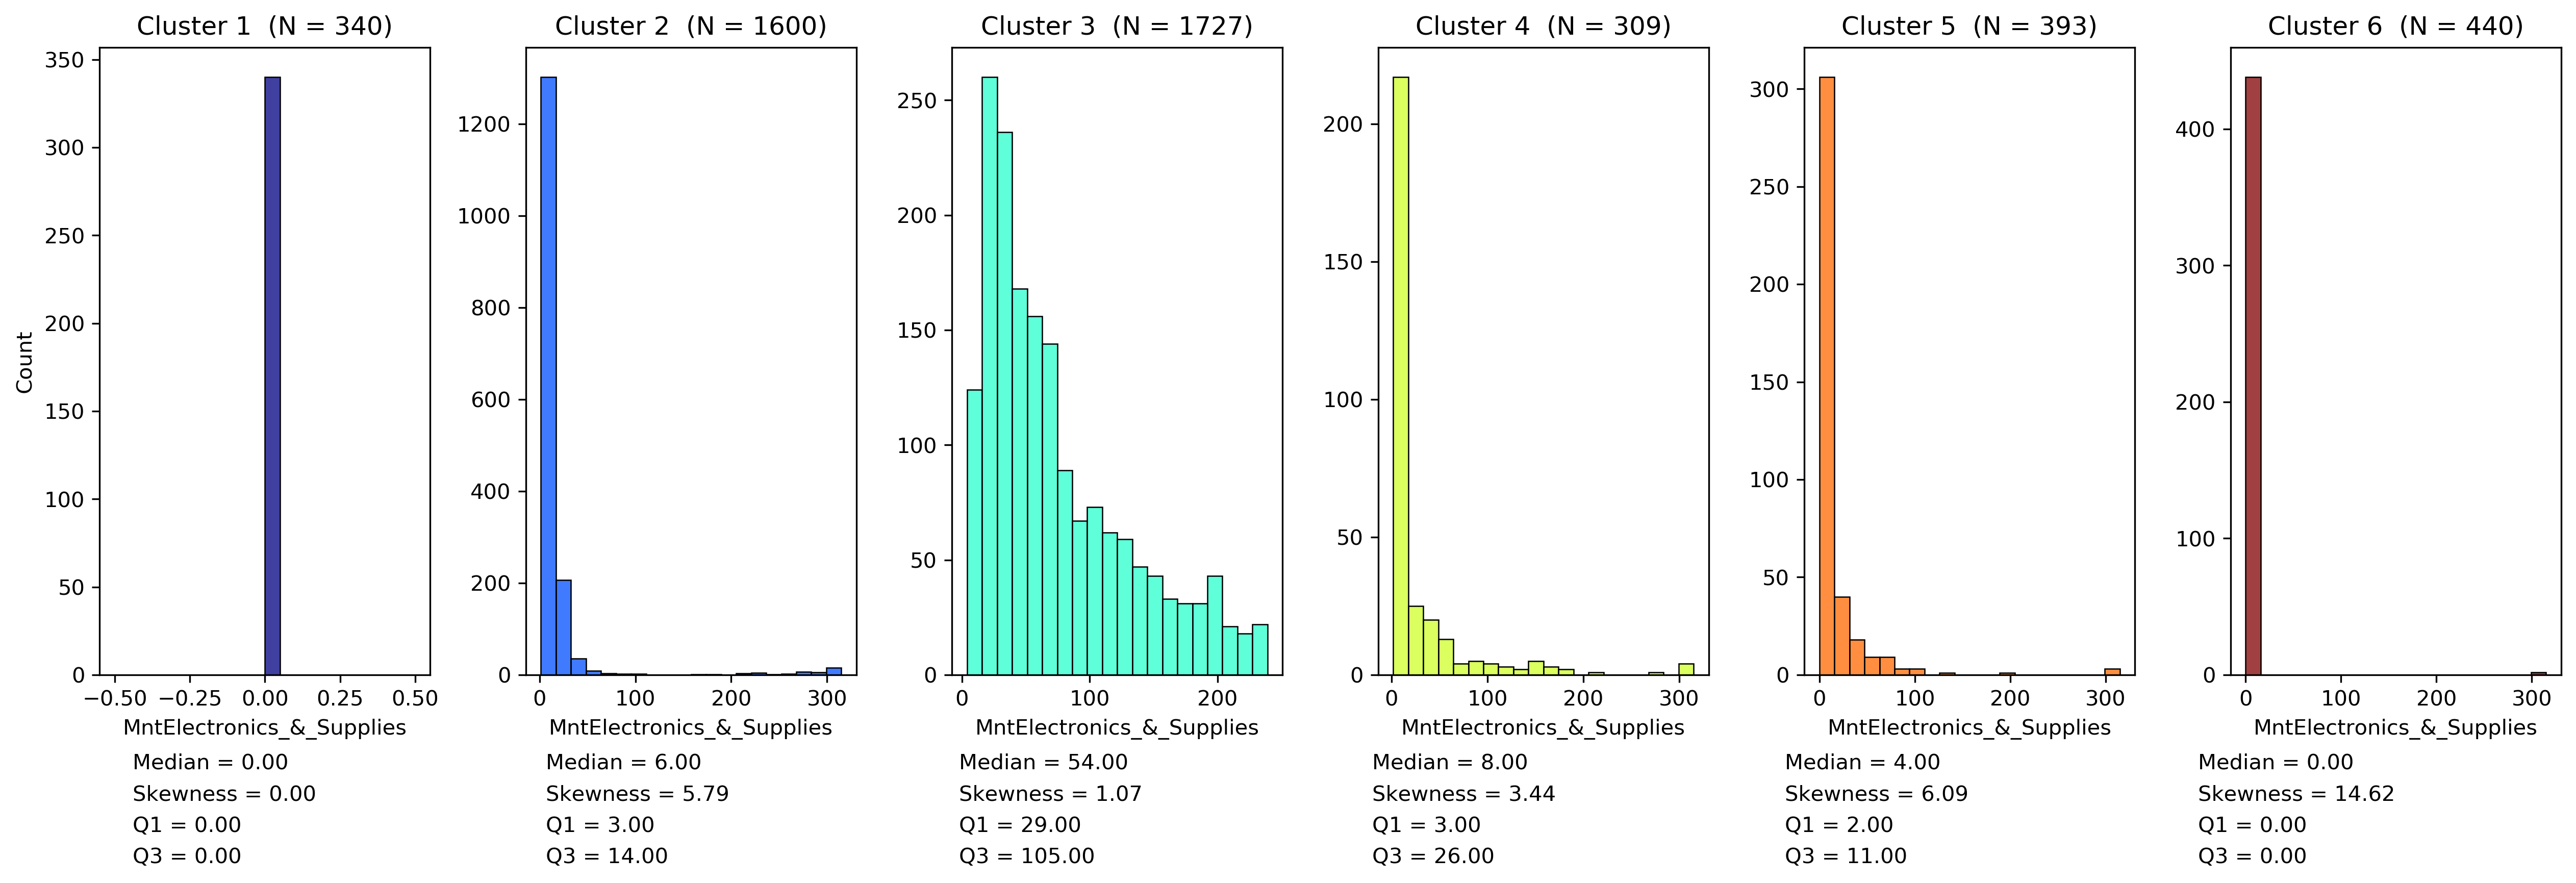

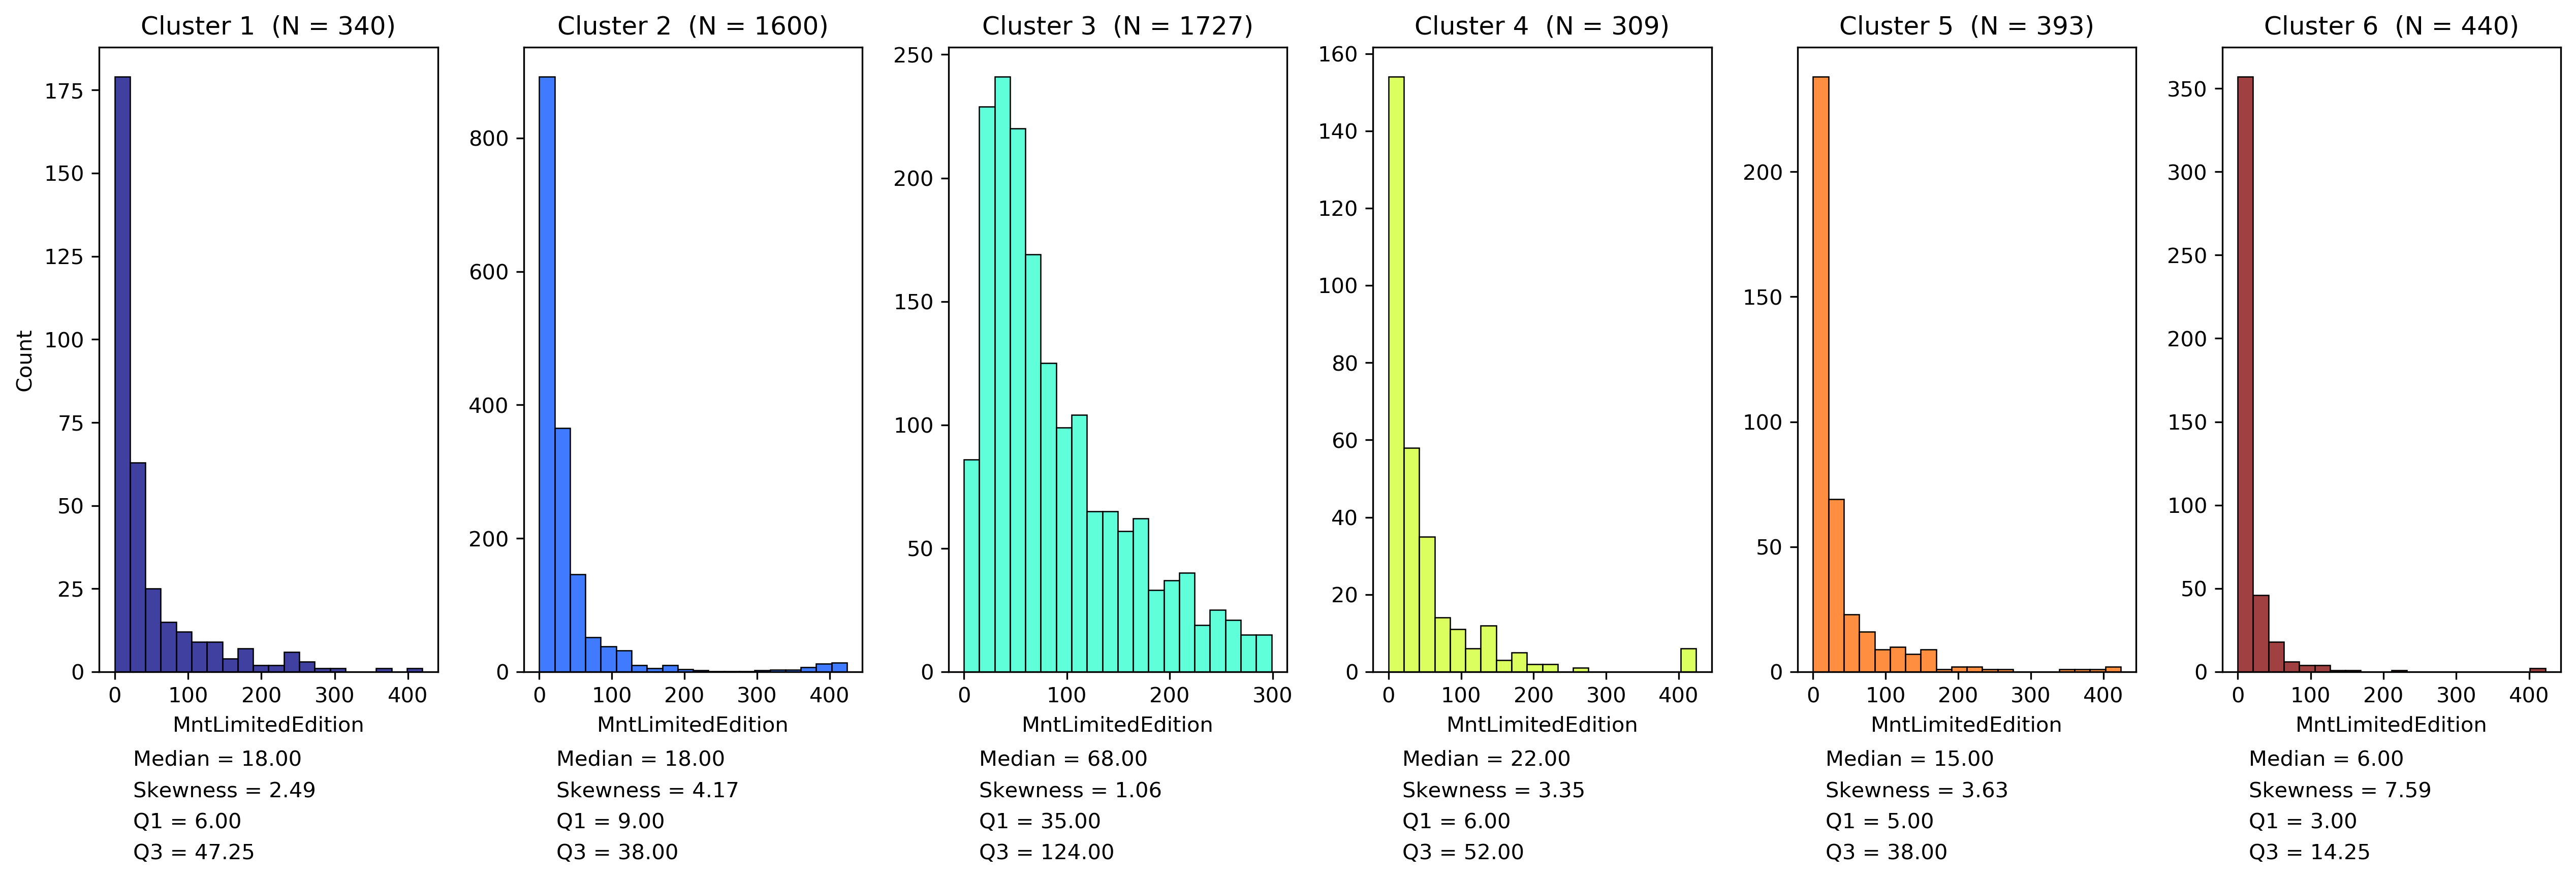

In [379]:
variaveis = ['MntGroceries', 'MntStationery',
                'MntHouseKeeping', 'MntWellness_&_Beauty', 'MntElectronics_&_Supplies',
             'MntLimitedEdition'] 
for var in variaveis:
    jet= plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0,1,6)))
    fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
    for i in range (0,6):   
        size = df_treated[df_treated['product_clusters'] == i][var].size
        sns.histplot(df_treated[df_treated['product_clusters'] == i][var],
                     ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) +'  (N = ' + str(size) +')')
        
        res = stats (df_treated[df_treated['product_clusters'] == i][var])   
    
        axes[i].text(0.1+i*1.25, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
               color= 'k')
        axes[i].text(0.1+i*1.25, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
               color= 'k')
        axes[i].text(0.1+i*1.25, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
               color= 'k')
        axes[i].text(0.1+i*1.25, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
               color= 'k')          
    

    for i in range (1,6):
        axes[i].set_ylabel('')  

    plt.tight_layout()
    plt.show()

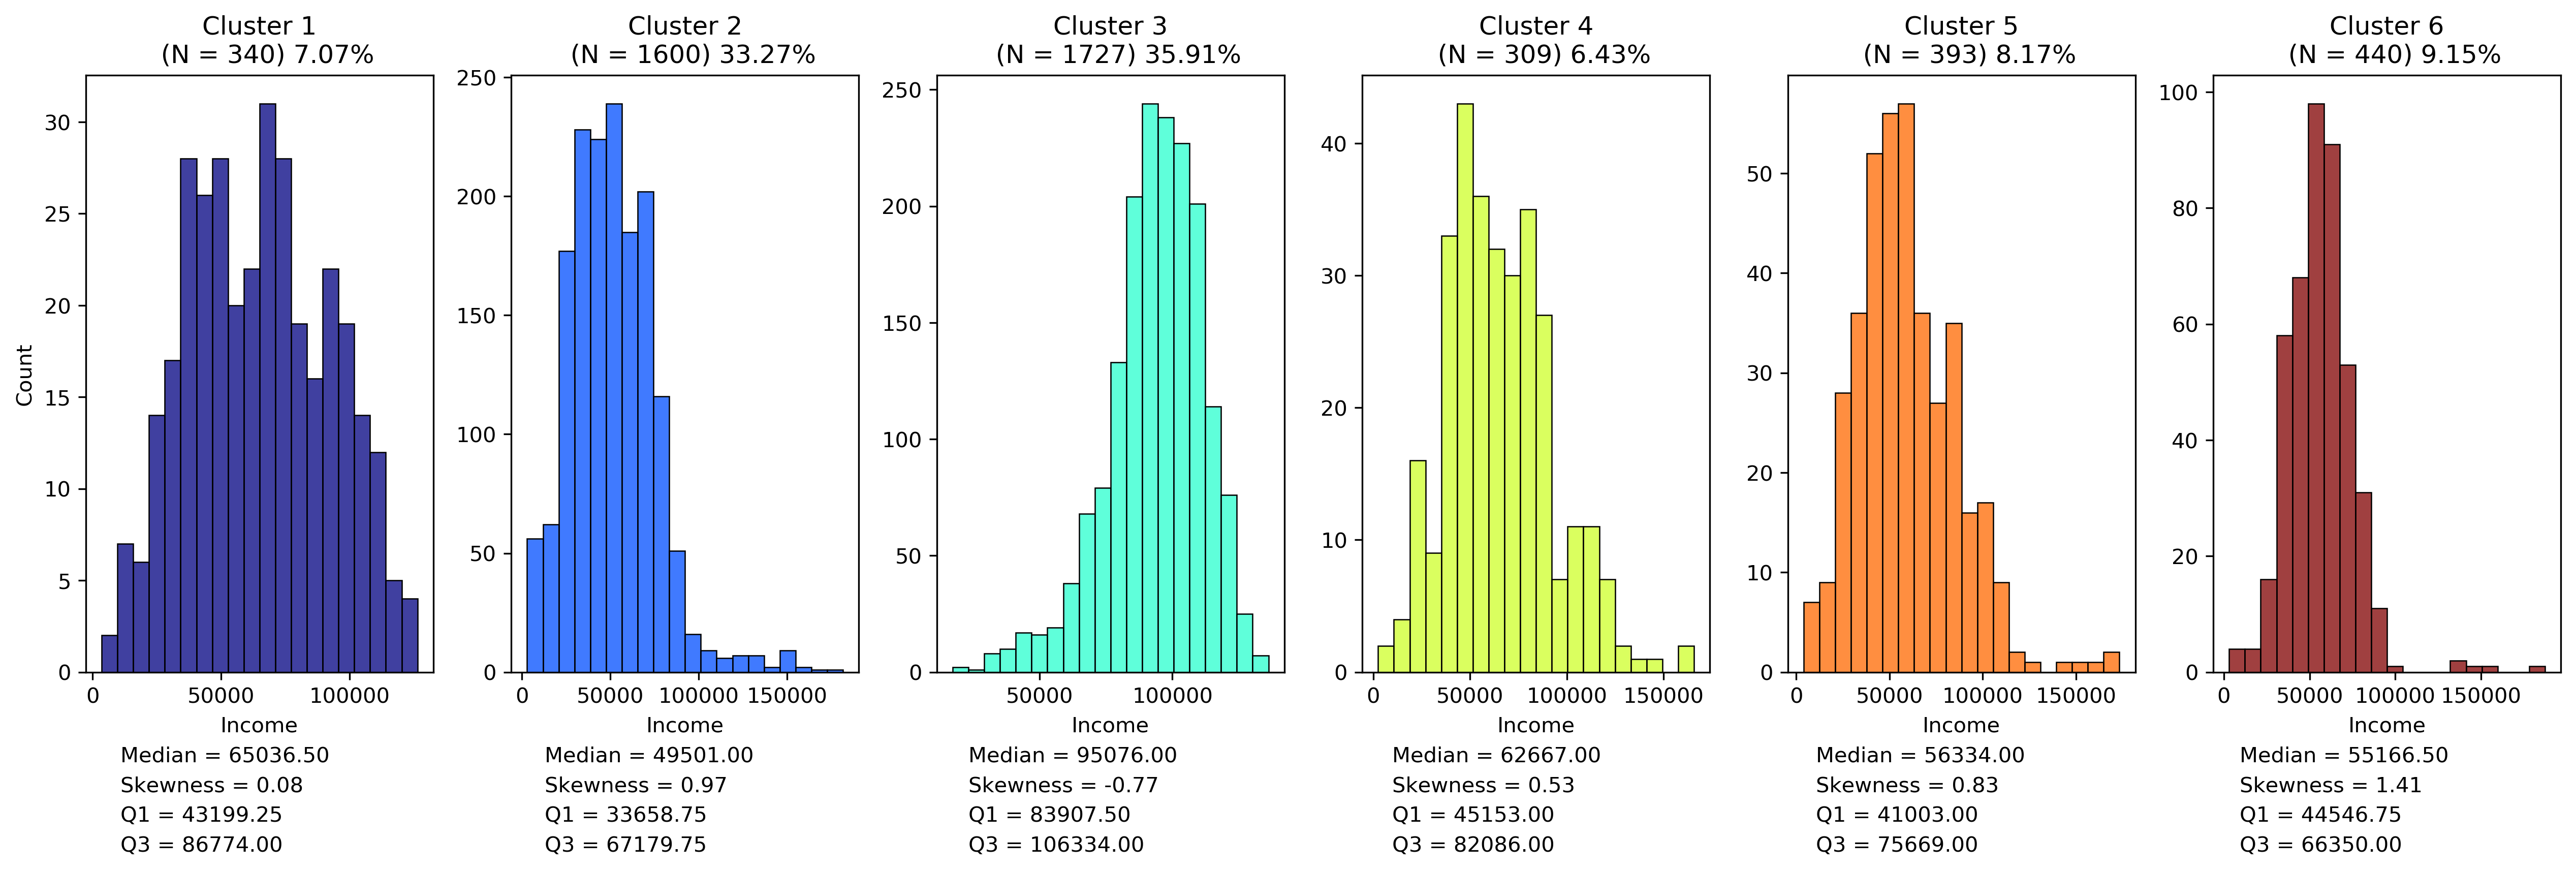

In [380]:
Total=df_treated['Income'].value_counts().sum()


fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))
for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['Income'].size
    percentage = round(size/Total*100,2)
    
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['Income'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    res = stats (df_treated[df_treated['product_clusters'] == i]['Income'])   
    
    axes[i].text(0.1+i*1.22, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.22, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.22, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.22, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')


for i in range (1,6):
        axes[i].set_ylabel('')  

plt.tight_layout()
plt.show()

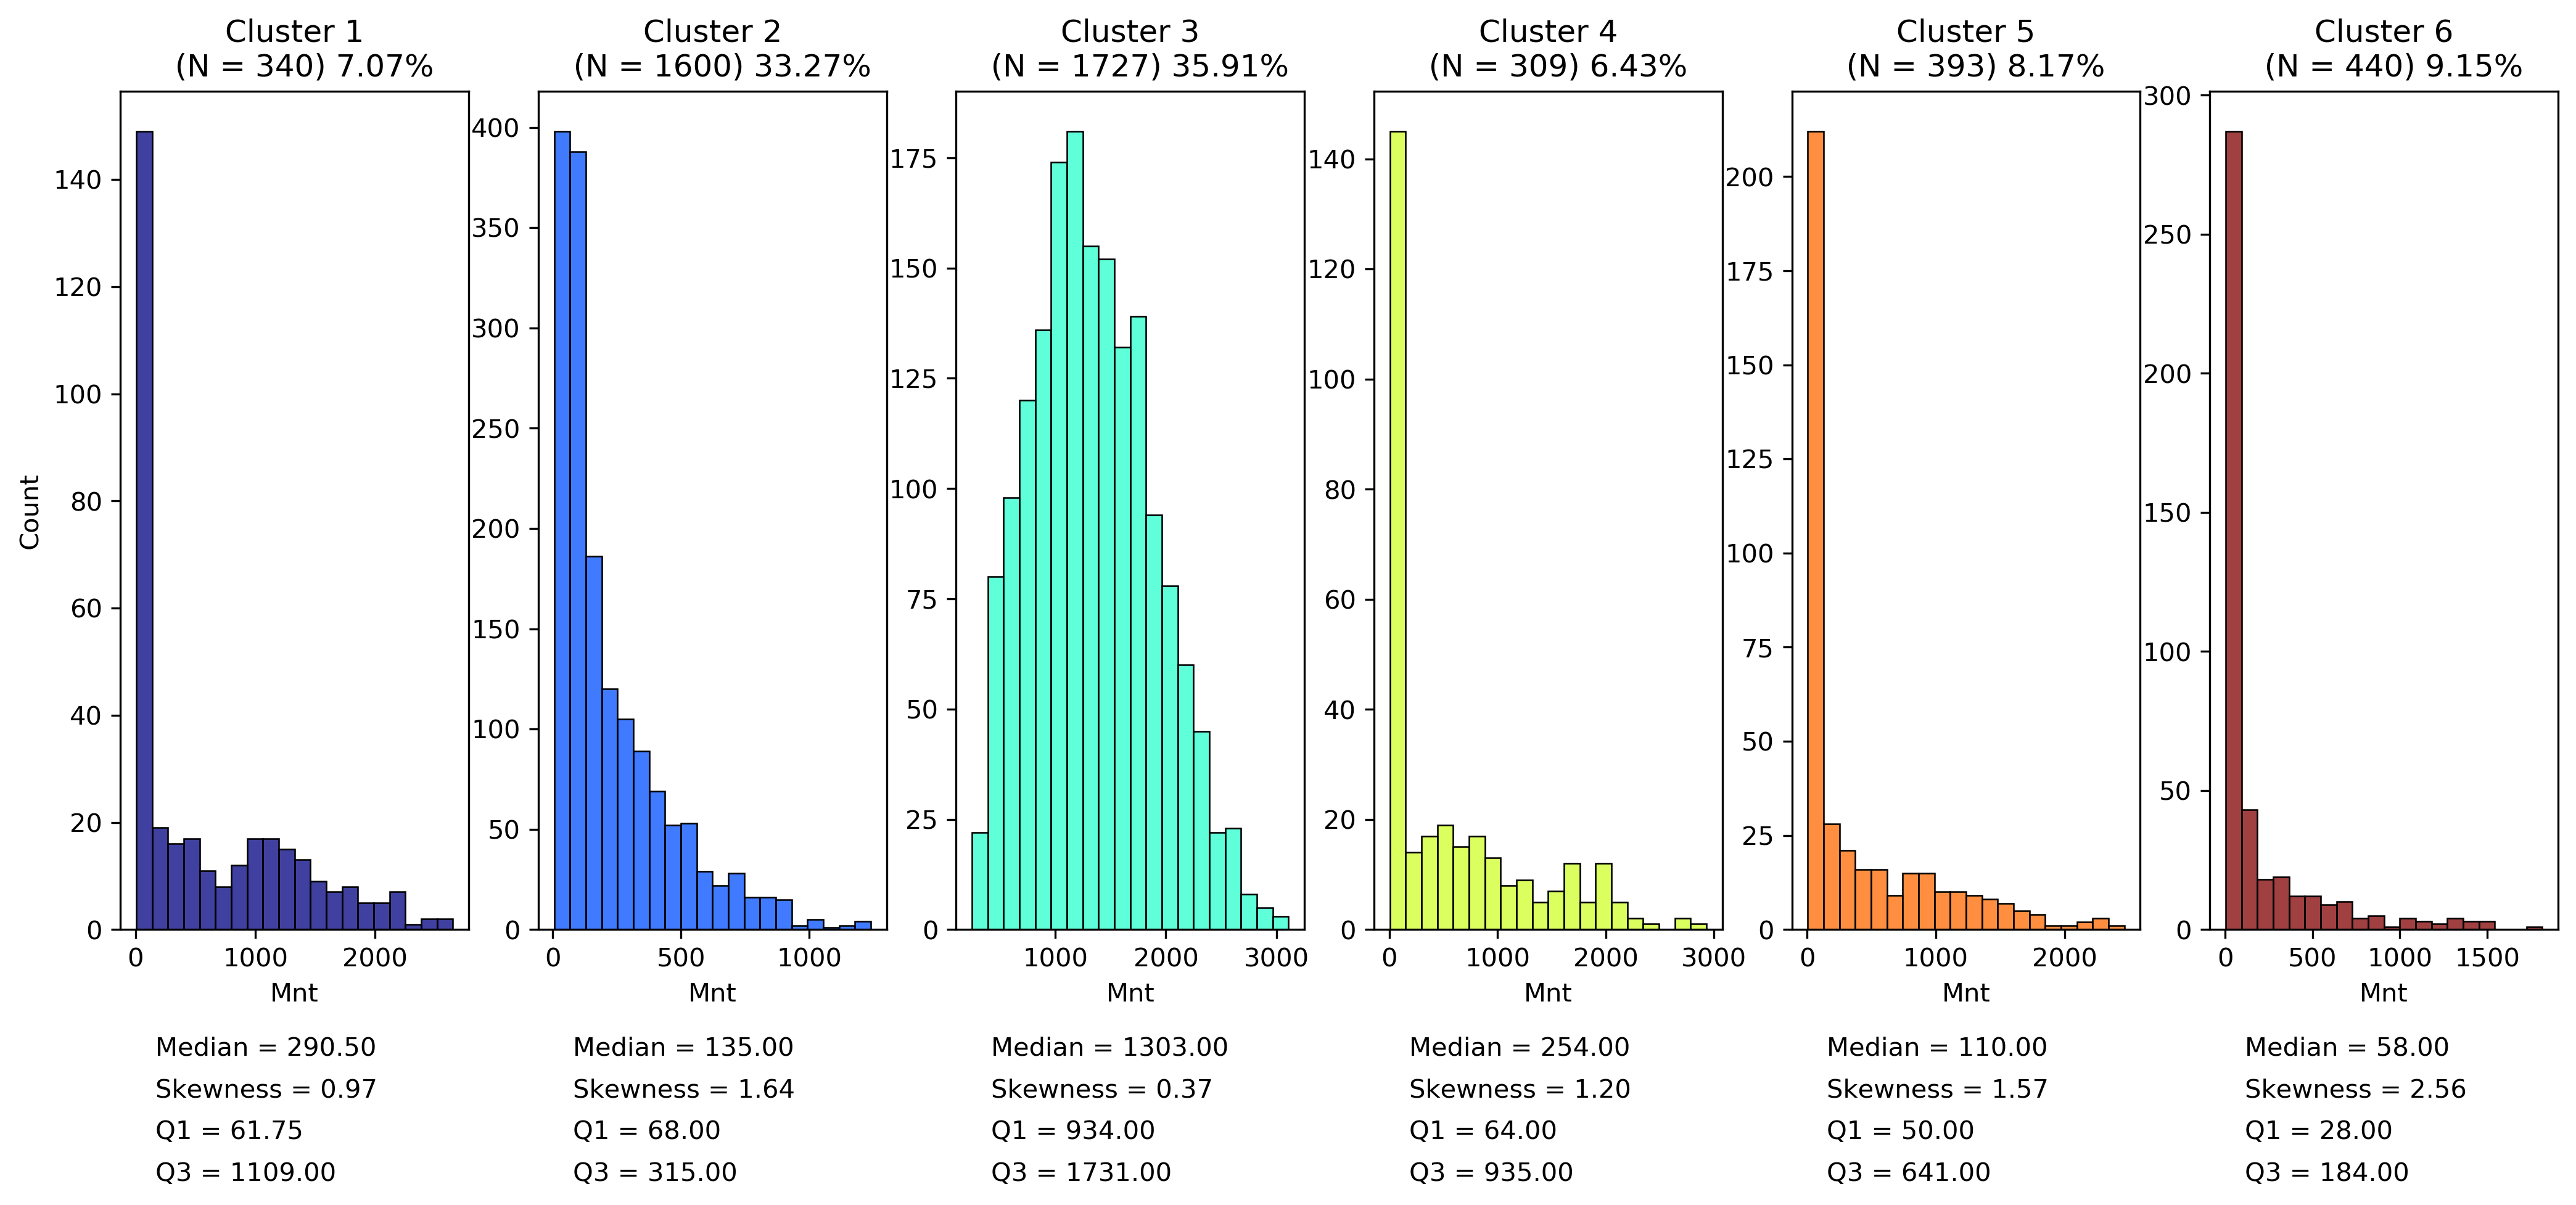

In [381]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))

for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['Mnt'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['Mnt'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    res = stats (df_treated[df_treated['product_clusters'] == i]['Mnt'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,6):
    
        axes[i].set_ylabel('')  

plt.show()

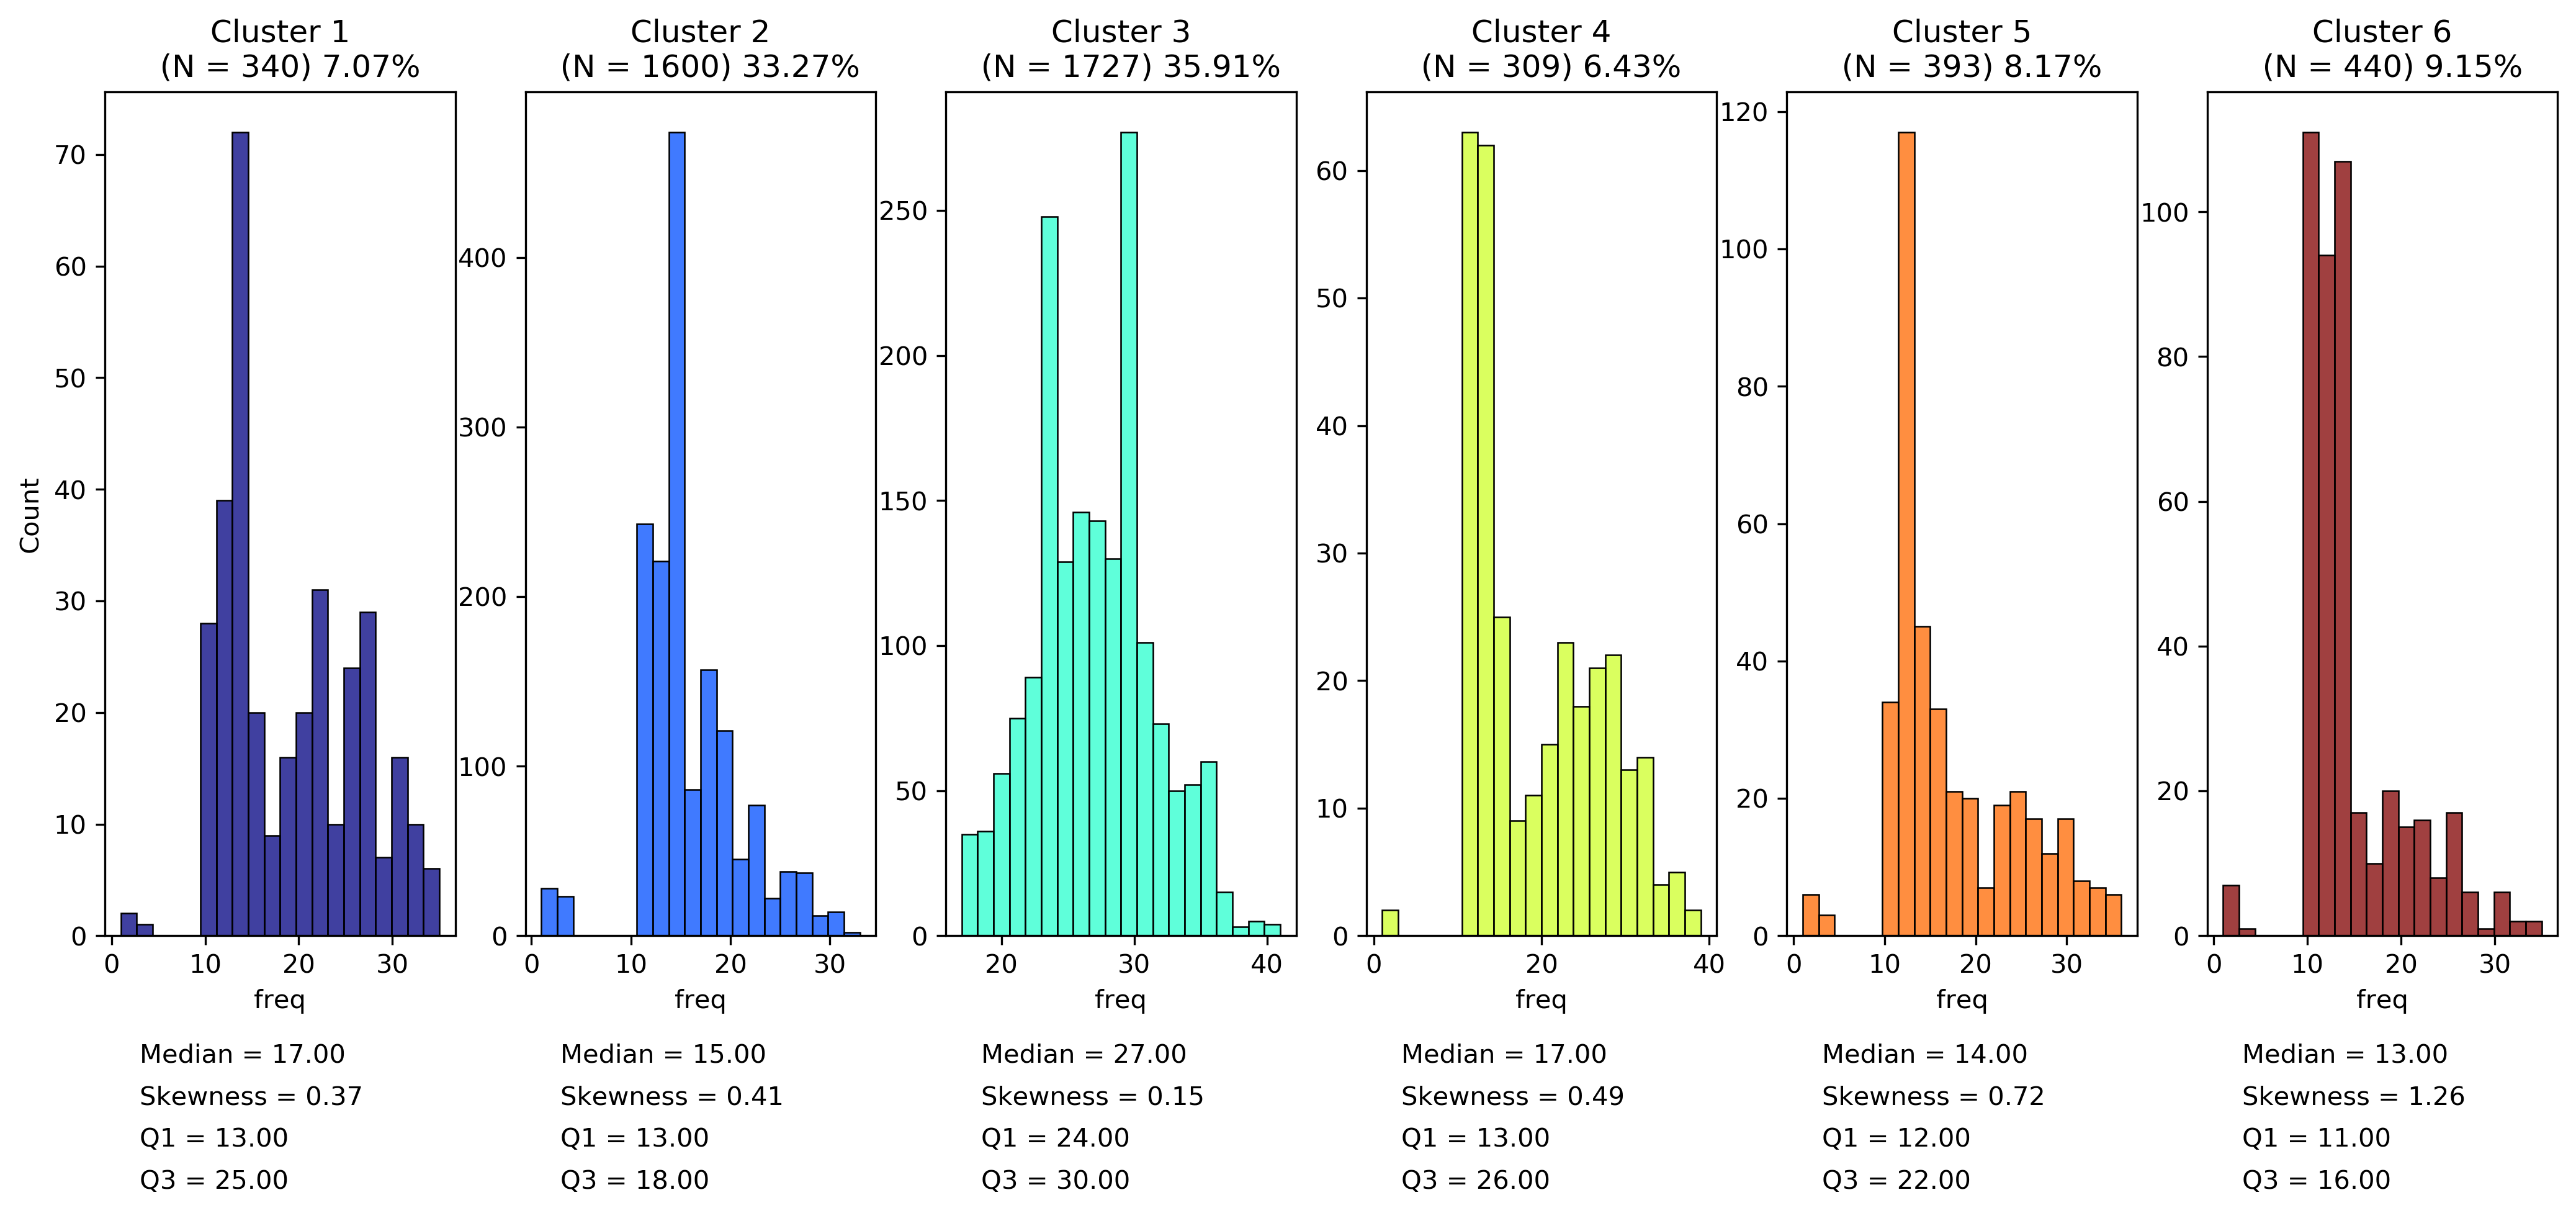

In [382]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))

for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['freq'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['freq'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
   
    res = stats (df_treated[df_treated['product_clusters'] == i]['freq'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,6):
    
        axes[i].set_ylabel('')  

plt.show()

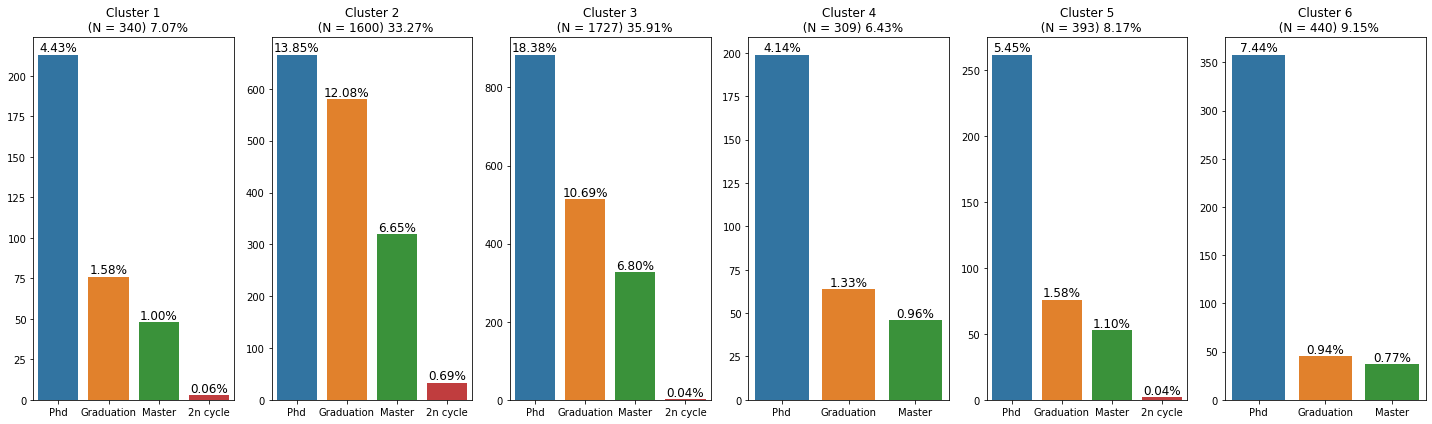

In [383]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 6))
for i in range (0,6):  
    values = df_treated[df_treated['product_clusters'] == i]['Education'].value_counts().keys().tolist()
    counts = df_treated[df_treated['product_clusters'] == i]['Education'].value_counts().tolist()
    
    size = df_treated[df_treated['product_clusters'] == i]['Education'].size
    percentage = round(size/Total*100,2)
    sns.barplot(x=values,y=counts,  ax = axes[i]).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    position = 0
    for value in counts:
            axes[i].text(position, value, '{:.2f}%'.format(value / Total * 100), color = 'black', ha = 'center', size = 'large' , va = 'bottom')

            position = position + 1
plt.tight_layout()

plt.show()




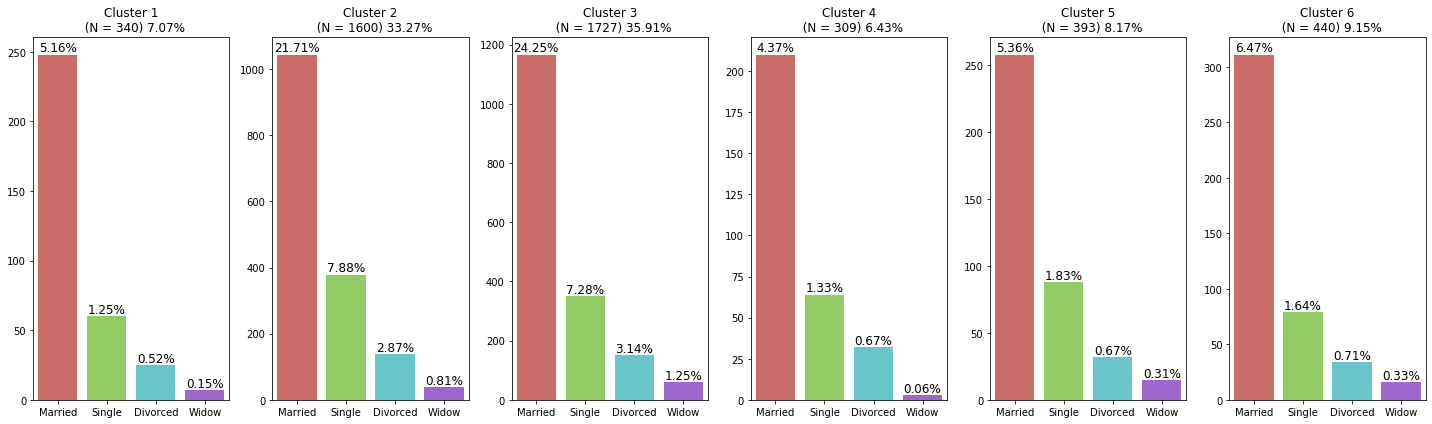

In [384]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 6))
for i in range (0,6):  
    values = df_treated[df_treated['product_clusters'] == i]['Marital_Status'].value_counts().keys().tolist()
    counts = df_treated[df_treated['product_clusters'] == i]['Marital_Status'].value_counts().tolist()
    size = df_treated[df_treated['product_clusters'] == i]['Marital_Status'].size
    percentage = round(size/Total*100,2)    
    sns.barplot(x=values,y=counts,  ax = axes[i] , palette = 'hls').set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    position = 0
    for value in counts:
            axes[i].text(position, value, '{:.2f}%'.format(value / Total * 100), color = 'black', ha = 'center', size = 'large' , va = 'bottom')

            position = position + 1
plt.tight_layout()

plt.show()


In [385]:
# df_normalized.describe().T

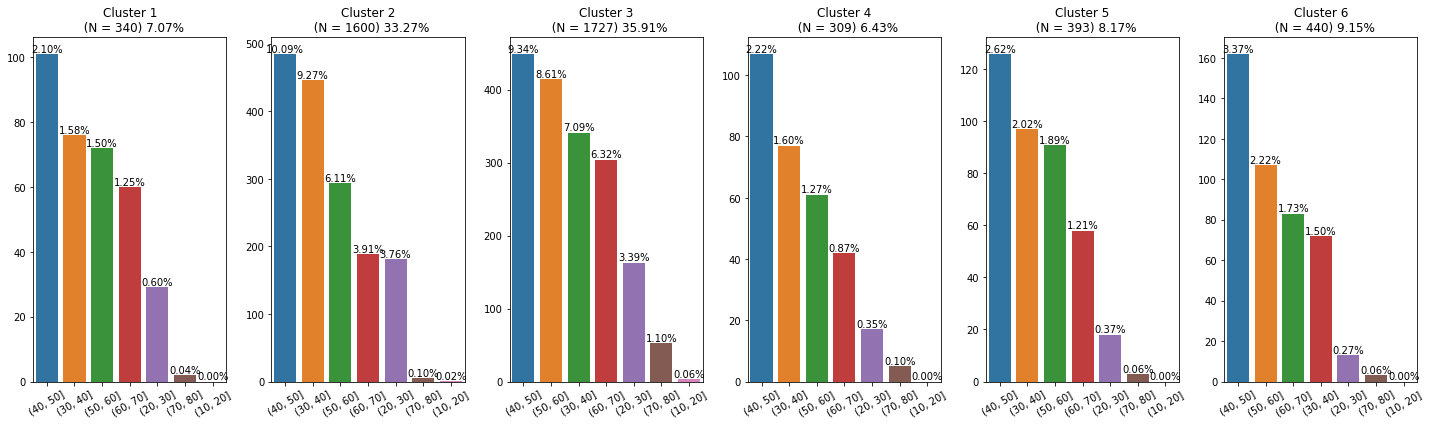

In [386]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 6))
for i in range (0,6):  
    values = df_treated[df_treated['product_clusters'] == i]['age_bins'].value_counts().keys().tolist()
    counts = df_treated[df_treated['product_clusters'] == i]['age_bins'].value_counts().tolist()
    size = df_treated[df_treated['product_clusters'] == i]['age_bins'].size
    percentage = round(size/Total*100,2) 
    
    sns.barplot(x=values,y=counts,  ax = axes[i]).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    
    position = 0
    for value in counts:
            axes[i].text(position, value, '{:.2f}%'.format(value / Total * 100), color = 'black', ha = 'center', size = 'medium' , va = 'bottom')
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30)
            position = position + 1
plt.tight_layout()

plt.show()



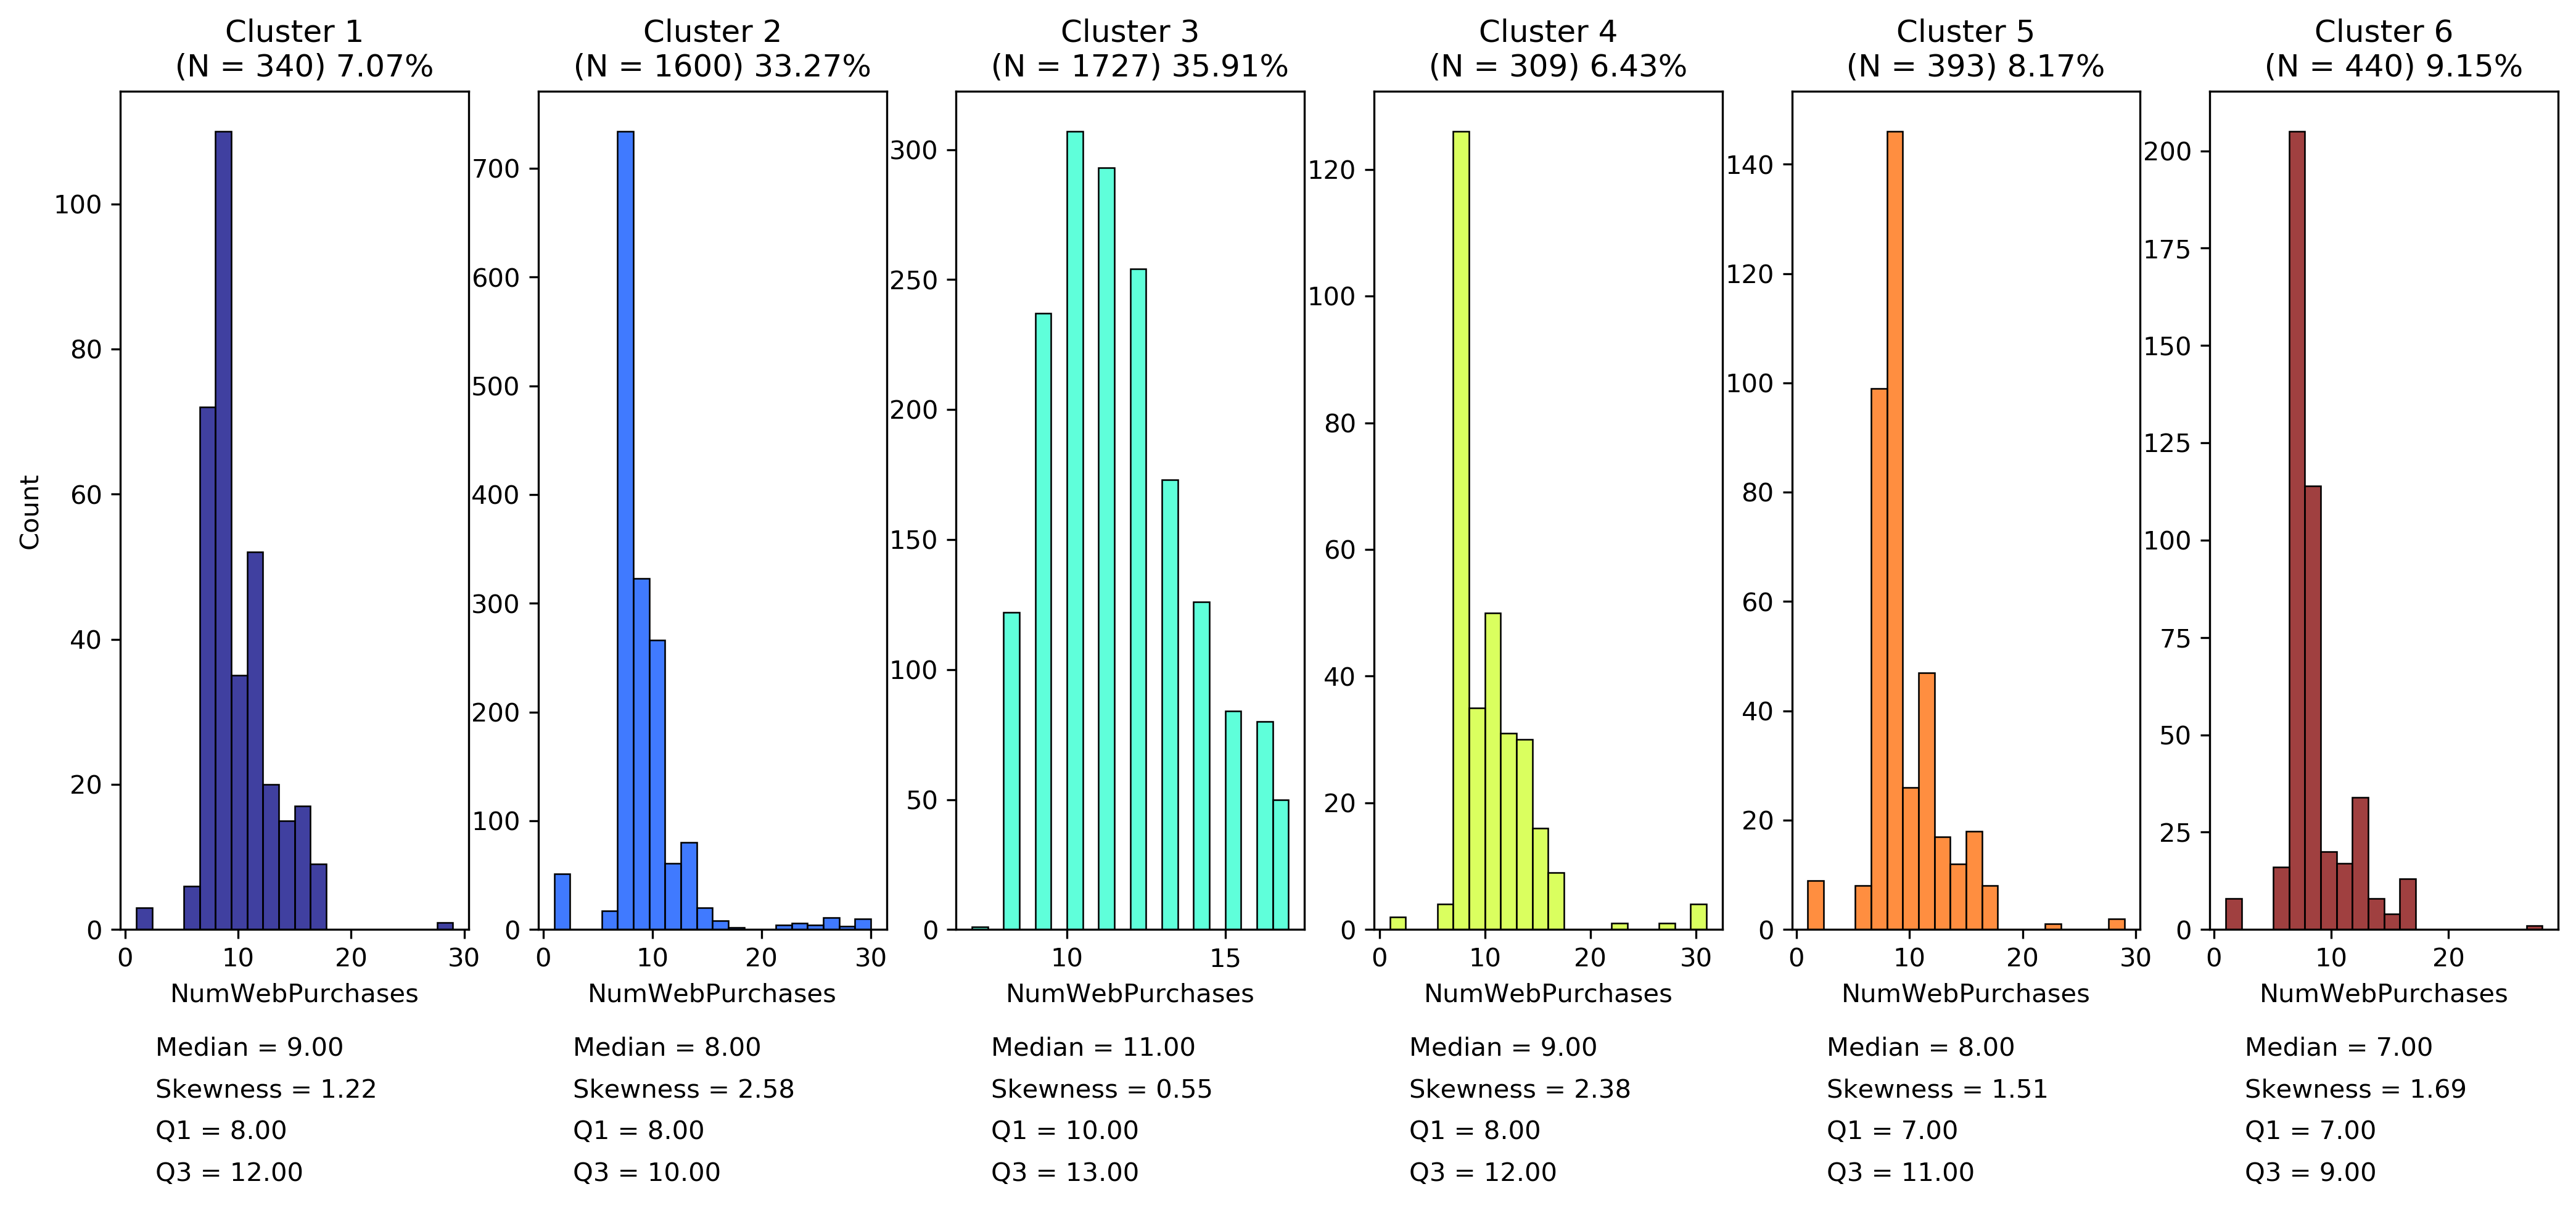

In [387]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))

for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['NumWebPurchases'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['NumWebPurchases'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
   
    res = stats (df_treated[df_treated['product_clusters'] == i]['NumWebPurchases'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,6):
    
        axes[i].set_ylabel('')  

plt.show()

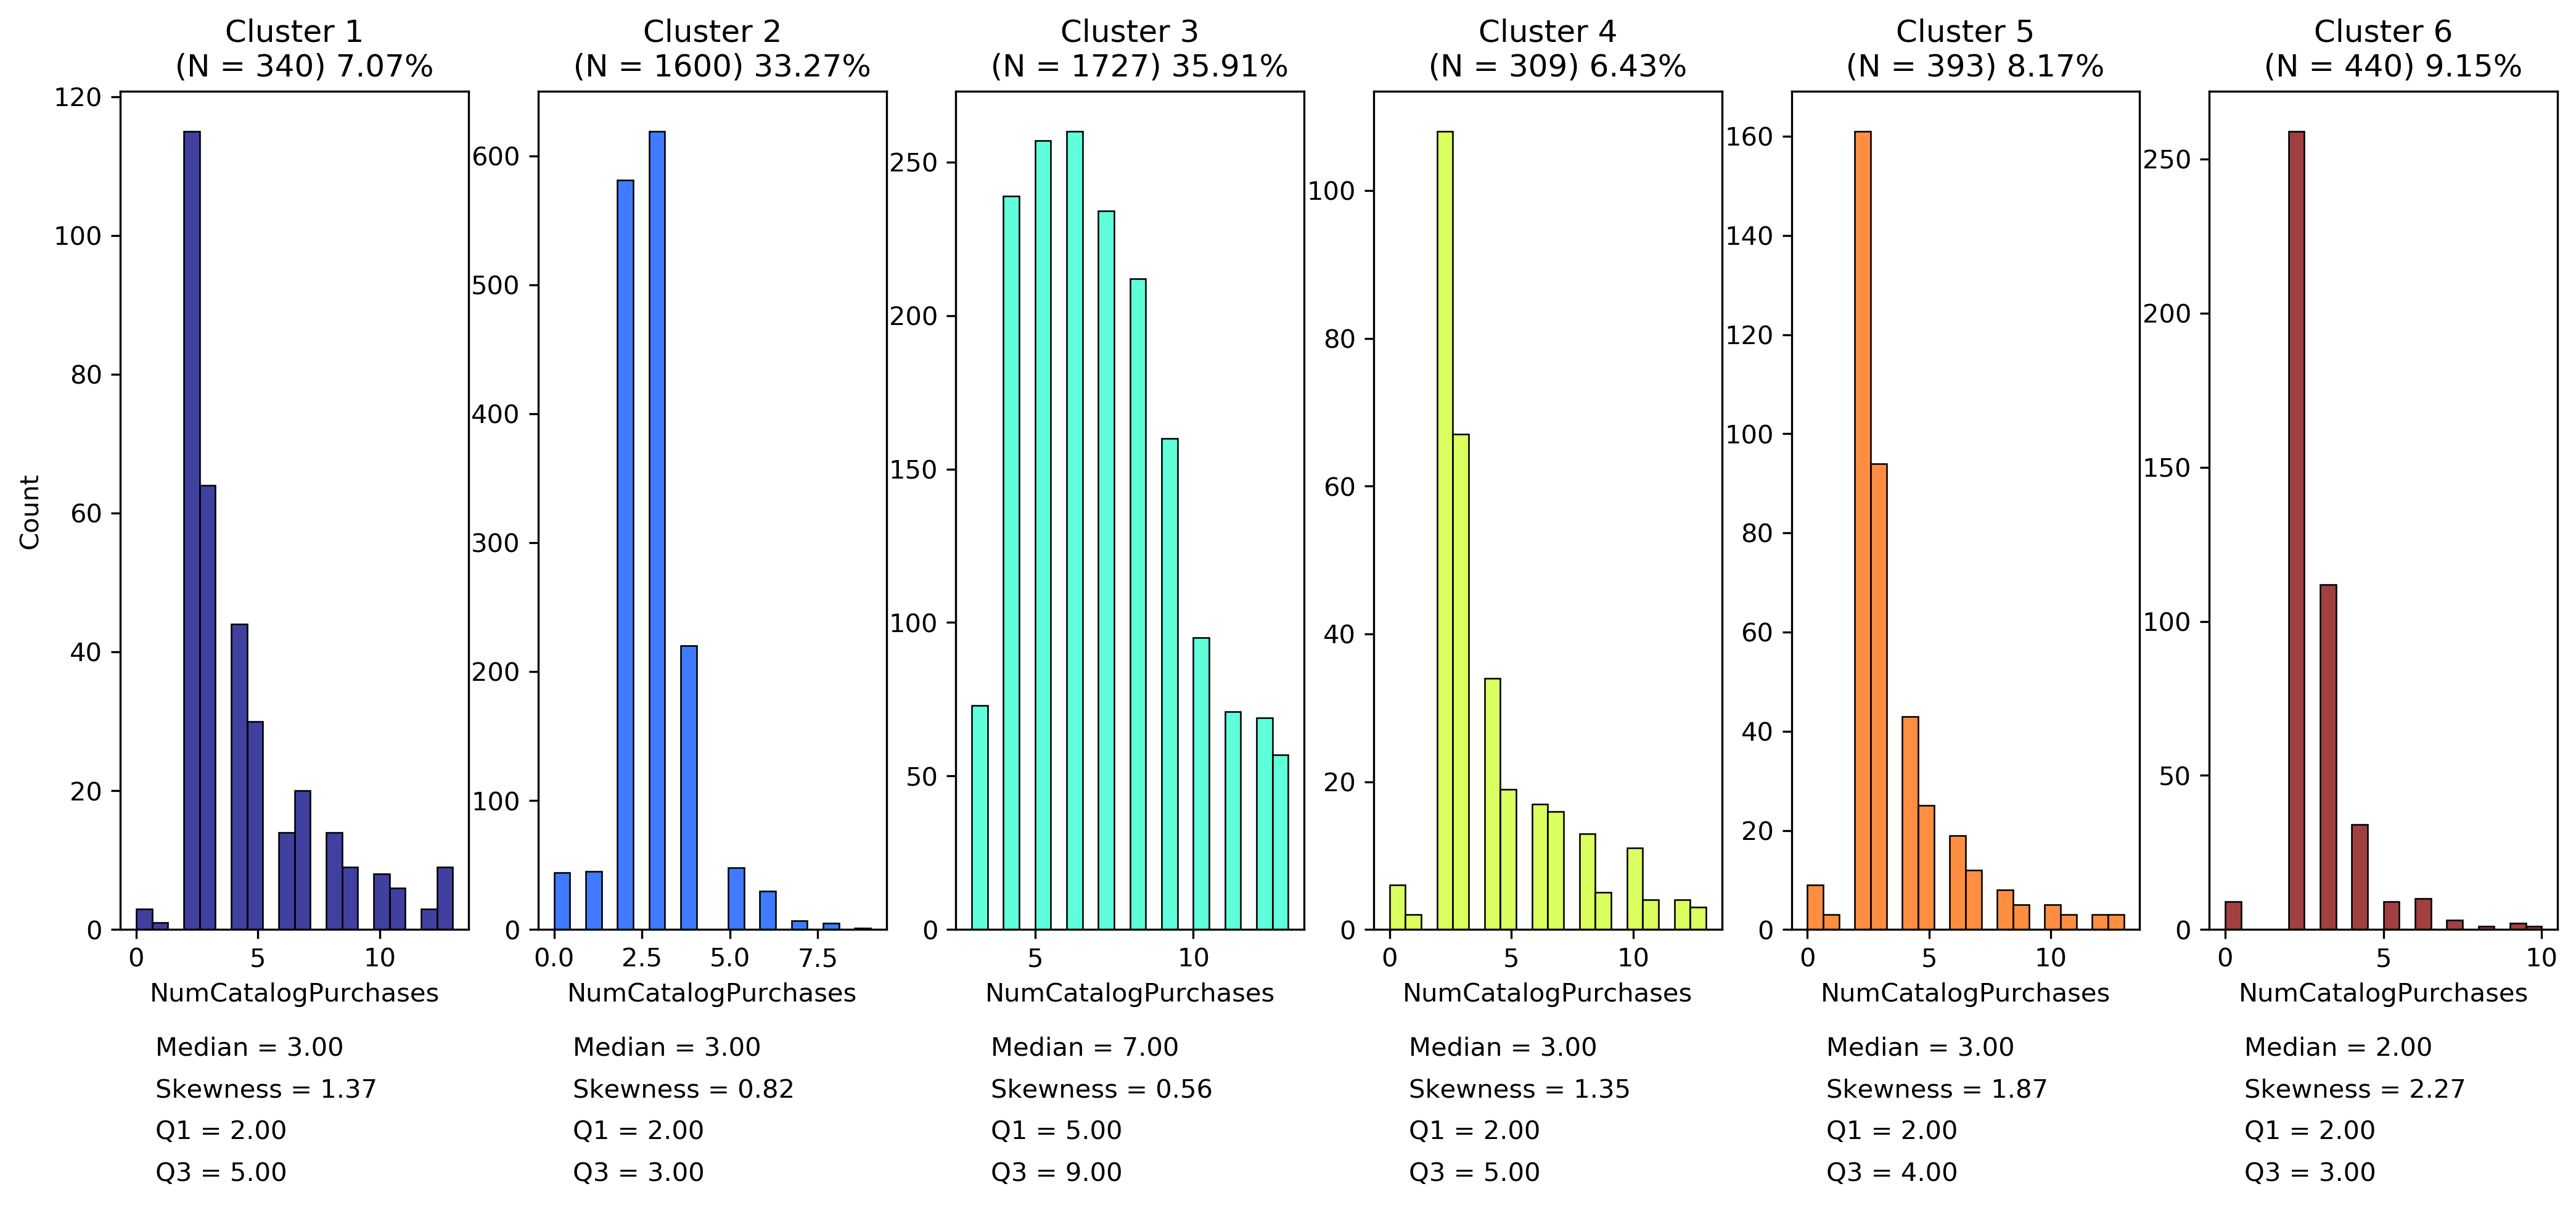

In [388]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))

for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['NumCatalogPurchases'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['NumCatalogPurchases'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
   
    res = stats (df_treated[df_treated['product_clusters'] == i]['NumCatalogPurchases'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,6):
    
        axes[i].set_ylabel('')  

plt.show()

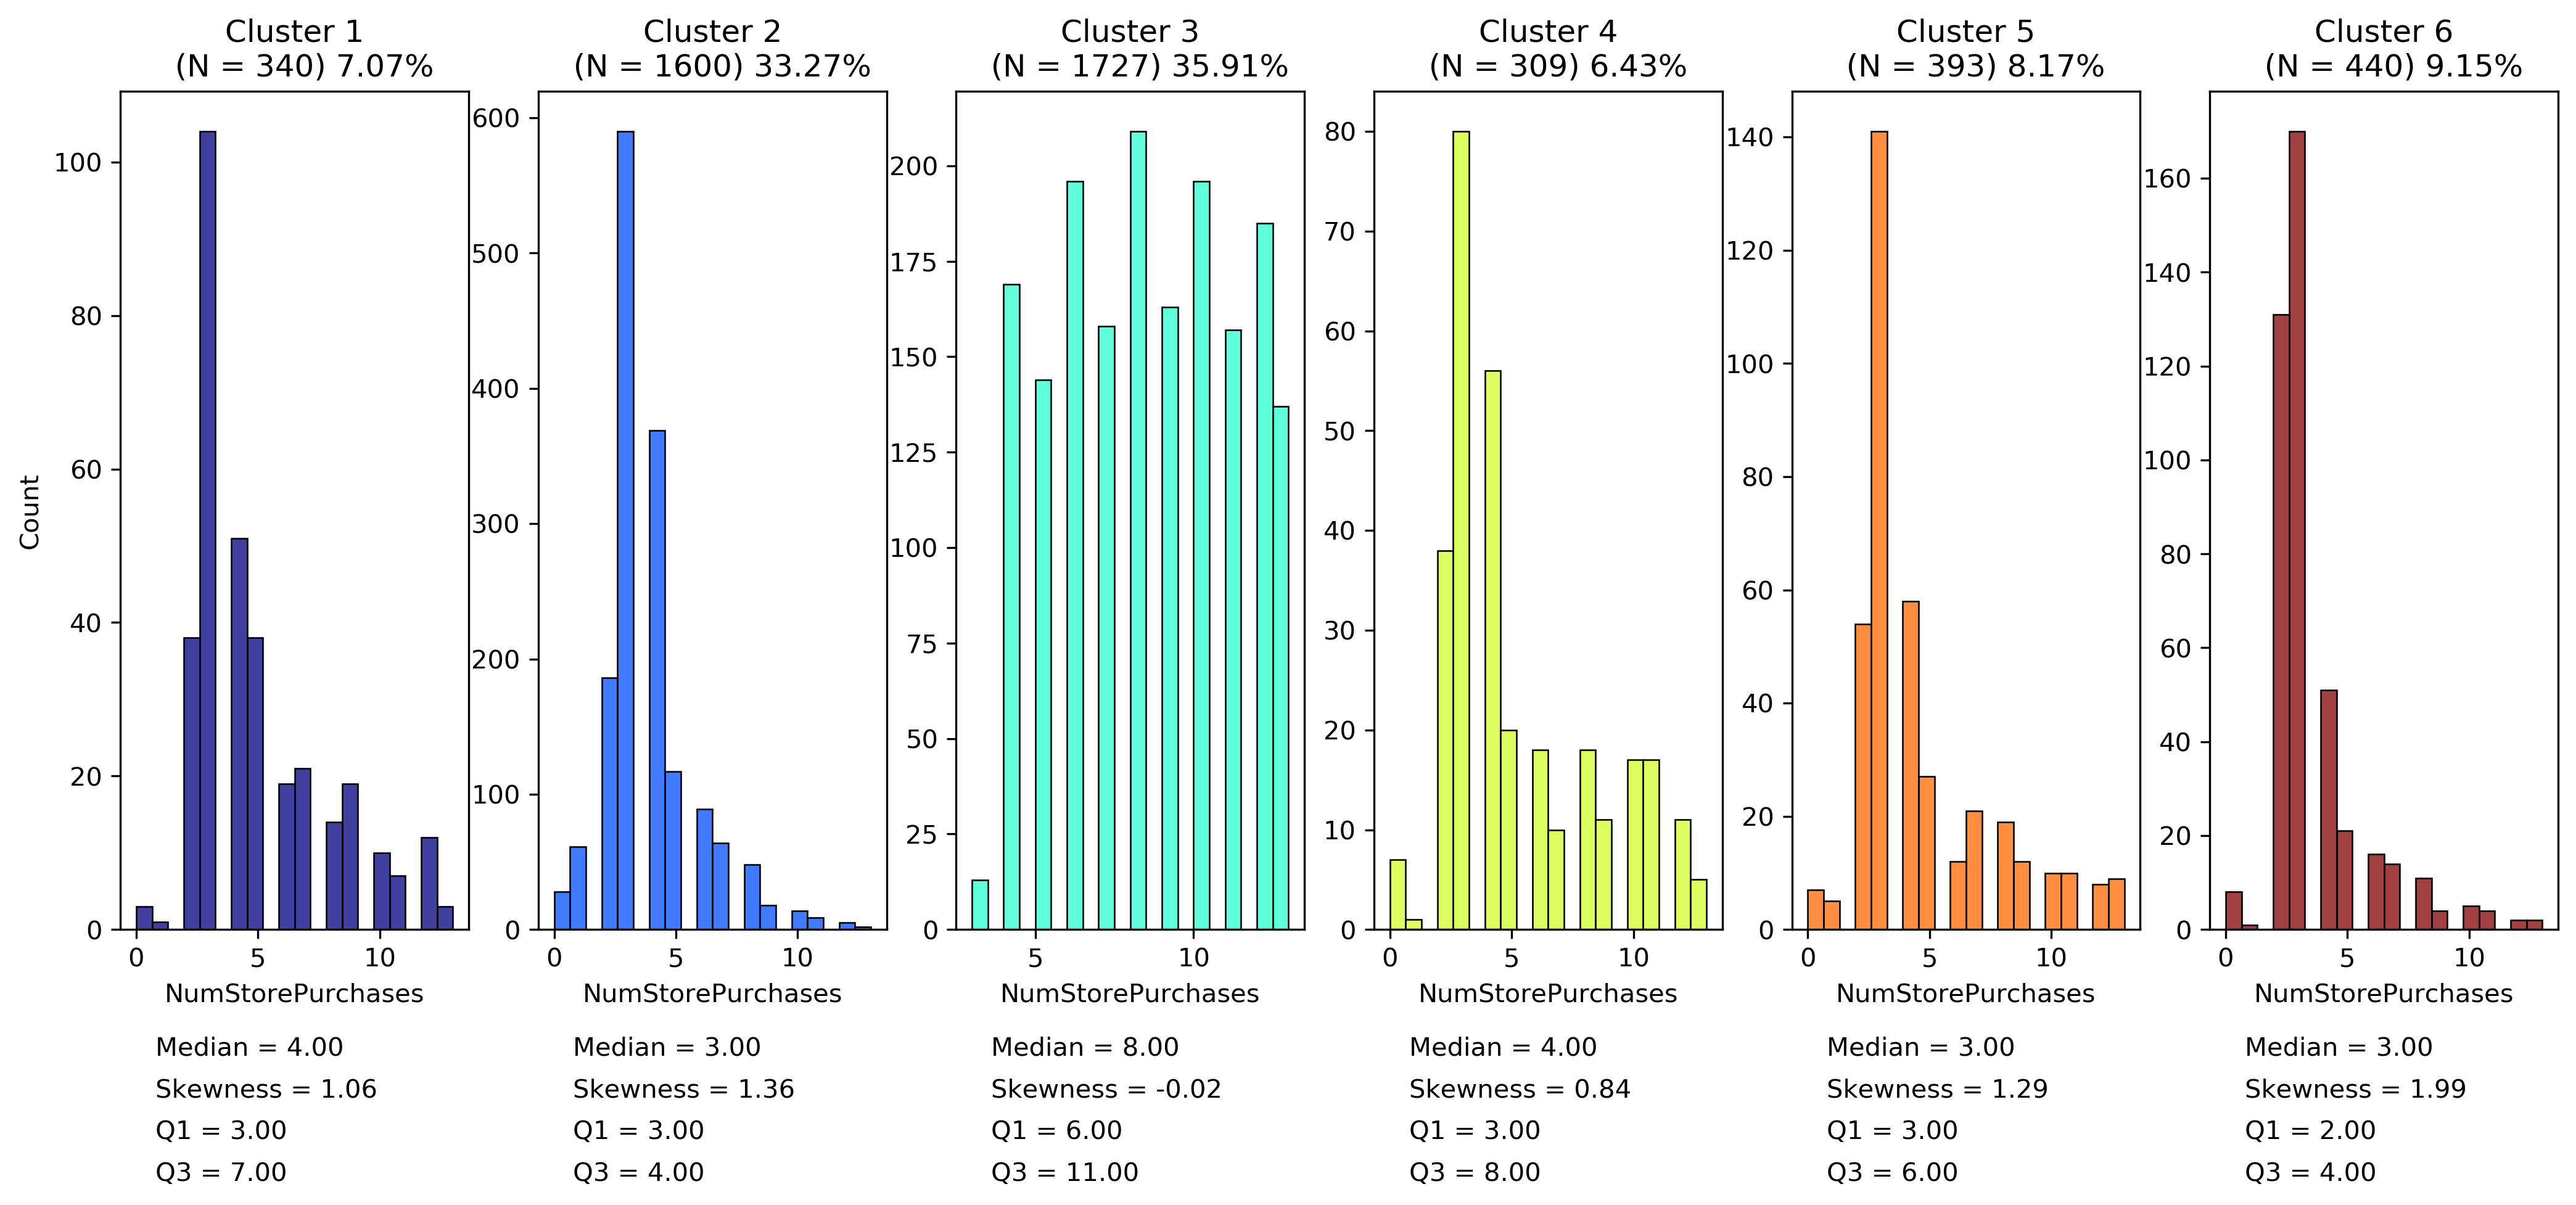

In [389]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))

for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['NumStorePurchases'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['NumStorePurchases'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
   
    res = stats (df_treated[df_treated['product_clusters'] == i]['NumStorePurchases'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,6):
    
        axes[i].set_ylabel('')  

plt.show()

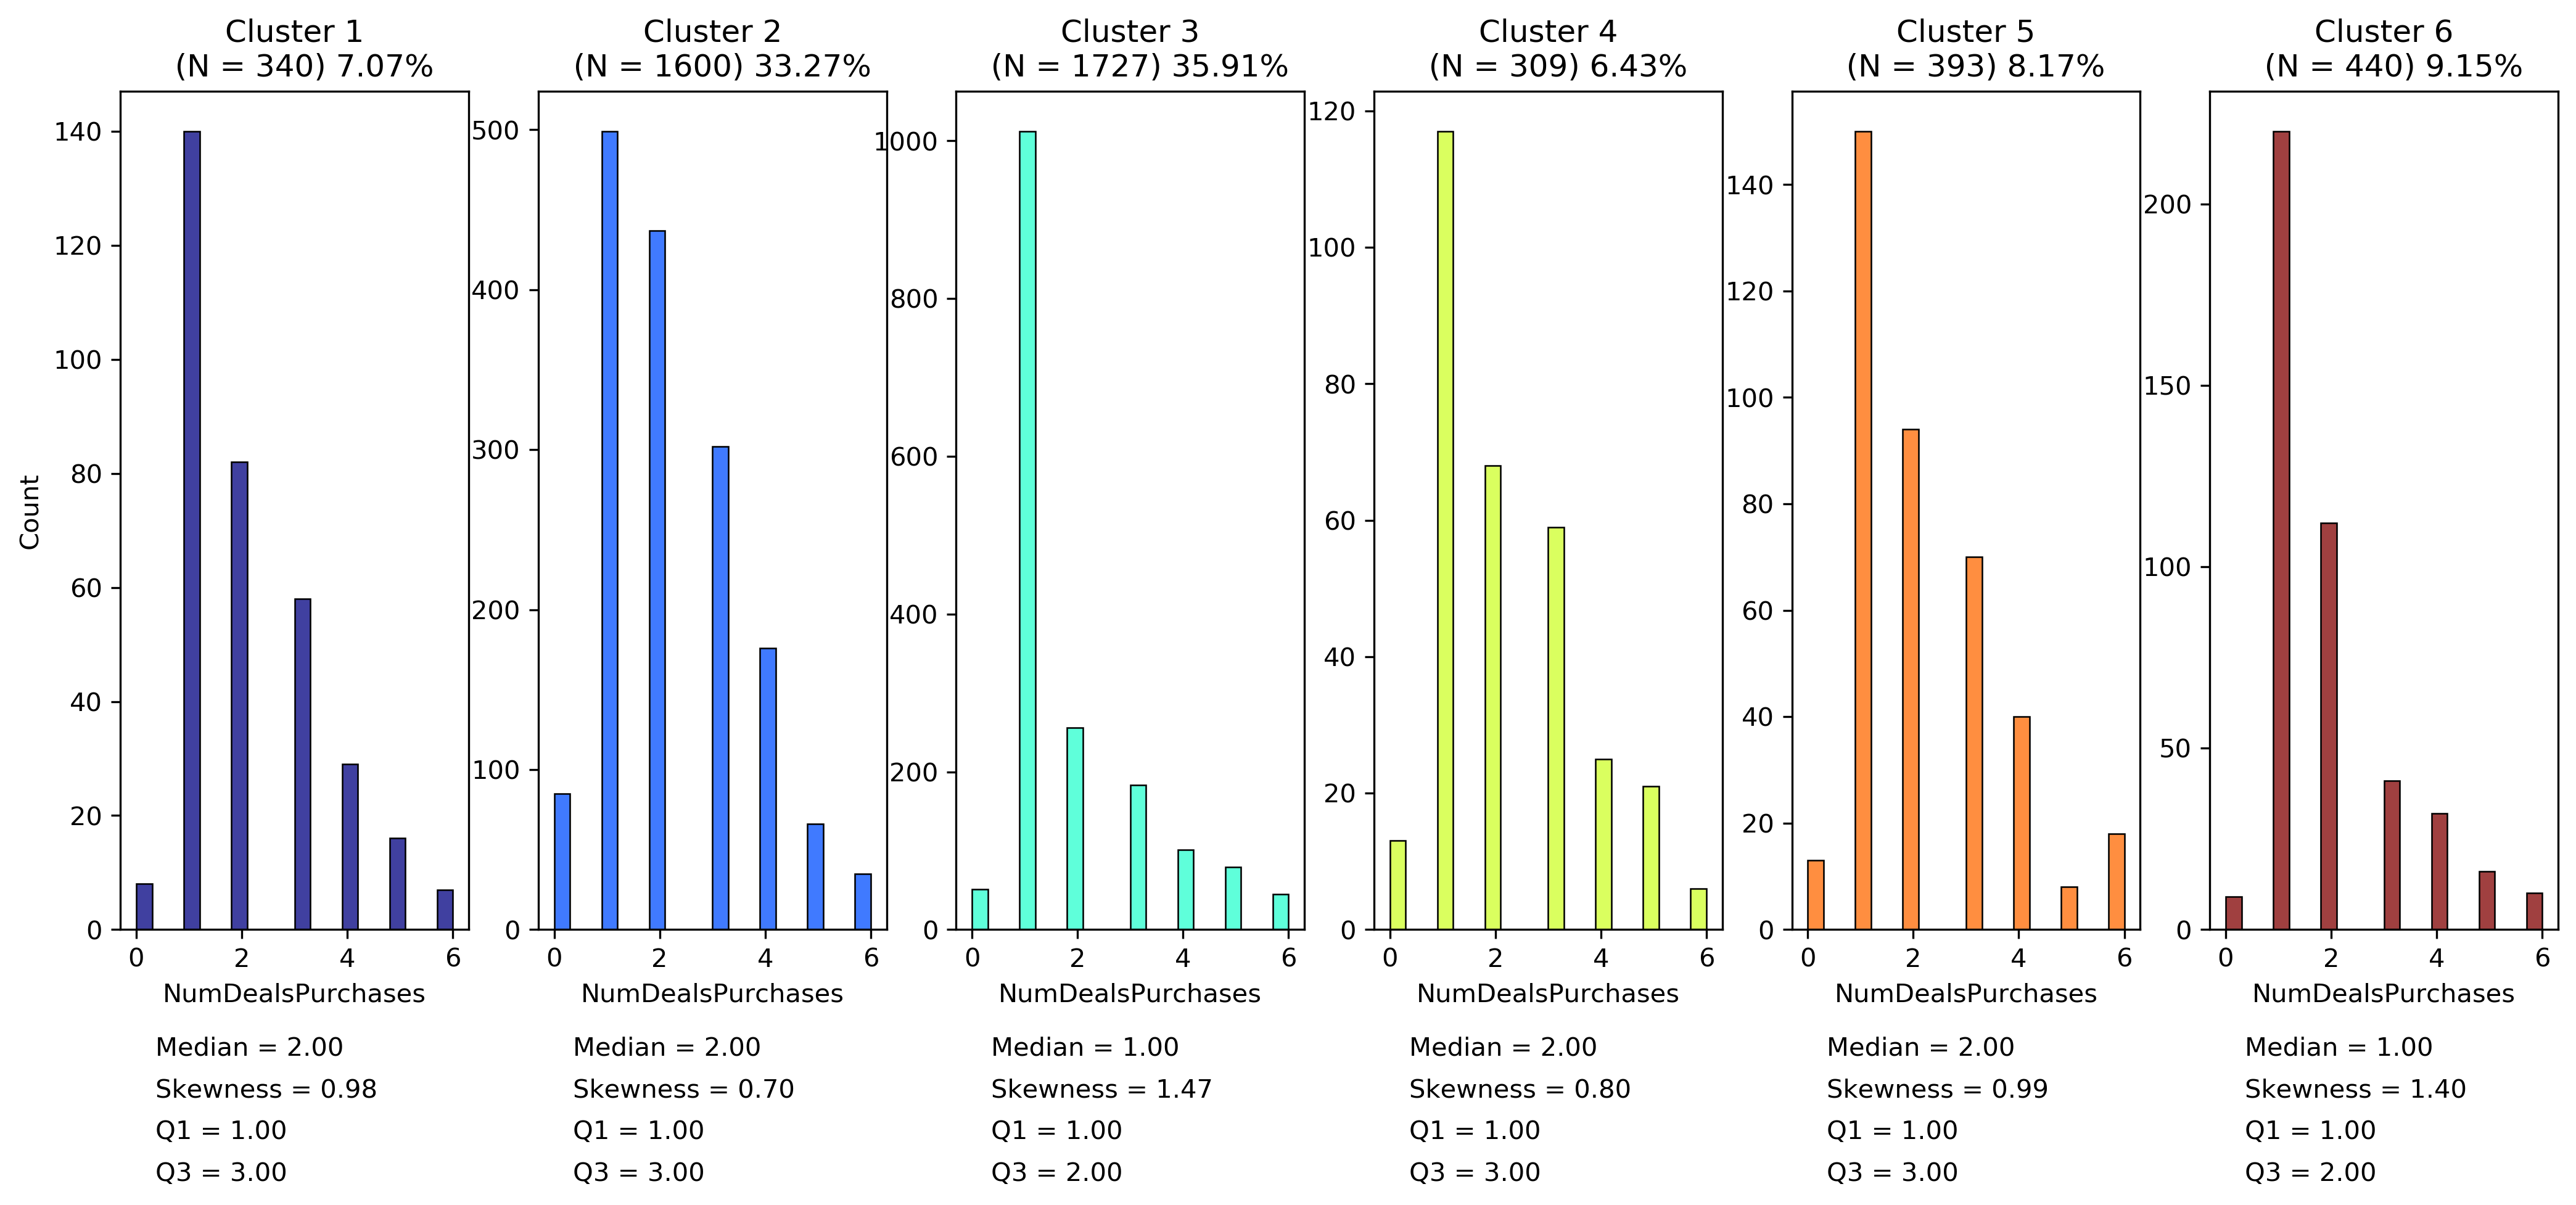

In [390]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,6)))

for i in range (0,6):  
    
    size = df_treated[df_treated['product_clusters'] == i]['NumDealsPurchases'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['product_clusters'] == i]['NumDealsPurchases'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
   
    res = stats (df_treated[df_treated['product_clusters'] == i]['NumDealsPurchases'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,6):
    
        axes[i].set_ylabel('')  

plt.show()

<a class="anchor" id="key_insights2"></a>
### 4.1.2 key Insights

After data cleaning our data frame reamined with a total of 4809 rows (clients). In the first segmentation (product usage), 
a number of 6 cluster was used.
Two clusters contain more than 30 % of the costumers population, as the remained 4 clusters contain between 6 to 10 % of the costumers.

Cluster (N = 1727 ; 35.91 %) - **High value costumers** : It is the cluster with more costumers, and represents the costumers with higher income (median = 95076) that spends more money in the store (median =1294)  , and regardless of the product category;
                              
                               
Cluster (N = 1600 ; 33.27 %) - **Low budget costumers** : Also represents a large amount of the costumers, and corresponds to the costumers with less income (median = 49523) and that on majority only spend money on essential products (Groceries and house keeping).

Cluster (N = 309 ; 6.43 %) - **Non stationary and books** : 

Cluster (N = 393 ; 8.17 %) - **Non wellness and beauty** :

Cluster (N = 340 ; 7.07 %) - **Non eletronics** :

Cluster (N = 440 ; 9.15 %) - **Ocasionally essential costumers** : only buys products for the groceries and house keeping categories. Visit the store not very regularly (freq median = 14), the cluster that spends less in the store (median = 58). Differs from cluster (N = 1727 ; 35.91 %), eventough they have a higher income they spend less.


<a class="anchor" id="costumervalue"></a>
### 4.2.1 Costumer value segmentation (Recency vs Mnt vs Freq)

In [391]:
df_costumer_segmentation = df_normalized.copy()


In [392]:
df_costumer_segmentation_k_means = df_costumer_segmentation.filter(items=[ 'Recency',
                 'freq','Mnt']).copy()
df_costumer_segmentation_k_means.head(n = 5)


Recency  freq       Mnt
Card_ID                           
10003075  0.666667  0.70  0.470755
10003076  0.060606  0.50  0.584325
10003078  0.101010  0.75  0.381957
10003079  0.262626  0.85  0.507754
10003080  0.656566  0.35  0.026446

In [393]:
inertias_list = []

kmeans_kwargs = {
        "init": "random",
        "n_init": 40,
        "max_iter": 500,
        "random_state": 100,
    }

for k in range (1,15):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs, precompute_distances = True)

    kmeans.fit(df_costumer_segmentation_k_means)

    inertias_list.append(kmeans.inertia_)


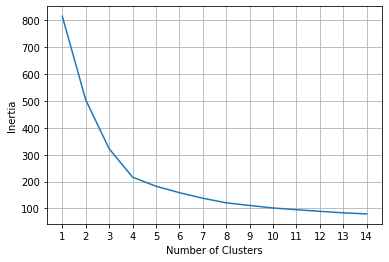

In [394]:
#plot number of clusters
plt.plot(range(1, 15), inertias_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(np.arange(1, 15, 1))
plt.grid()
plt.show()


In [395]:
n_clusters = 4
# Model training
model = KMeans(n_clusters = n_clusters, n_init = 40, max_iter = 2000, random_state=100)
model.fit(df_costumer_segmentation_k_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=4, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [396]:
df_costumer_segmentation_k_means['value_cluster'] = model.labels_
df_treated['value_cluster'] = model.labels_
df_costumer_segmentation_k_means.head(n=5)


Recency  freq       Mnt  value_cluster
Card_ID                                          
10003075  0.666667  0.70  0.470755              1
10003076  0.060606  0.50  0.584325              2
10003078  0.101010  0.75  0.381957              2
10003079  0.262626  0.85  0.507754              2
10003080  0.656566  0.35  0.026446              3

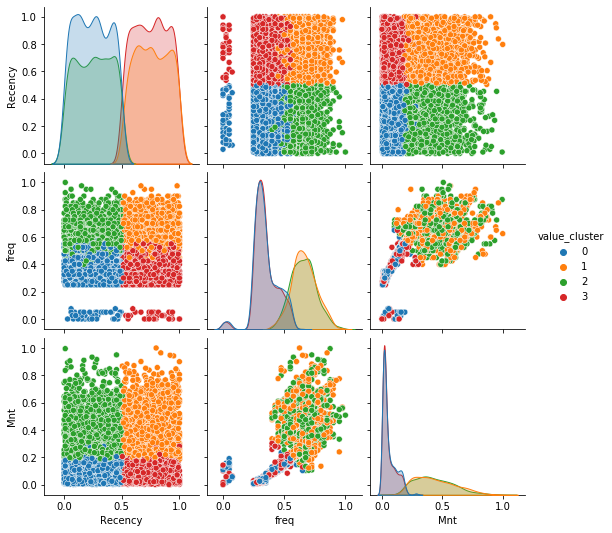

In [397]:
variaveis = ['Recency',
                 'freq','Mnt'] 

ax = sns.pairplot(df_costumer_segmentation_k_means, vars = variaveis,hue='value_cluster', palette = "tab10" , diag_kind = 'kde')

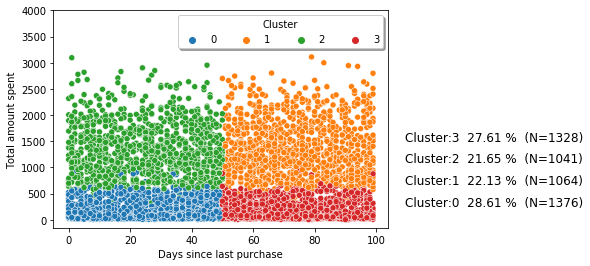

In [398]:

fig, ax = plt.subplots()
ax = sns.scatterplot(x = 'Recency', y= 'Mnt', data = df_treated ,hue = 'value_cluster', palette = 'tab10')
plt.xlabel("Days since last purchase")
plt.ylabel("Total amount spent")


plt.legend(shadow=True, fancybox=True, ncol = 5, title="Cluster")
plt.ylim(top=4000)

for i in range (0,4):  
    size = df_treated[df_treated['value_cluster'] == i]['Recency'].size
    percentage = round(size/Total*100,2)  
    
    ax.text(1.05, 0.1+(i-0.9*i), 'Cluster:' + str(i) + '  '+ str(percentage) + ' %  ' + '(N=' + str(size) + ')', transform=ax.transAxes, fontsize=12)

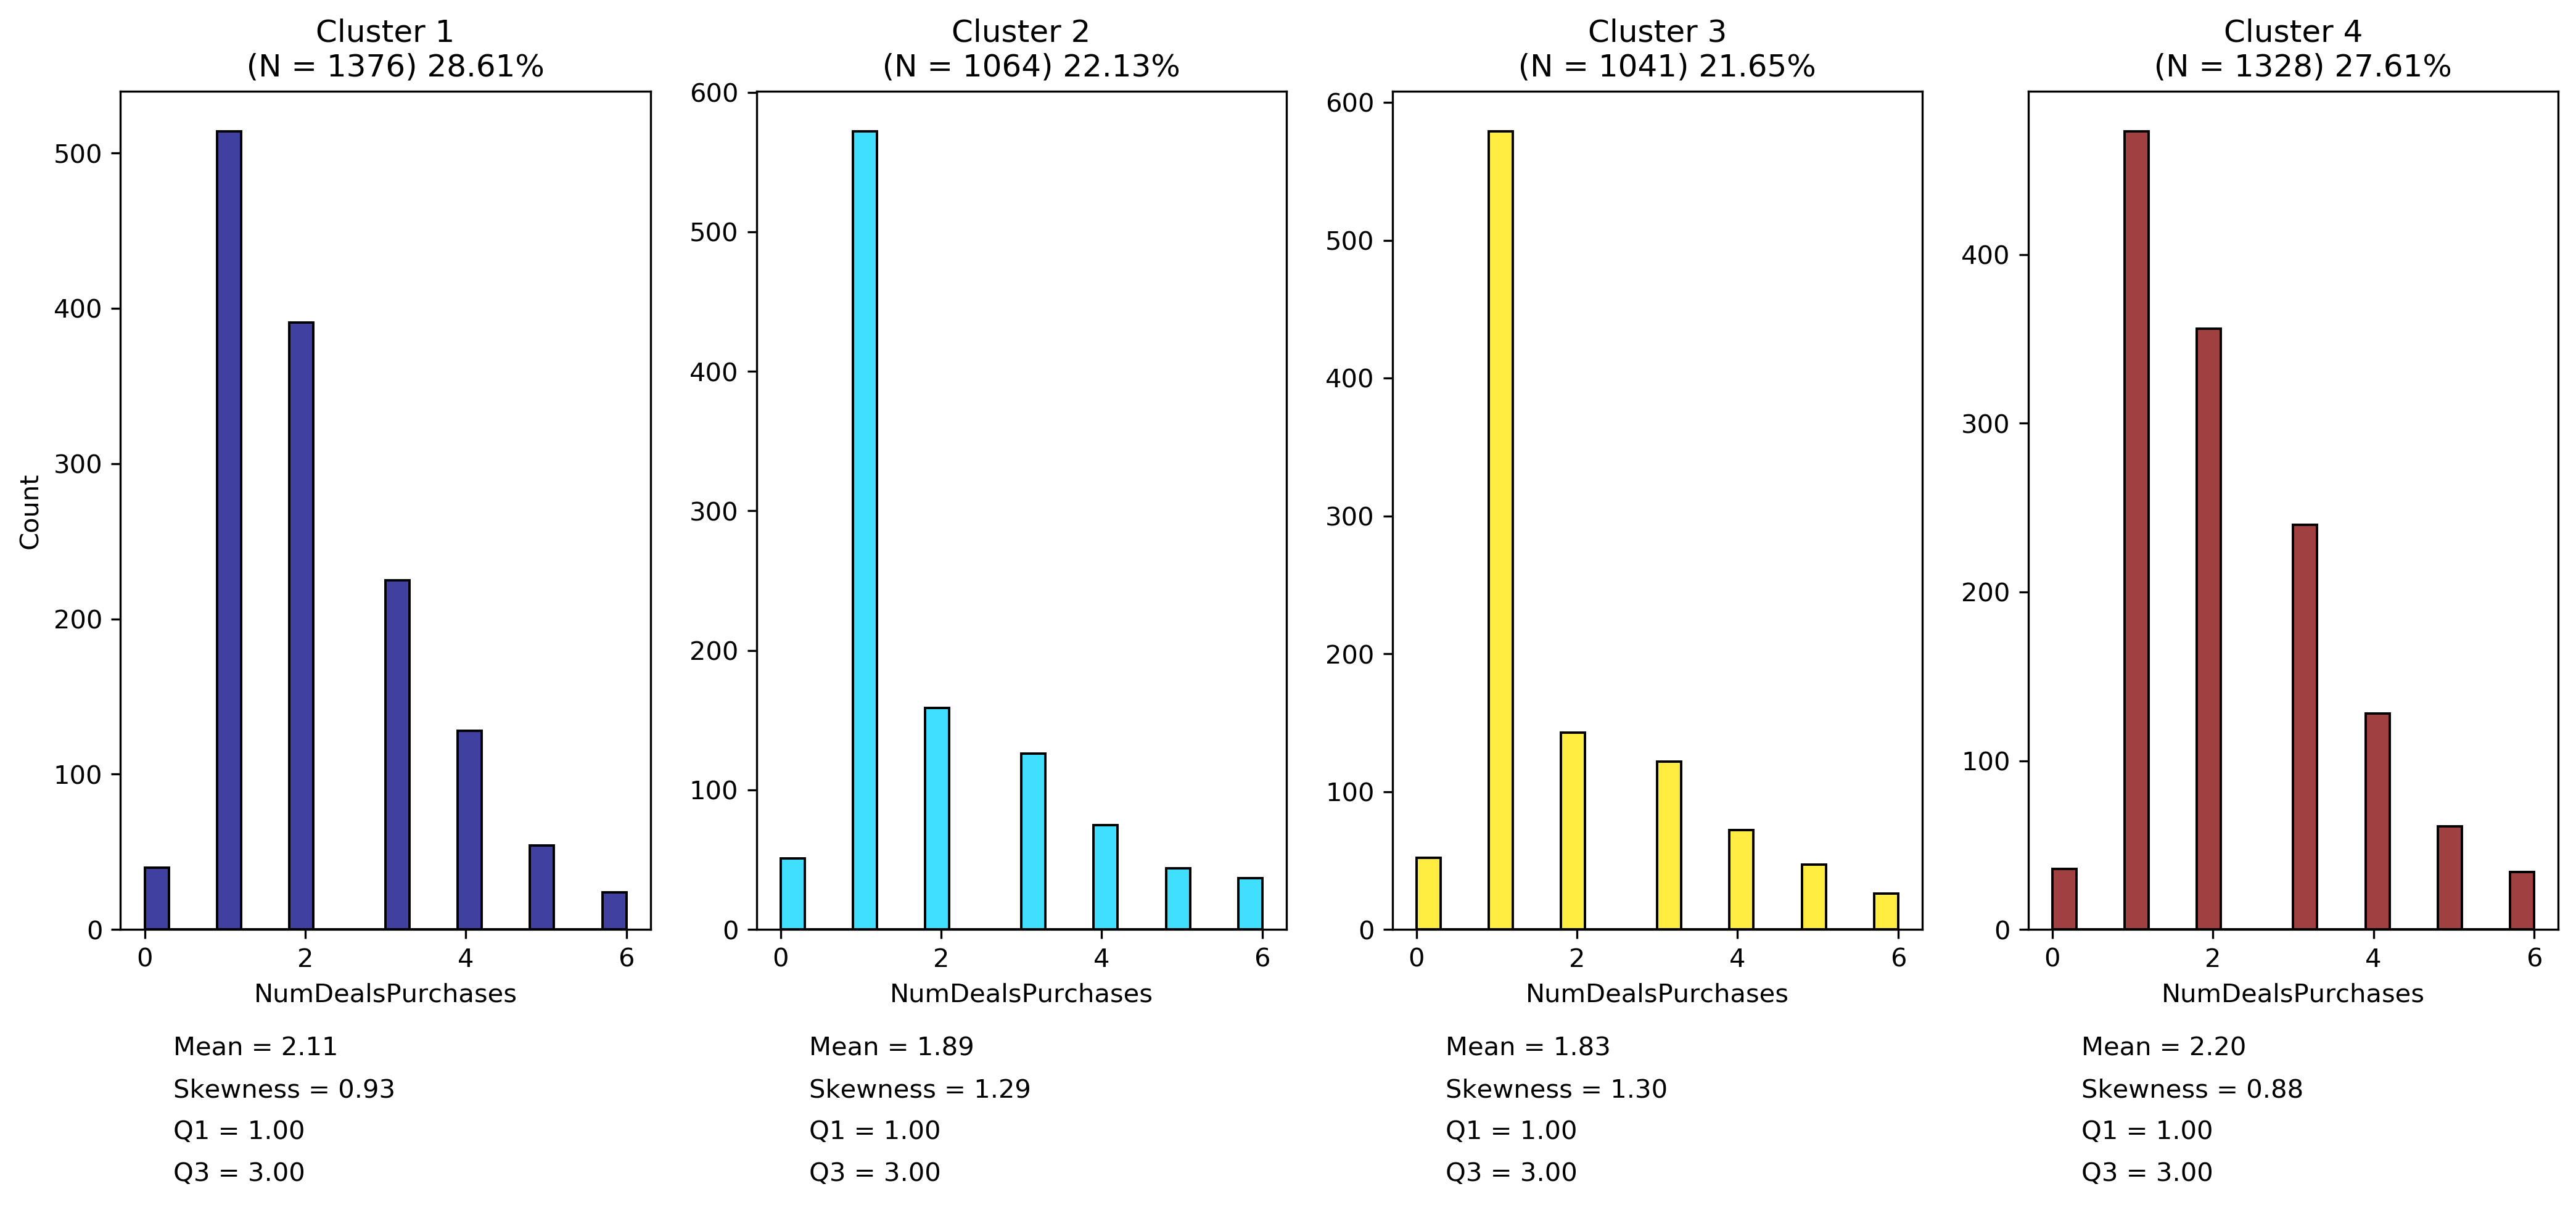

In [399]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,4)))

for i in range (0,4):  
    
    size = df_treated[df_treated['value_cluster'] == i]['NumDealsPurchases'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['value_cluster'] == i]['NumDealsPurchases'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
   
    res = stats2 (df_treated[df_treated['value_cluster'] == i]['NumDealsPurchases'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Mean = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,4):
    
        axes[i].set_ylabel('')  

plt.show()

<a class="anchor" id="key_insights3"></a>
### 4.2.2 Key insights


- **Cluster of recent casual buyers (28.61 %, N = 1376)**<br>
Customers that have purchased recently, but don't spent a lot of money in the store.



- **Cluster of non-recent Premium buyers  (22.13 %, N = 1065)**<br>
Customers with high frequency and total amount spend, however they haven't made purchases in the store recently. 



- **Cluster of recent Premium buyers(21.65 %, N = 1041)**<br>
Cluster with the most valuable clients, the ones that buy frequently form the store and spend high amounts of money 



- **Cluster of non-recent casual buyers (27.61 %, N = 1328)**<br>
Cluster with the clients that have not purchased recently, nor spent a lot of money in the store.



<a class="anchor" id="campaign"></a>
### 4.3.1 Costumer segmentation by campaign acceptance 

In [400]:
df_costumer_segmentation = df_normalized.copy()
# df_costumer_segmentation.describe().T
# AcceptedCmp1

In [401]:
df_costumer_segmentation_k_means = df_costumer_segmentation.filter(items=['AcceptedCmp1',
                 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Mnt']).copy()
df_costumer_segmentation_k_means.head(n = 5)


AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Card_ID                                                            
10003075           0.0           1.0           0.0           0.0   
10003076           0.0           0.0           0.0           0.0   
10003078           0.0           0.0           0.0           0.0   
10003079           0.0           0.0           0.0           1.0   
10003080           1.0           0.0           0.0           0.0   

          AcceptedCmp5       Mnt  
Card_ID                           
10003075           0.0  0.470755  
10003076           0.0  0.584325  
10003078           0.0  0.381957  
10003079           0.0  0.507754  
10003080           0.0  0.026446

In [402]:
inertias_list = []

kmeans_kwargs = {
        "init": "random",
        "n_init": 40,
        "max_iter": 500,
        "random_state": 100,
    }

for k in range (1,15):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs, precompute_distances = True)

    kmeans.fit(df_costumer_segmentation_k_means)

    inertias_list.append(kmeans.inertia_)


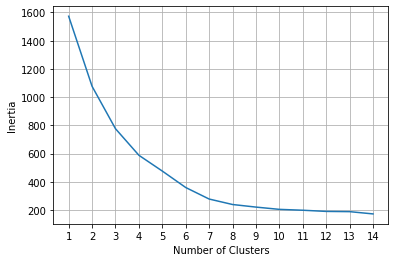

In [403]:
#plot number of clusters
plt.plot(range(1, 15), inertias_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(np.arange(1, 15, 1))
plt.grid()
plt.show()


In [404]:
n_clusters = 5
# Model training
model = KMeans(n_clusters = n_clusters, n_init = 40, max_iter = 2000, random_state=100)
model.fit(df_costumer_segmentation_k_means)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=5, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [405]:
df_costumer_segmentation_k_means['cluster'] = model.labels_
df_treated['cluster'] = model.labels_
df_costumer_segmentation_k_means.head(n=5)


AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
Card_ID                                                            
10003075           0.0           1.0           0.0           0.0   
10003076           0.0           0.0           0.0           0.0   
10003078           0.0           0.0           0.0           0.0   
10003079           0.0           0.0           0.0           1.0   
10003080           1.0           0.0           0.0           0.0   

          AcceptedCmp5       Mnt  cluster  
Card_ID                                    
10003075           0.0  0.470755        2  
10003076           0.0  0.584325        0  
10003078           0.0  0.381957        0  
10003079           0.0  0.507754        1  
10003080           0.0  0.026446        4

In [406]:
print('Amount of campaigns accepted ')
print(df_treated['Num_Cmp_acepted'].value_counts())


Amount of campaigns accepted 
0    3794
1     708
2     204
3      88
4      15
Name: Num_Cmp_acepted, dtype: int64


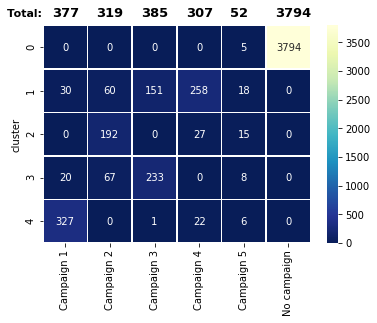

In [407]:
fig, ax = plt.subplots()
df_loc = []
df_loc = ( df_treated.loc[df_treated['AcceptedCmp1'] == 1, 'cluster'] )
df_loc = df_loc.value_counts().rename_axis('cluster').to_frame('Campaign 1')

df_loc2 = ( df_treated.loc[df_treated['AcceptedCmp2'] == 1, 'cluster'] )
df_loc2 = df_loc2.value_counts().rename_axis('cluster').to_frame('Campaign 2')

df_loc3 = ( df_treated.loc[df_treated['AcceptedCmp3'] == 1, 'cluster'] )
df_loc3 = df_loc3.value_counts().rename_axis('cluster').to_frame('Campaign 3')

df_loc4 = ( df_treated.loc[df_treated['AcceptedCmp4'] == 1, 'cluster'] )
df_loc4 = df_loc4.value_counts().rename_axis('cluster').to_frame('Campaign 4')

df_loc5 = ( df_treated.loc[df_treated['AcceptedCmp5'] == 1, 'cluster'] )

df_loc5 = df_loc5.value_counts().rename_axis('cluster').to_frame('Campaign 5')

df_loc6 = ( df_treated.loc[df_treated['Num_Cmp_acepted'] == 0, 'cluster'] )
df_loc6 = df_loc6.value_counts().rename_axis('cluster').to_frame('No campaign')

result = pd.concat([df_loc, df_loc2,df_loc3,df_loc4,df_loc5,df_loc6], axis=1)
result = result.fillna(0)

sns.heatmap(result, linewidths=.5, annot=True, cmap="YlGnBu_r" ,fmt='g')
som=pd.DataFrame(result.sum(), columns=['sum'])
ax.text(-0.8, -0.2, 'Total:',weight='semibold',fontsize = 11)
for i in range (0,6):  
       
    ax.text(i+0.2, -0.2, int(som.iloc[i]['sum']),weight='semibold',fontsize = 13)
    
# values = som['sum'].value_counts().keys().tolist()



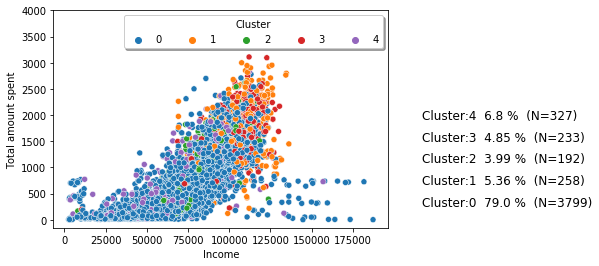

In [408]:
fig, ax = plt.subplots()

ax=sns.scatterplot(x = 'Income', y= 'Mnt', data = df_treated ,hue= 'cluster' ,palette ='tab10')
plt.xlabel("Income")
plt.ylabel("Total amount spent")
# plt.legend(loc='lower left', bbox_to_anchor=(0.6,0.5))
plt.legend(shadow=True, fancybox=True, ncol = 7, title="Cluster")
plt.ylim(top=4000)
for i in range (0,5):  
    size = df_treated[df_treated['cluster'] == i]['Recency'].size
    percentage = round(size/Total*100,2)  
    
    ax.text(1.1, 0.1+(i-0.9*i), 'Cluster:' + str(i) + '  '+ str(percentage) + ' %  ' + '(N=' + str(size) + ')', transform=ax.transAxes, fontsize=12)

plt.show()


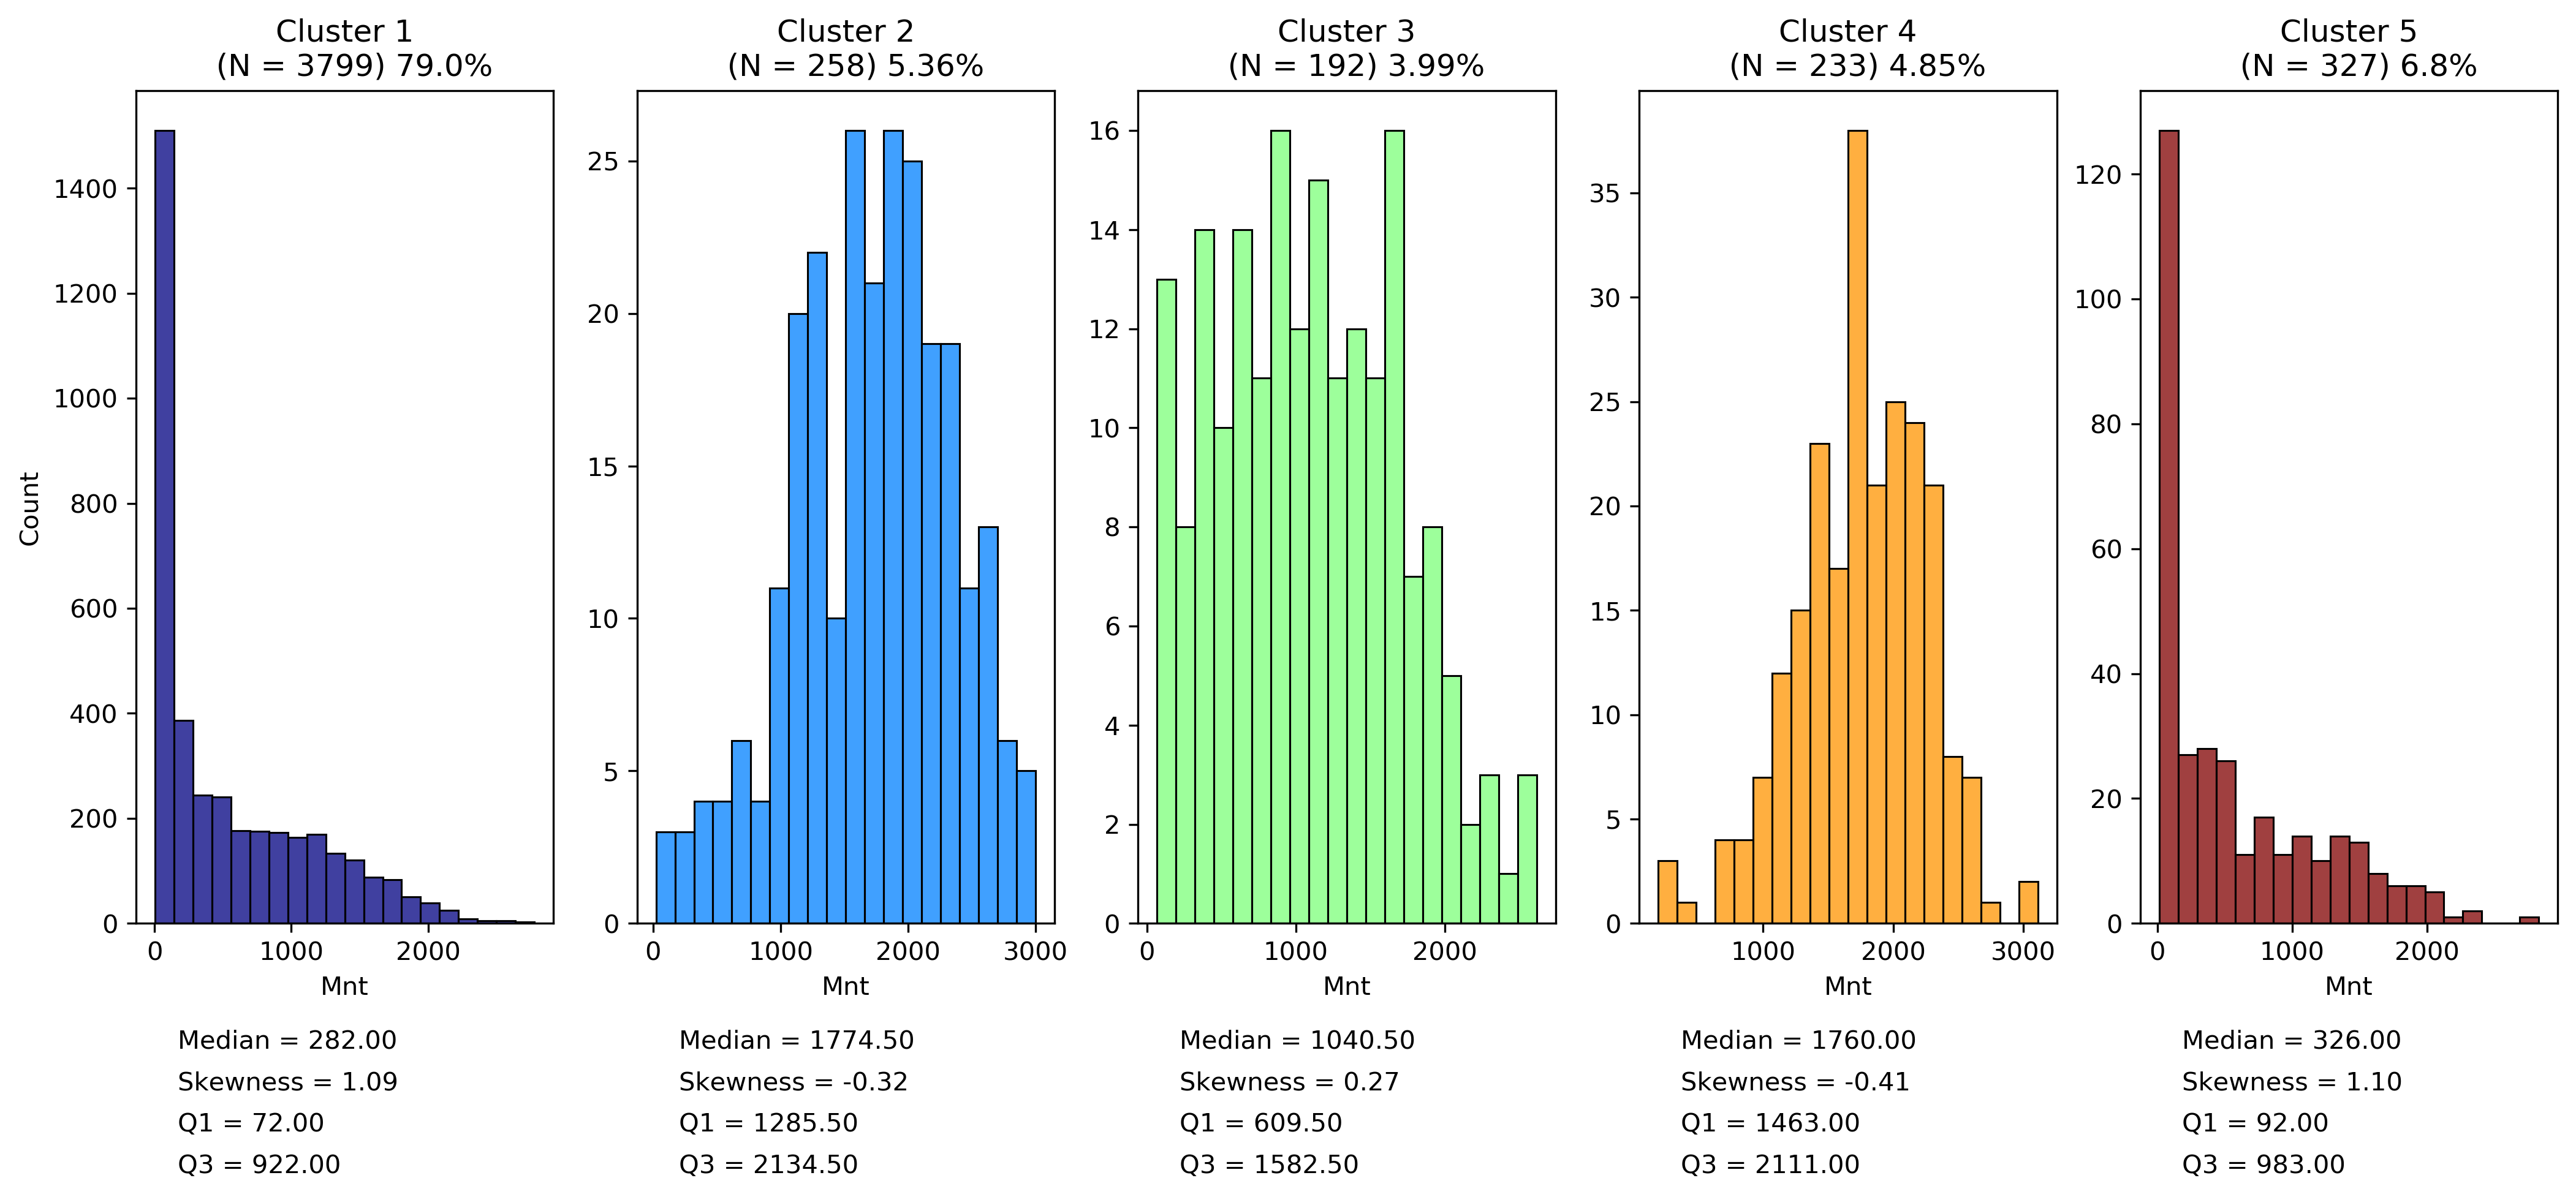

In [409]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,5)))

for i in range (0,5):  
    
    size = df_treated[df_treated['cluster'] == i]['Mnt'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['cluster'] == i]['Mnt'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('Cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    res = stats (df_treated[df_treated['cluster'] == i]['Mnt'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Median = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,5):
    
        axes[i].set_ylabel('')  

plt.show()

<a class="anchor" id="key_insights4"></a>
### 4.3.2 Key insights

- **Cluster (79 %, N = 3799)**<br>
Cluster with the clients that have not purchased recently and do not aprove any campaign


- **Cluster (5.36 %, N = 258)**<br>
Cluster with the clients that approved campaign number 4


- **Cluster (3.99 %, N = 192)**<br>
Cluster with the clients that approved campaign number 2


- **Cluster (4.85 %, N = 233)**<br>
Cluster with the clients that approved campaign number 3


- **Cluster (6.8 %, N = 327)**<br>
Cluster with the clients that approved campaign number 1

With only 52 aprovables campaign #5 should not be followed

<a class="anchor" id="cross"></a>
## 4.4 Insights of crossing the different segmentations

In [410]:
df_product_vs_campaign = pd.crosstab(df_treated.cluster, df_treated.value_cluster)


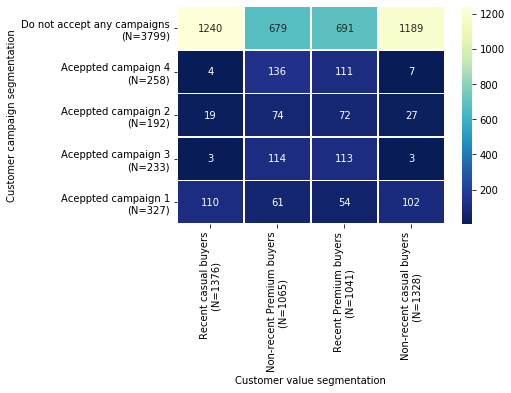

In [411]:
fig, ax = plt.subplots()

Costumer_labels = ['Do not accept any campaigns\n(N=3799)', 'Aceppted campaign 4\n(N=258)' , 'Aceppted campaign 2\n(N=192)' , 'Aceppted campaign 3\n(N=233)' , 'Aceppted campaign 1\n(N=327)']
Value_labels = ['Recent casual buyers\n(N=1376) ', 'Non-recent Premium buyers\n(N=1065) ' , 'Recent Premium buyers\n(N=1041) ' , 'Non-recent casual buyers\n(N=1328) ' ]



sns.heatmap(df_product_vs_campaign, linewidths=.5, annot=True, cmap="YlGnBu_r" ,fmt='g')
ax.set_xlabel('Customer value segmentation')
ax.set_ylabel('Customer campaign segmentation')
ax.set_yticklabels(Costumer_labels, rotation = 'horizontal')
ax.set_xticklabels(Value_labels, rotation = 'vertical')




plt.show()



Campanha 1 para casual buyers (pessoas que gastam pouco MNT), 
Campanha 2,3,4 mais viradas para premium buyers

In [412]:
df_product_vs_value= pd.crosstab(df_treated.value_cluster, df_treated.product_clusters)


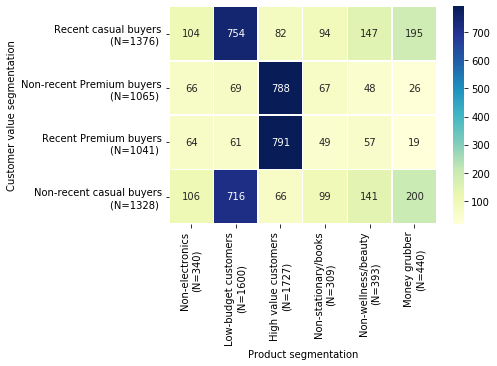

In [413]:
fig, ax = plt.subplots()

product_labels = ['Non-electronics\n(N=340)', 'Low-budget customers\n(N=1600)' , 'High value customers\n(N=1727)' , 'Non-stationary/books\n(N=309)' , 'Non-wellness/beauty\n(N=393)', 'Money grubber\n(N=440)']


sns.heatmap(df_product_vs_value, linewidths=.5, annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_xlabel('Product segmentation')
ax.set_ylabel('Customer value segmentation')
ax.set_yticklabels(Value_labels, rotation = 'horizontal')
ax.set_xticklabels(product_labels, rotation = 'vertical')
plt.show()

Vender produtos por catalogo focar no cluster "high value costumers" 

To sell eletronic products should focus on clusters : ("high value costumers","non-stationary/books","non-wellness and beauty")

In [414]:
df_1_vs_2 = pd.crosstab(df_treated.cluster, df_treated.product_clusters)


[Text(0.5, 0, 'Non-electronics\n(N=340)'),
 Text(1.5, 0, 'Low-budget customers\n(N=1600)'),
 Text(2.5, 0, 'High value customers\n(N=1727)'),
 Text(3.5, 0, 'Non-stationary/books\n(N=309)'),
 Text(4.5, 0, 'Non-wellness/beauty\n(N=393)'),
 Text(5.5, 0, 'Money grubber\n(N=440)')]

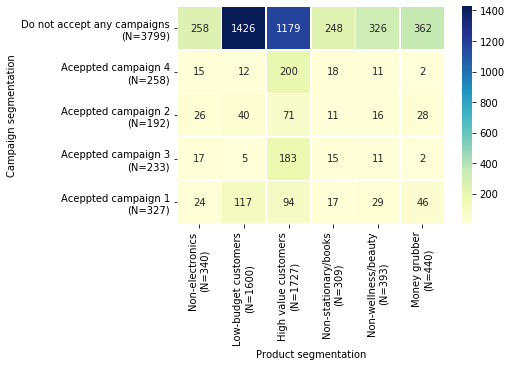

In [415]:
fig, ax = plt.subplots()


sns.heatmap(df_1_vs_2, linewidths=.5, annot=True, cmap="YlGnBu" ,fmt='g')
ax.set_xlabel('Product segmentation')
ax.set_ylabel('Campaign segmentation')
ax.set_yticklabels(Costumer_labels, rotation = 'horizontal')
ax.set_xticklabels(product_labels, rotation = 'vertical')

<a class="anchor" id="gaussian"></a>
# 4.5 Clustering with Gaussian mixture vs Agglomerative Clustering

In [416]:
df_costumer_segmentation_2 = df_normalized.copy()
# df_costumer_segmentation_2.describe().T


In [417]:
df_costumer_segmentation_2= df_costumer_segmentation.filter(items=['NumDealsPurchases',
                 'Mnt','Income']).copy()
df_costumer_segmentation_2.head(n = 5)

NumDealsPurchases       Mnt    Income
Card_ID                                        
10003075           0.166667  0.470755  0.477529
10003076           0.166667  0.584325  0.597906
10003078           0.500000  0.381957  0.492624
10003079           0.166667  0.507754  0.483320
10003080           0.833333  0.026446  0.107343

In [418]:
from sklearn.mixture import GaussianMixture


In [419]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [420]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df_costumer_segmentation_2)

In [421]:
df_treated['value_cluster2'] = clustering.labels_
df_costumer_segmentation_2['value_cluster2'] = clustering.labels_
df_costumer_segmentation_2.head(n=5)


NumDealsPurchases       Mnt    Income  value_cluster2
Card_ID                                                        
10003075           0.166667  0.470755  0.477529               3
10003076           0.166667  0.584325  0.597906               3
10003078           0.500000  0.381957  0.492624               1
10003079           0.166667  0.507754  0.483320               3
10003080           0.833333  0.026446  0.107343               0

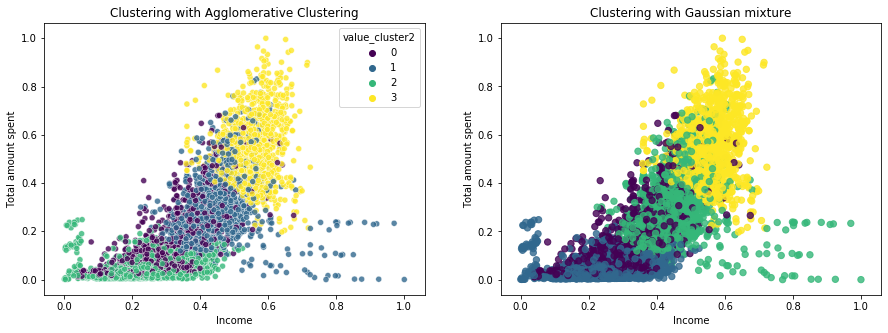

In [422]:
fig, (ax1, ax2) =plt.subplots(1,2,figsize =(15, 5))

sns.scatterplot(x = 'Income', y= 'Mnt', data = df_costumer_segmentation_2 ,hue = 'value_cluster2', palette = 'viridis',alpha = 0.8, ax=ax1)
ax2.scatter(df_costumer_segmentation_2['Income'], df_costumer_segmentation_2['Mnt'],  
           c = GaussianMixture(n_components = 4,  random_state = 100, covariance_type='full').fit_predict(df_costumer_segmentation_2),s=40, cmap='viridis',alpha= 0.8 )

ax1.set_title('Clustering with Agglomerative Clustering')
ax2.set_title('Clustering with Gaussian mixture')
ax1.set_xlabel('Income')
ax1.set_ylabel('Total amount spent')
ax2.set_xlabel('Income')
ax2.set_ylabel('Total amount spent')
plt.show()


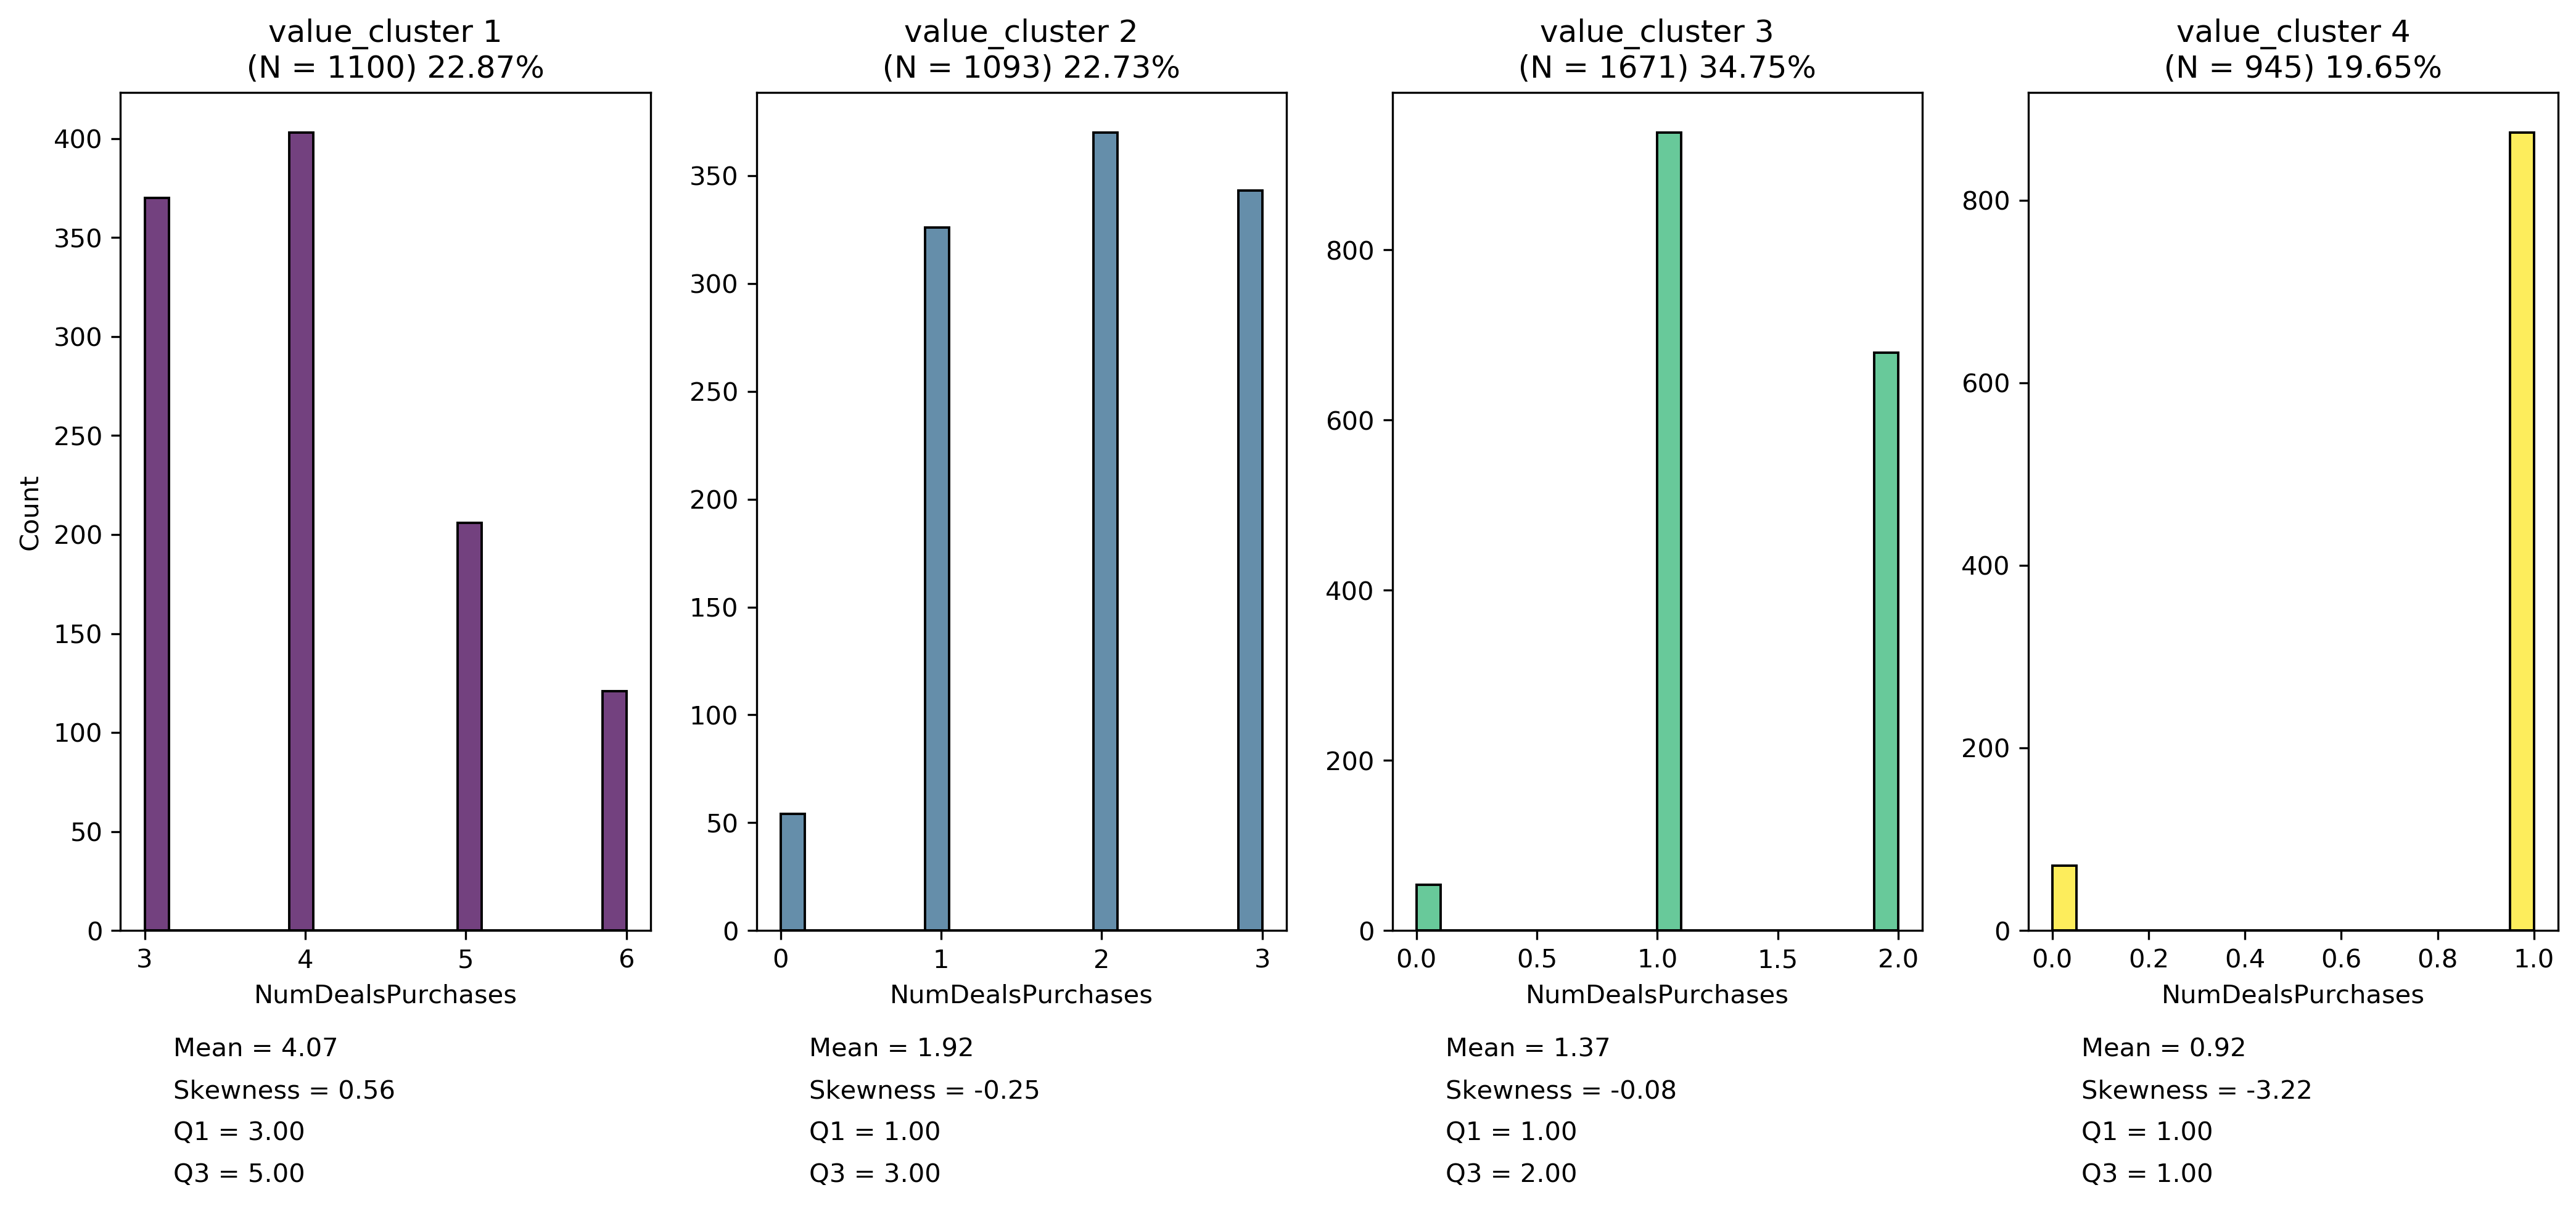

In [423]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17, 6), dpi=300)
jet = plt.get_cmap('viridis')
colors = iter(jet(np.linspace(0,1,4)))

for i in range (0,4):  
    
    size = df_treated[df_treated['value_cluster2'] == i]['NumDealsPurchases'].size
    percentage = round(size/Total*100,2)
    sns.histplot(df_treated[df_treated['value_cluster2'] == i]['NumDealsPurchases'],
                 ax = axes[i], bins = 20 ,color=next(colors)).set_title('value_cluster ' + str(i+1) + '\n' +'  (N = ' + str(size) +') ' + str(percentage) + '%')
    res = stats2 (df_treated[df_treated['value_cluster2'] == i]['NumDealsPurchases'])   
    
    axes[i].text(0.1+i*1.2, -0.15, 'Mean = ' + str(res[0]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.2, 'Skewness = ' + str(res[3]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.25, 'Q1 = ' + str(res[1]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    axes[i].text(0.1+i*1.2, -0.3, 'Q3 = ' + str(res[2]), transform=axes[0].transAxes, fontsize=10,
           color= 'k')
    
for i in range (1,4):
    
        axes[i].set_ylabel('')  

plt.show()